In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 実装
クラスとしてHopfieldNetworkを実装

In [2]:
def sgn(x):
    if x>=0:
        return 1
    else:
        return -1

In [3]:
class HopfieldNetwork:
    def __init__(self,N,Q):
        self.N=N #細胞の総数
        self.Q=Q #覚えさせるデータの数
        self.x=np.zeros([N,1]) #細胞それぞれの値
        self.theta=np.ones([N,1])  #閾値をすべて１にしてみる
        self.w=np.zeros([N,N]) #係数の行列
        self.V=0 #エネルギー
        
    def learn(self,data_matrix):
        self.w=np.dot(data_matrix,np.transpose(data_matrix))/self.Q
        self.w=self.w-np.diag(np.diag(self.w))
        
    def calc_energy(self):
        self.V=-0.5*np.dot(np.dot(np.transpose(self.x),self.w),self.x)+np.dot(np.transpose(self.theta),self.x)
        
    def x_input(self,x):
        self.x=x       
        self.calc_energy() #初期値でのエネルギーの値
                
    def update(self):
        i=random.randint(0,N-1)
        u=np.dot(self.w[i,:],self.x)
        self.x[i]=sgn(u-self.theta[i])
        self.calc_energy() #エネルギー更新    
        
    def show(self,title=None):
        n=int(np.sqrt(self.N))
        fig=plt.figure(figsize=(5,5))
        plt.title(self.V)
        ax=fig.add_subplot()
        rect_size=0.2
        
        for i in range(n):
            for j in range(n):
                index=i*n+j
                rect_color="red"
                if self.x[index]>=0:
                    rect_color="green"
                    
                rec=patches.Rectangle(xy=(j*rect_size,i*rect_size),width=0.2,height=0.2,angle=0,color=rect_color,ec="black")
                ax.add_patch(rec)   
                
    def show_x(self,x):
        n=int(np.sqrt(self.N))
        fig=plt.figure(figsize=(5,5))
        plt.title("x")
        ax=fig.add_subplot()
        rect_size=0.2
        
        for i in range(n):
            for j in range(n):
                index=i*n+j
                rect_color="red"
                if x[index]>=0:
                    rect_color="green"
                    
                rec=patches.Rectangle(xy=(j*rect_size,i*rect_size),width=0.2,height=0.2,angle=0,color=rect_color,ec="black")
                ax.add_patch(rec)  

# 確認　
実装がうまくいっているか試してみる

<ipython-input-3-9a348c155278>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


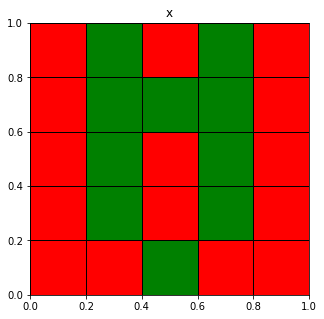

In [4]:
N=25
Q=1
network1=HopfieldNetwork(N,Q)
data1=np.array([-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,-1,1,-1])
data1=data1.reshape((N,1))
network1.show_x(data1)

In [5]:
network1.learn(data1) #学習

<ipython-input-3-9a348c155278>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


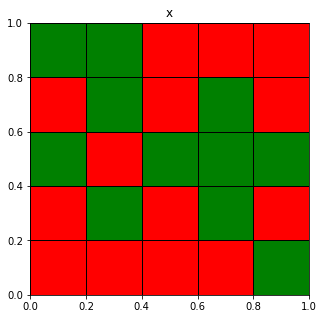

In [6]:
x=np.array([-1,-1,-1,-1,1,-1,1,-1,1,-1,1,-1,1,1,1,-1,1,-1,1,-1,1,1,-1,-1,-1])
x=x.reshape((25,1))
network1.show_x(x)
network1.x_input(x)

D:\anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


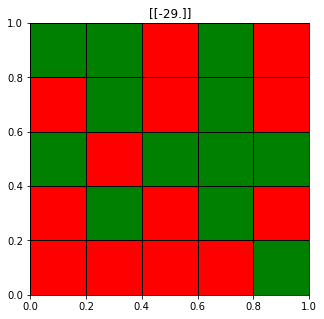

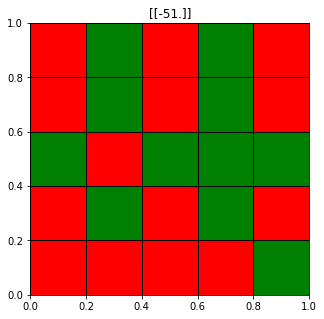

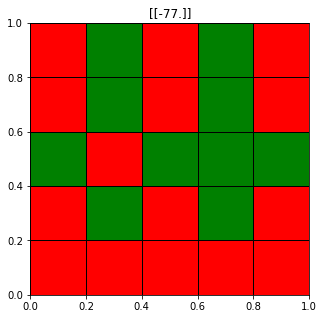

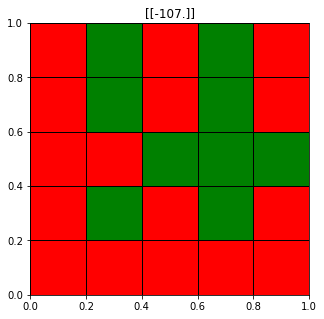

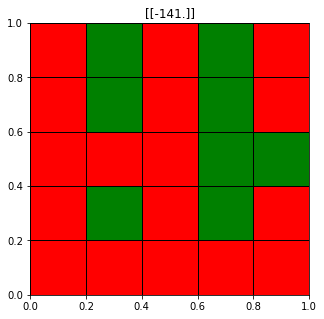

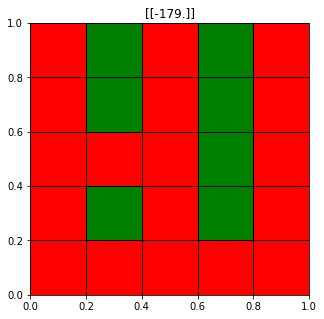

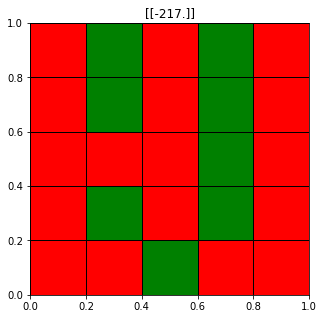

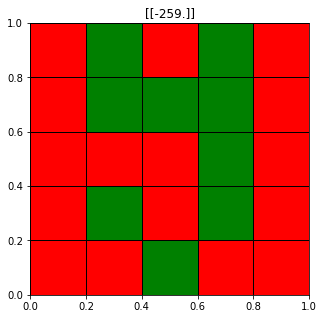

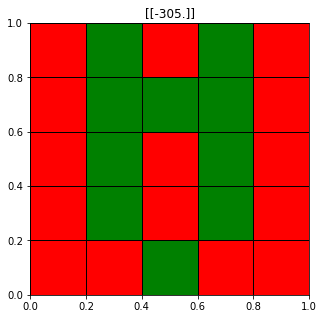

In [7]:
times=0
ex_V=np.copy(network1.V)
while True:
    network1.update()
    if ex_V!=network1.V:
        network1.show()
        times=0
    else:
        times+=1
        
    ex_V=np.copy(network1.V)
        
    if times>50:
        break

# ①
## サンプル数を１から６種類に変えながら、ノイズ耐性を検証
まずは１種類の時

6種類のパターンを生成する

<ipython-input-3-9a348c155278>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


array([[25.,  9., -3.,  5., -3.,  1.],
       [ 9., 25.,  1.,  1.,  1.,  1.],
       [-3.,  1., 25.,  1., -3., -3.],
       [ 5.,  1.,  1., 25.,  5., -7.],
       [-3.,  1., -3.,  5., 25., -3.],
       [ 1.,  1., -3., -7., -3., 25.]])

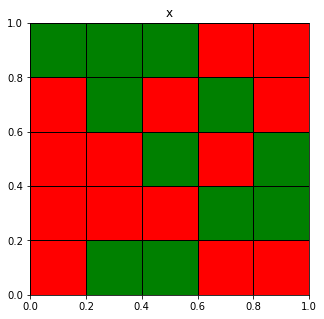

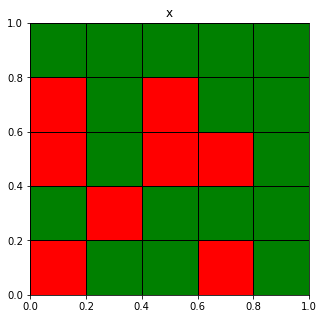

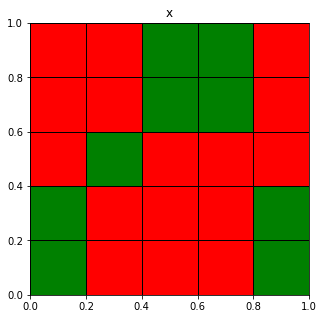

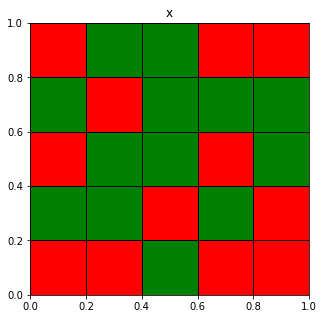

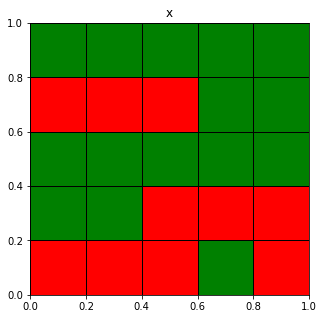

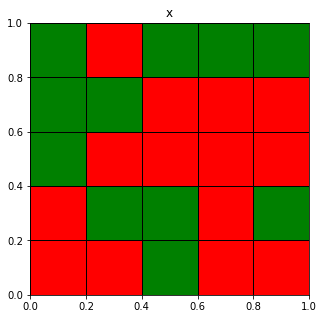

In [8]:
N=25
Q=1
network_case1_1=HopfieldNetwork(N,Q)

N=25
Q_MAX=6
data_matrix=np.zeros((N,Q_MAX))

for i in range(Q_MAX):
    tmp=np.random.rand(25)
    data_matrix[:,i]=np.where(tmp<0.5,-1,1)
    data=data_matrix[:,i].reshape(N,1)
    network_case1_1.show_x(data)
    
np.dot(np.transpose(data_matrix),data_matrix)

In [9]:
data1=data_matrix[:,0].reshape(25,1)
network_case1_1.learn(data1)

Noise: 5.0 %
正解率: 100.0 %
---------------------
Noise: 10.0 %
正解率: 100.0 %
---------------------
Noise: 15.0 %
正解率: 100.0 %
---------------------
Noise: 20.0 %


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


正解率: 100.0 %
---------------------


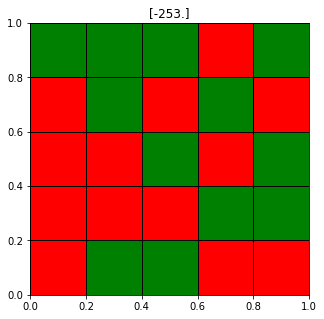

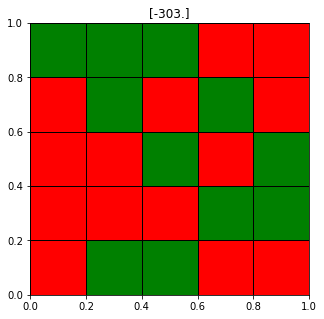

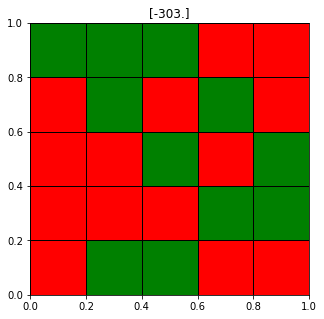

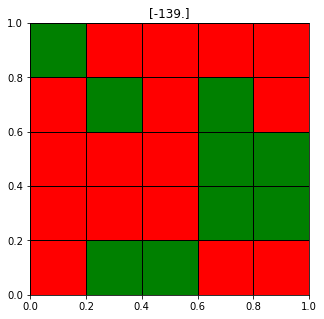

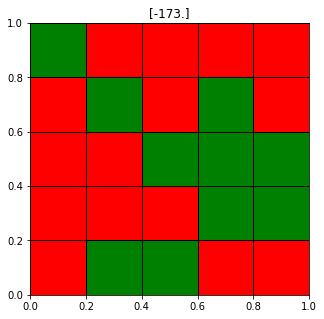

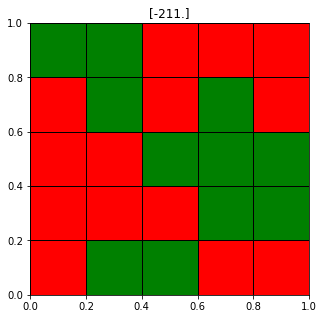

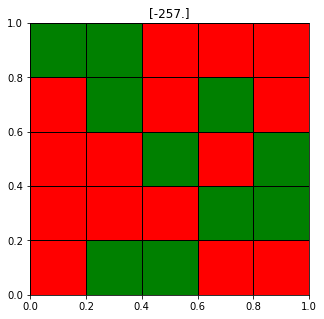

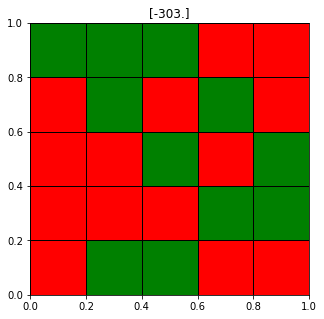

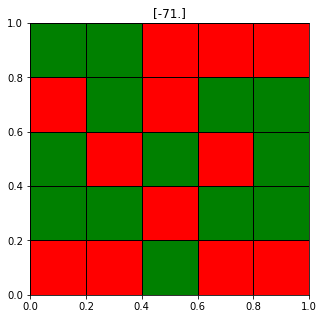

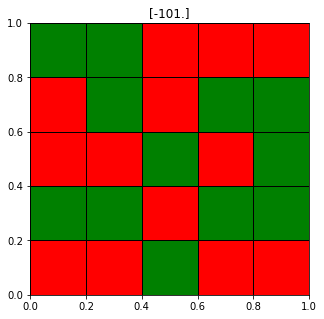

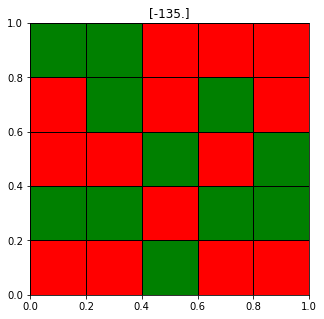

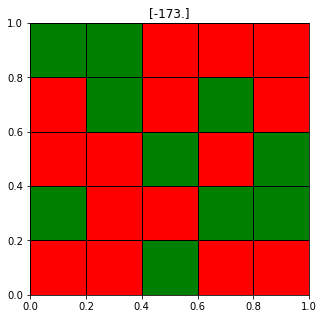

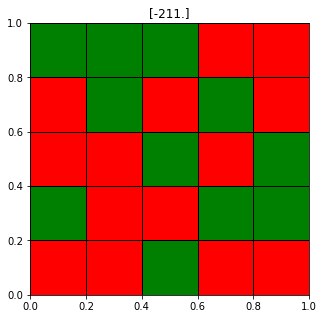

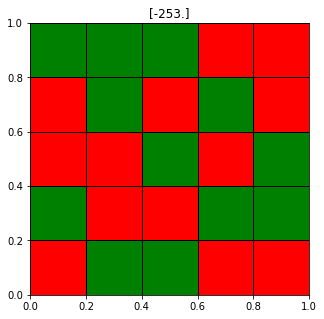

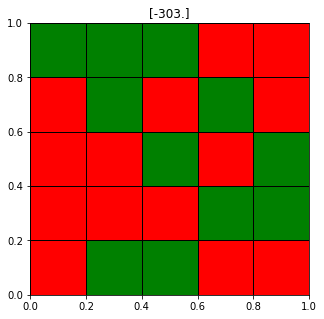

In [10]:
noise_rate=[0.05,0.1,0.15,0.2]
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    network_case1_1.x_input(x[:,0])
    
    times=0
    ex_V=np.copy(network_case1_1.V)
    while True:
        network_case1_1.update()
        if ex_V!=network_case1_1.V:
            network_case1_1.show()
            times=0
        else:
            times+=1
        
        ex_V=np.copy(network_case1_1.V)
        
        if times>50:
            break
            
    score=np.where(network_case1_1.x==data_matrix[:,0],1,0)
    score=np.sum(score)
    print("正解率:",score/N*100,"%")
            
    print("---------------------")

２種類の時

In [11]:
N=25
Q=2
network_case1_2=HopfieldNetwork(N,Q)
network_case1_2.learn(data_matrix[:,:2])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 100.0
正答率（元画像を完全に再現した割合）: 100.0 %


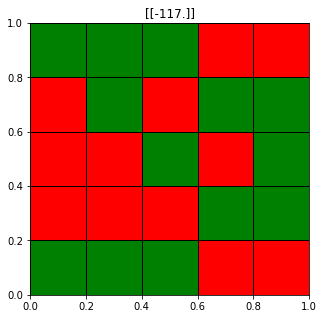

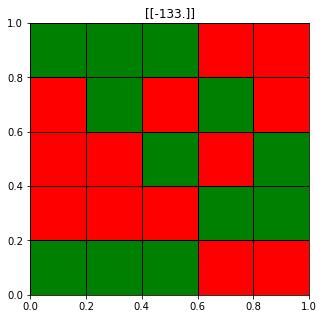

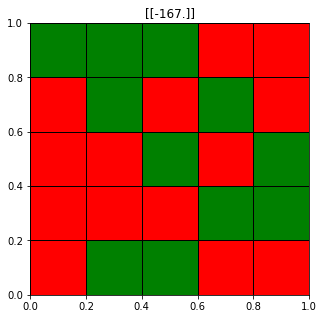

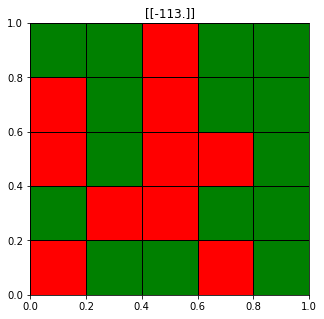

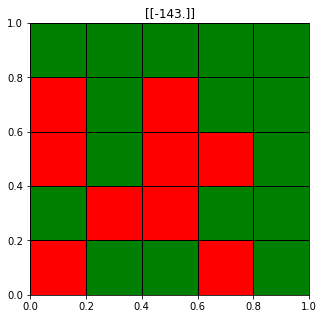

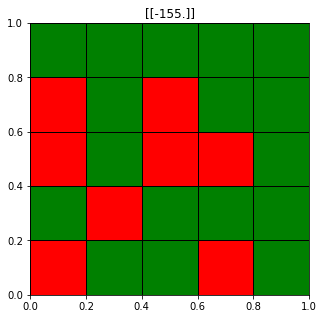

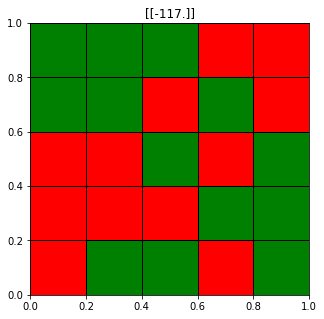

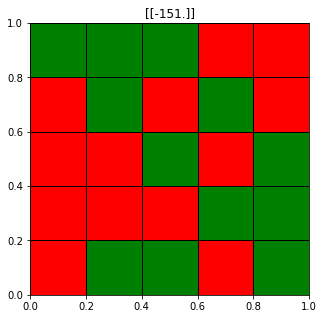

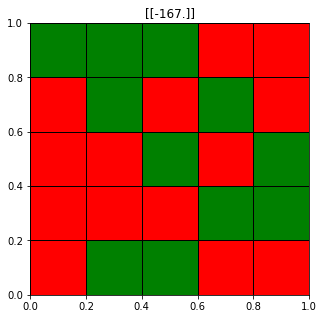

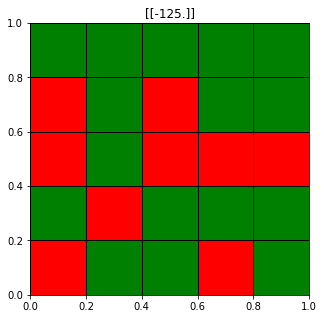

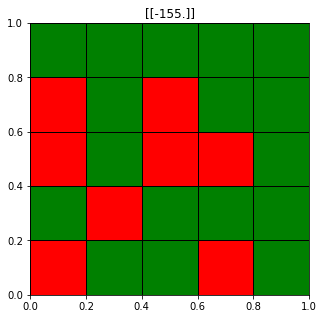

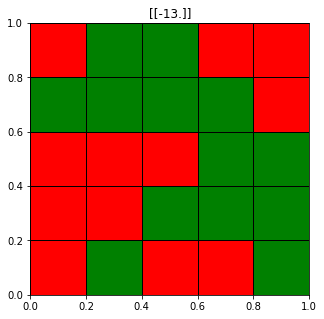

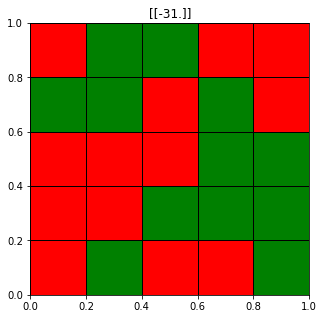

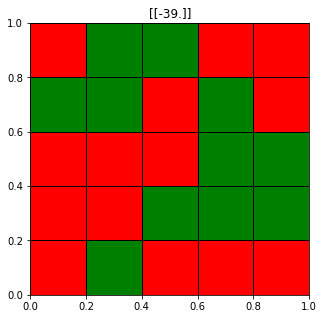

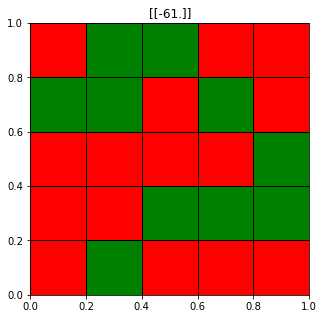

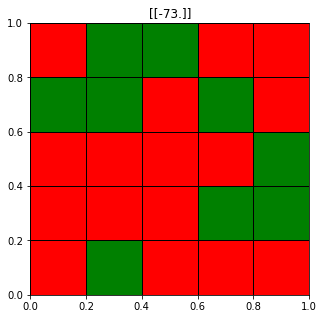

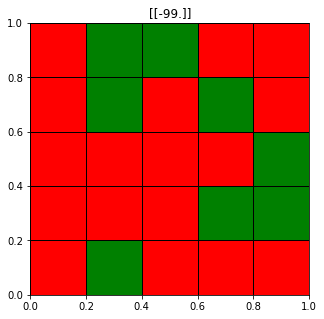

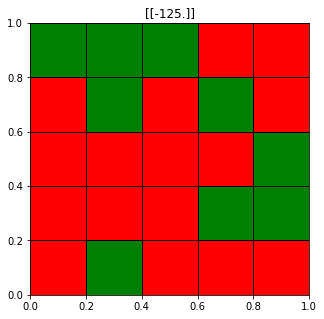

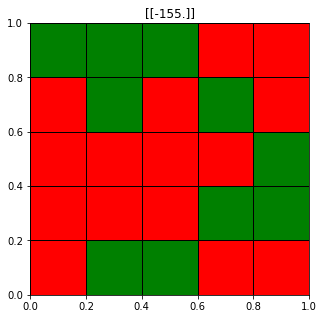

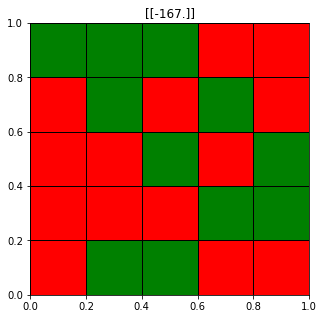

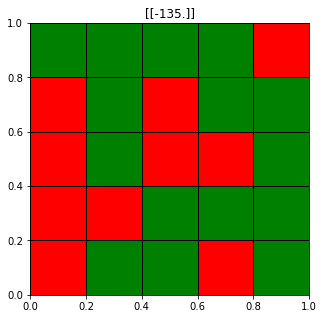

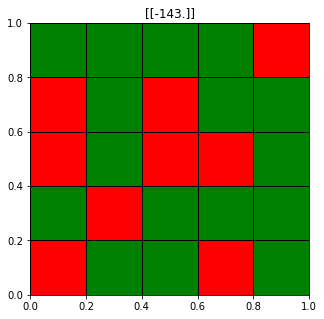

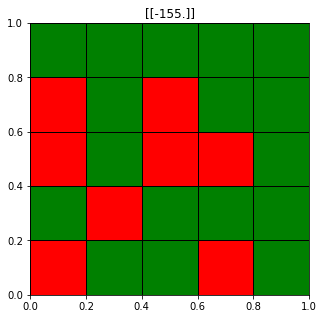

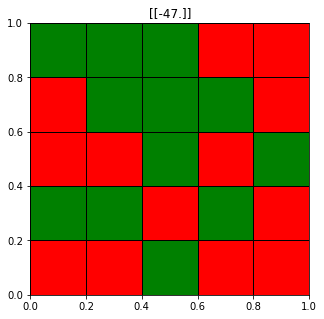

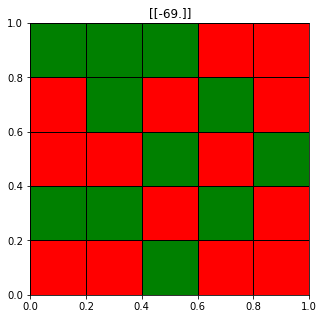

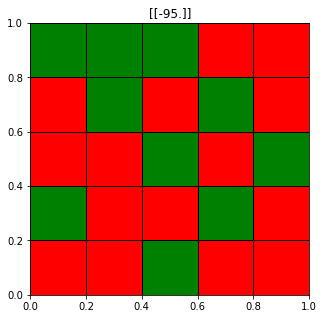

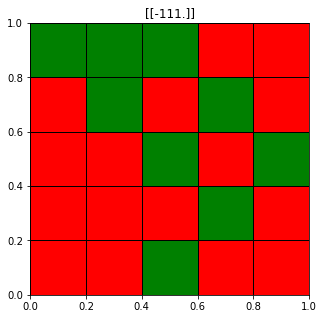

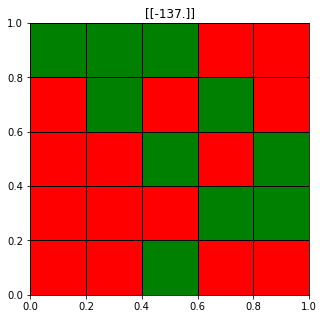

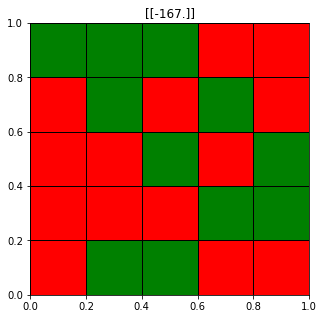

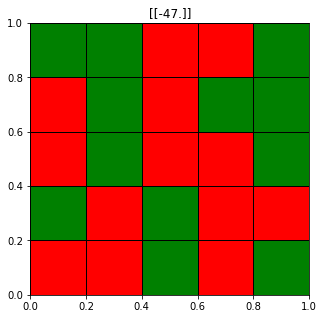

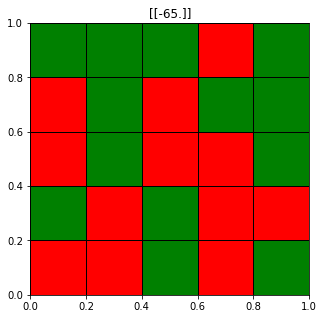

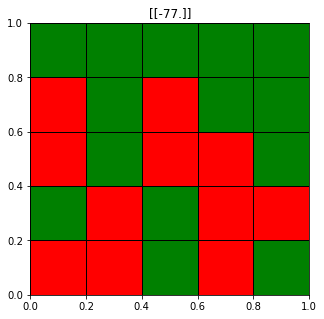

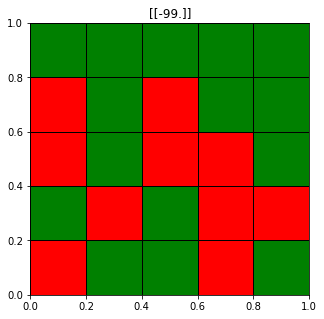

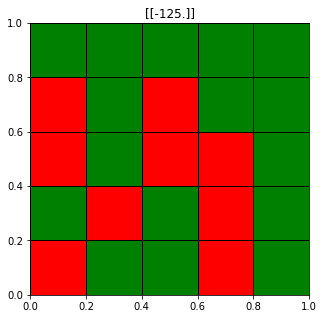

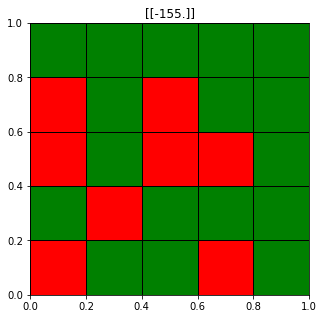

In [12]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case1_2.x_input(date_noise)
        network_case1_2.show()
    
        times=0
        ex_V=np.copy(network_case1_2.V)
        while True:
            network_case1_2.update()
            if ex_V!=network_case1_2.V:
                network_case1_2.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case1_2.V)
        
            if times>50:
                break
            
        score=np.where(network_case1_2.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/8*100,"%")

3種類のとき

In [13]:
N=25
Q=3
network_case1_3=HopfieldNetwork(N,Q)
network_case1_3.learn(data_matrix[:,:3])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 96.0 %
                        
2 番目のデータ
(25, 1)
正解率: 96.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 96.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 99.0
正答率（元画像を完全に再現した割合）: 75.0 %


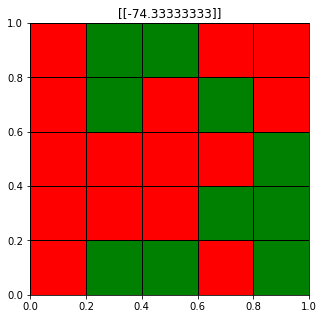

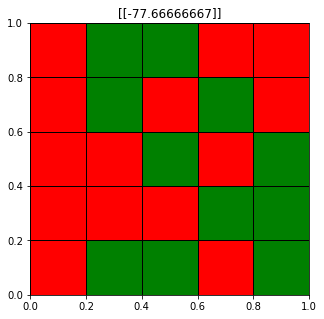

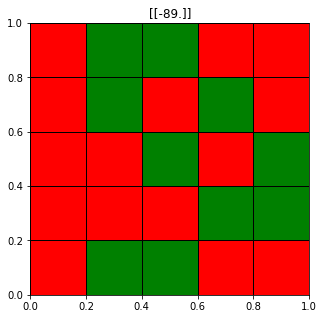

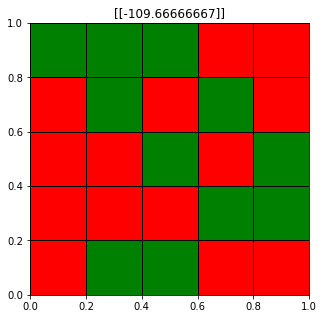

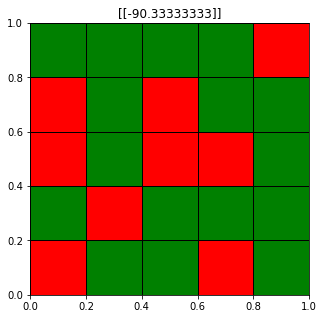

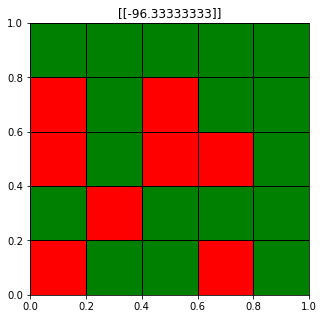

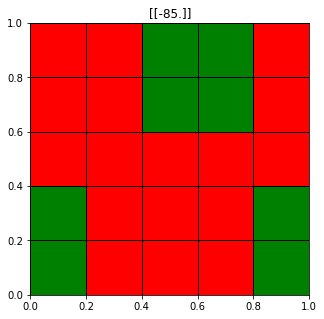

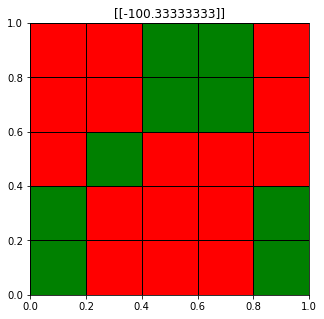

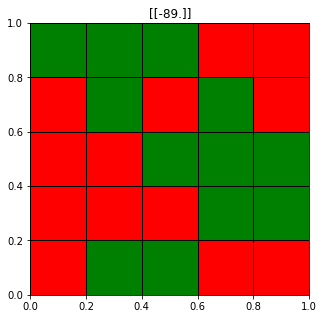

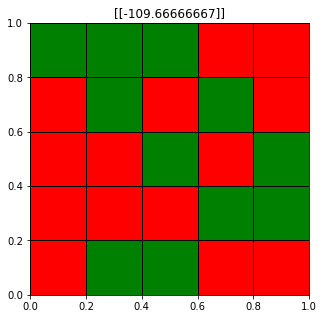

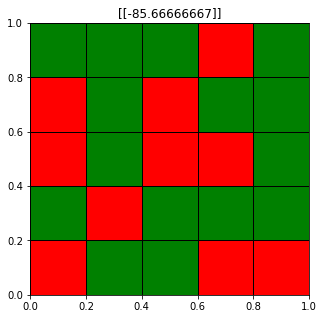

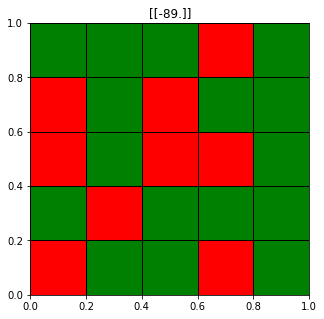

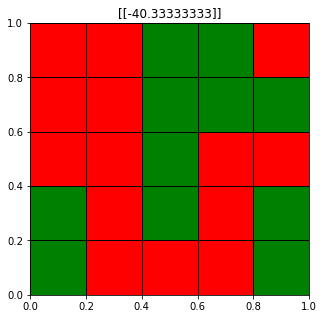

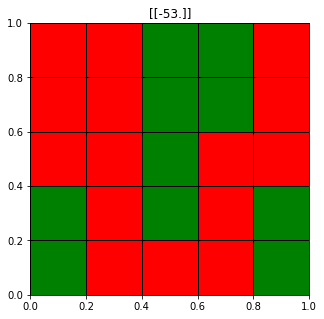

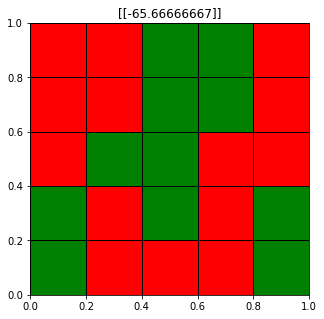

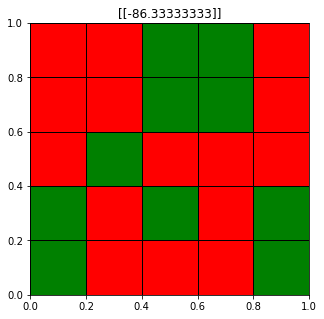

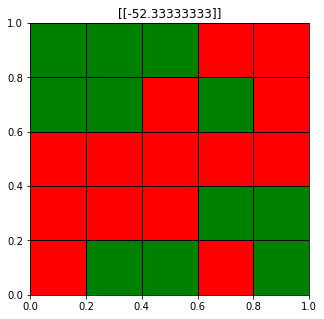

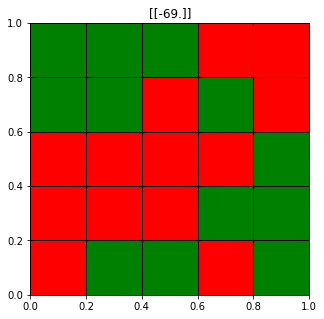

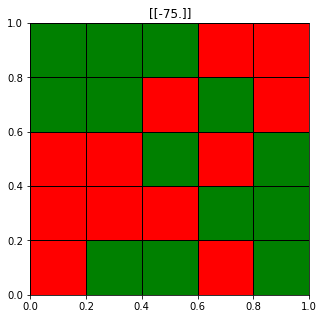

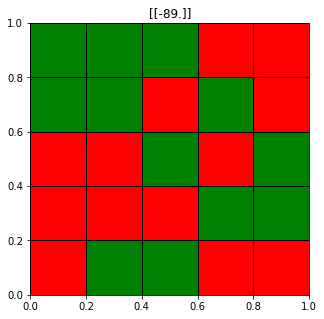

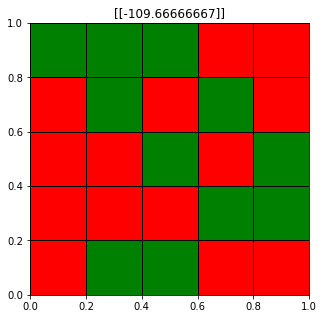

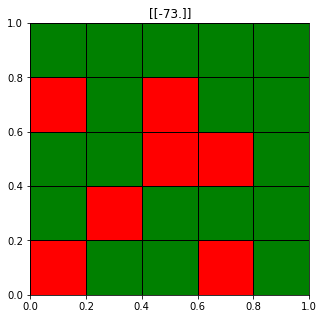

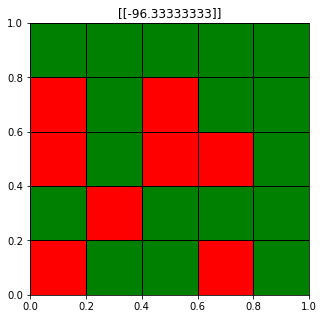

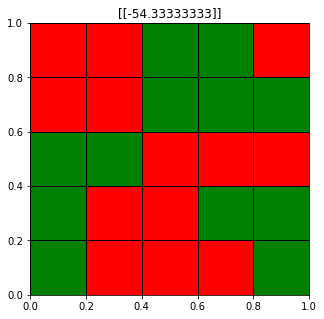

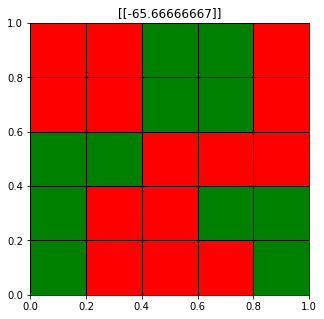

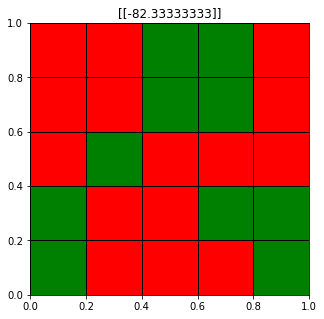

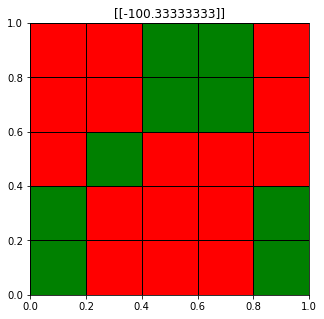

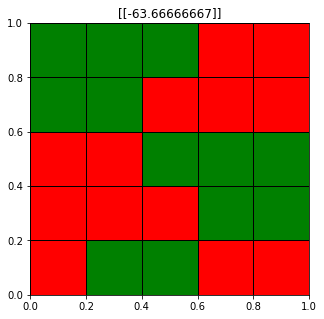

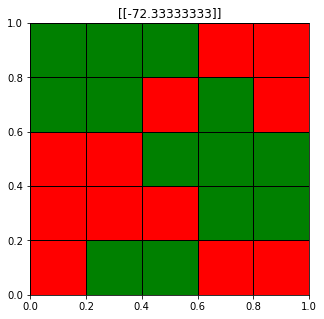

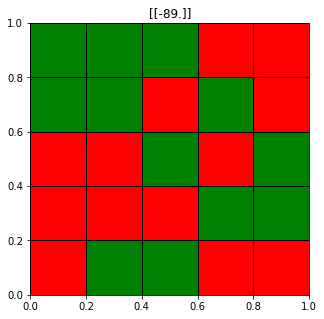

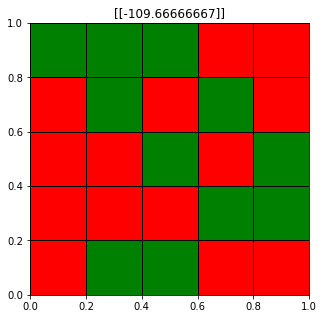

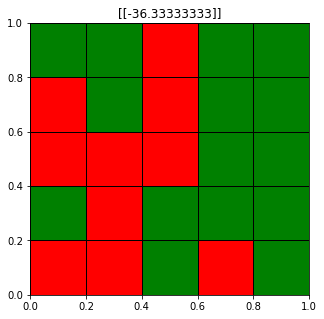

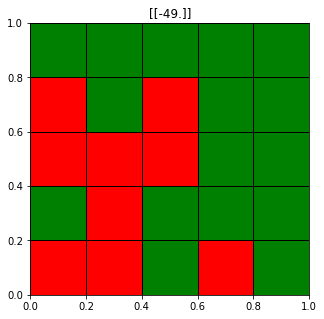

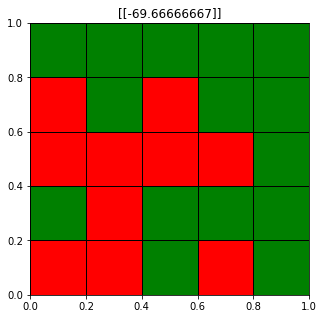

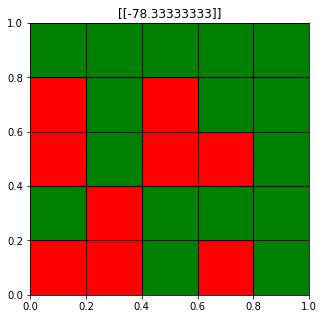

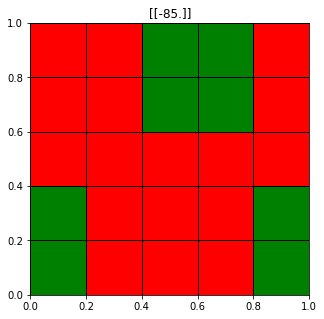

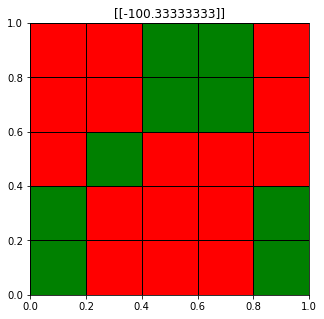

In [14]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case1_3.x_input(date_noise)
        network_case1_3.show()
    
        times=0
        ex_V=np.copy(network_case1_3.V)
        while True:
            network_case1_3.update()
            if ex_V!=network_case1_3.V:
                network_case1_3.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case1_3.V)
        
            if times>50:
                break
            
        score=np.where(network_case1_3.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/12*100,"%")

４種類の時

In [15]:
N=25
Q=4
network_case1_4=HopfieldNetwork(N,Q)
network_case1_4.learn(data_matrix[:,:4])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 96.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 52.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 96.75
正答率（元画像を完全に再現した割合）: 87.5 %


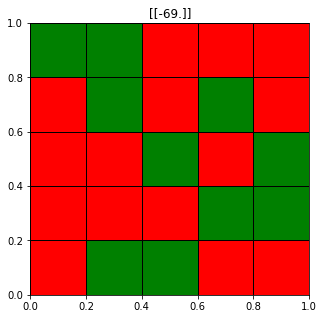

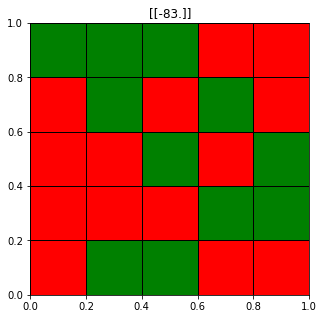

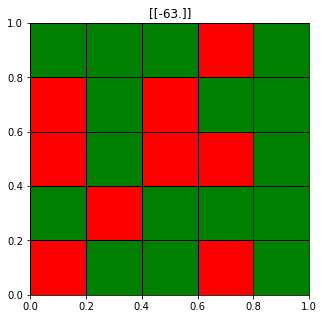

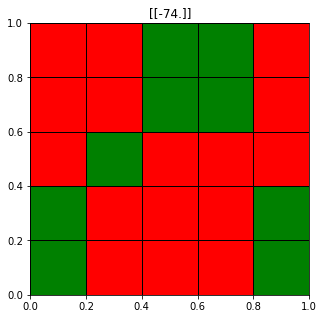

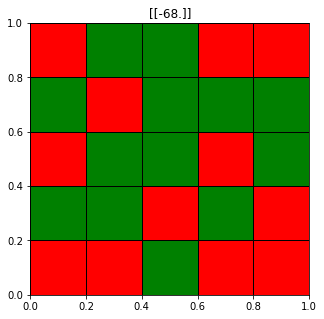

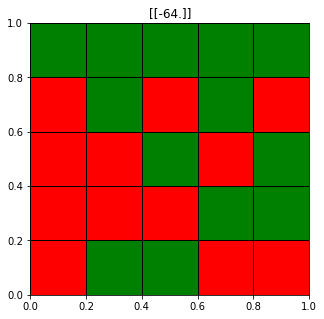

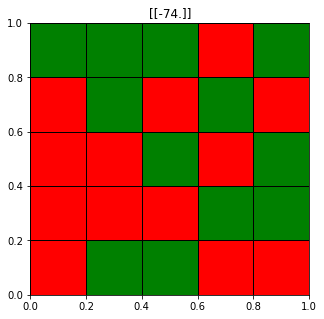

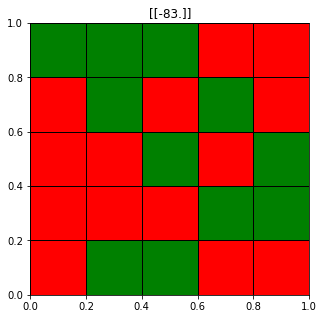

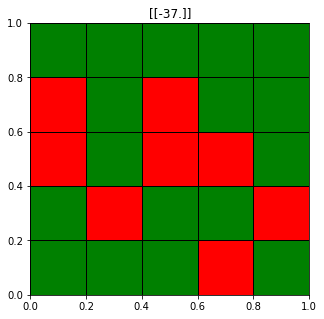

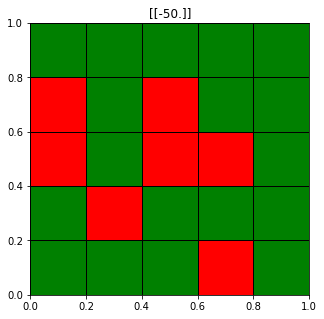

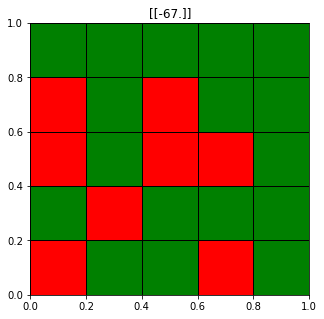

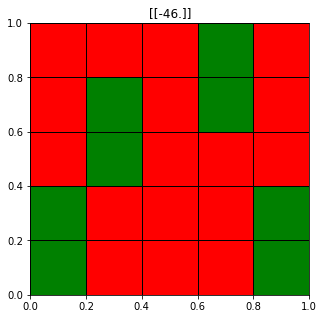

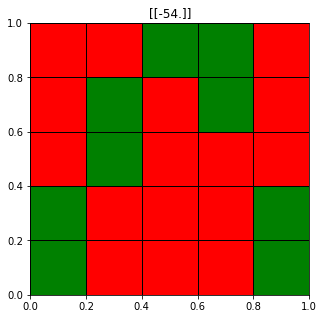

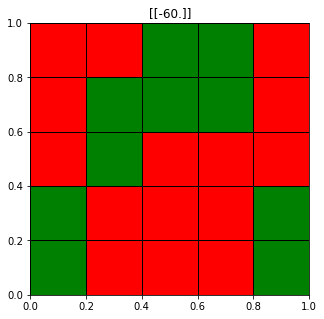

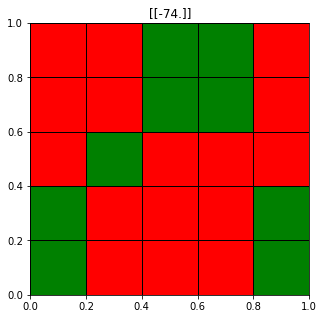

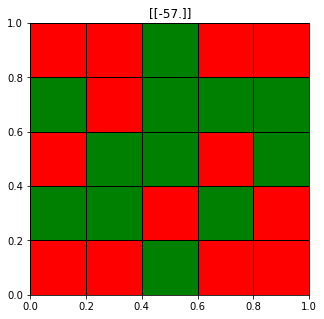

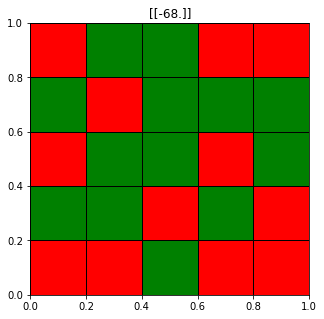

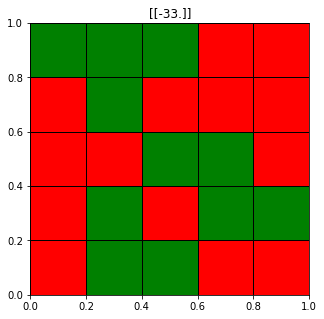

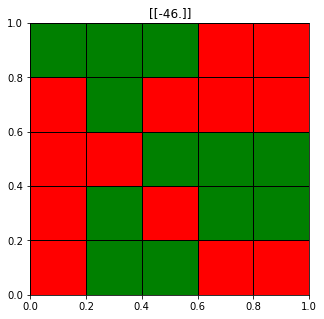

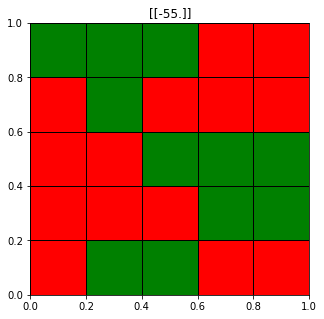

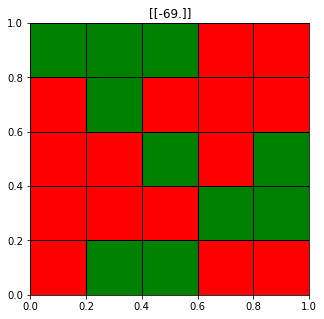

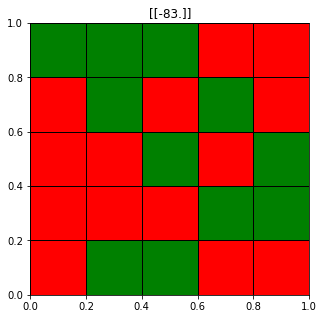

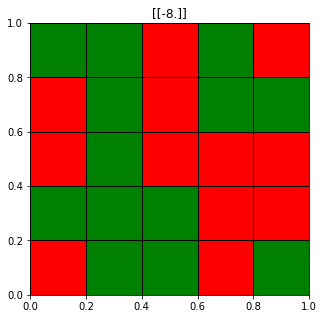

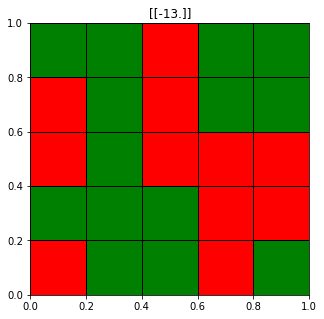

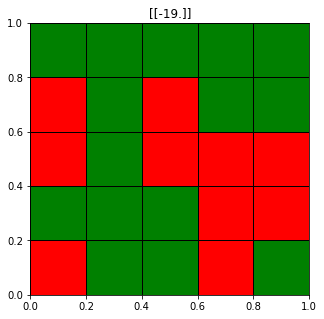

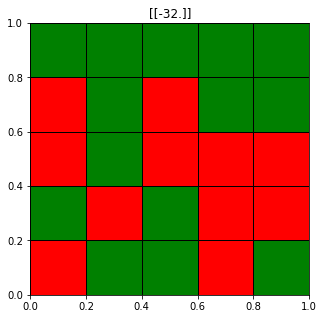

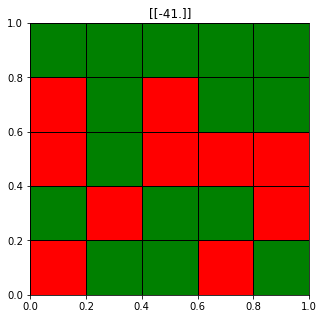

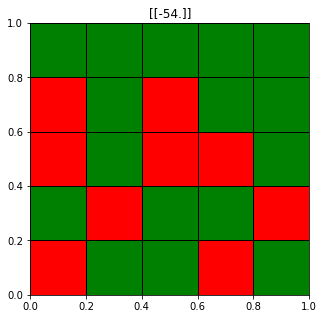

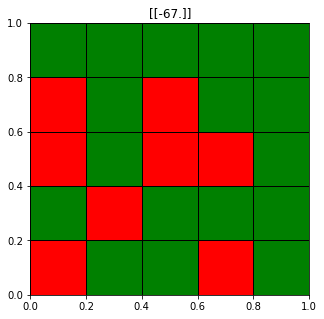

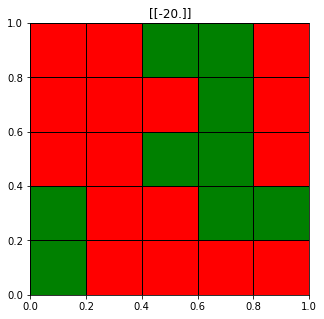

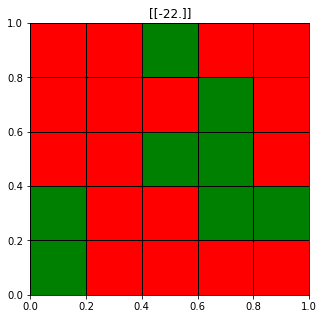

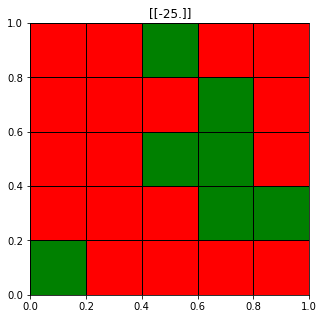

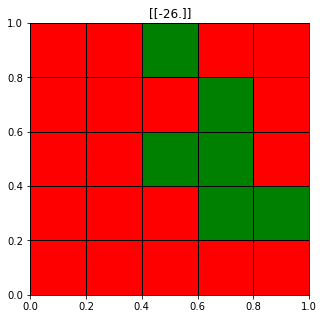

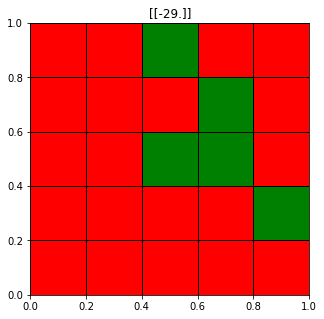

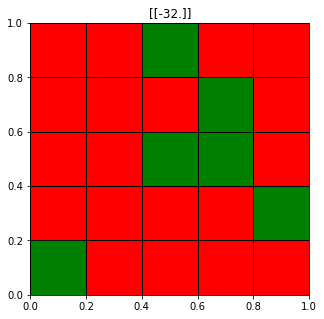

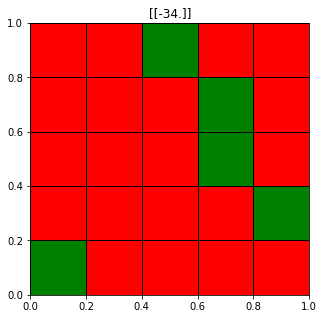

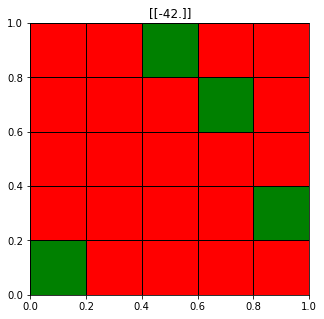

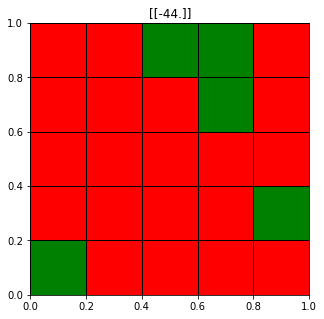

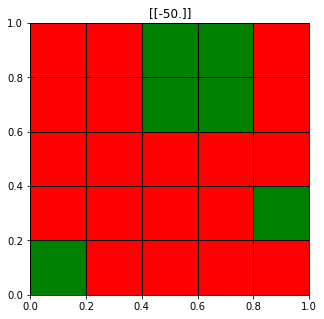

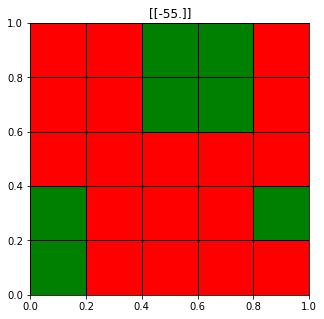

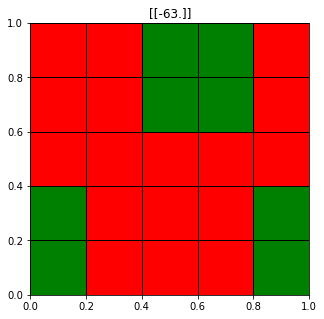

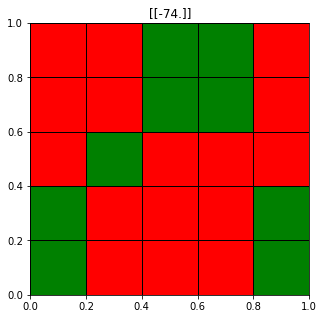

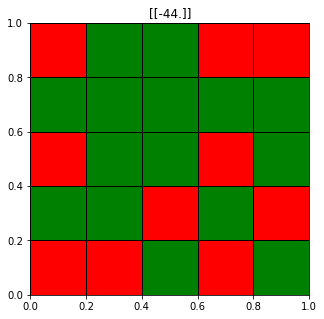

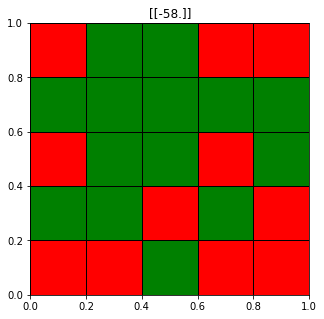

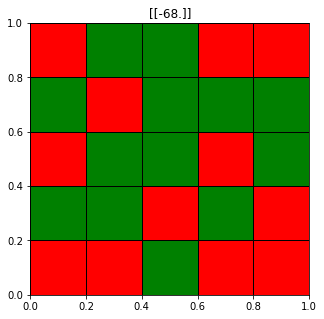

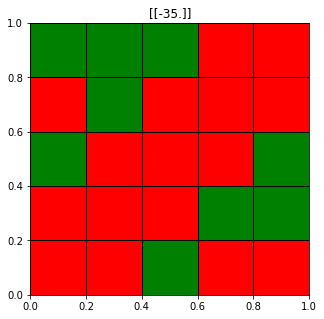

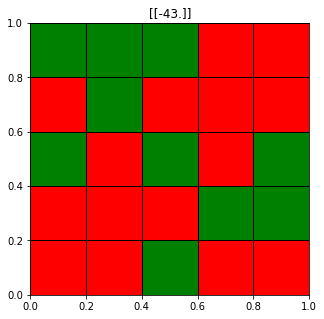

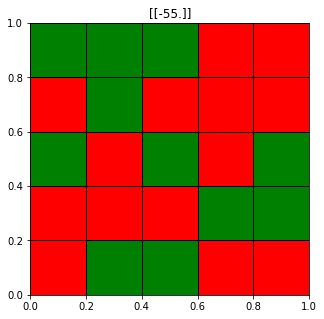

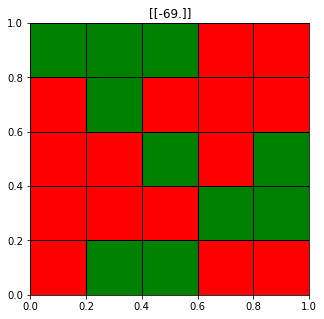

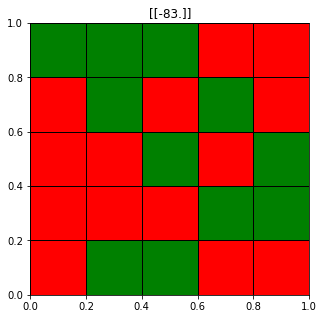

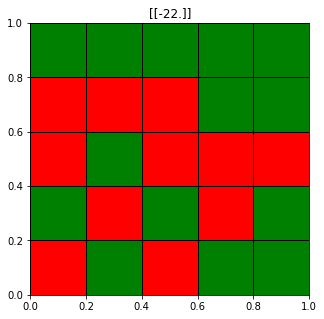

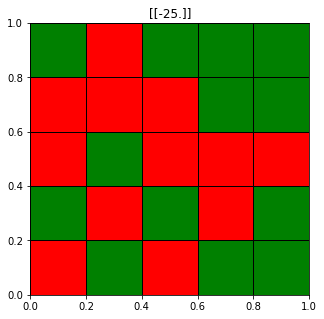

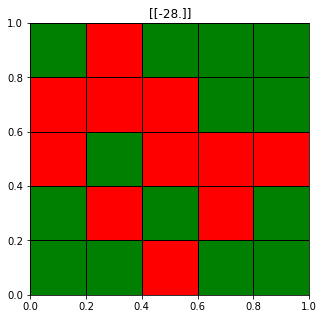

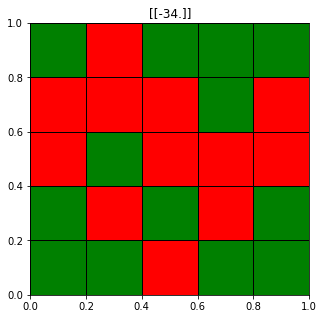

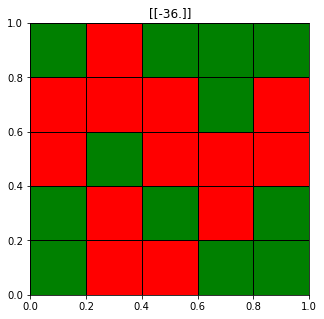

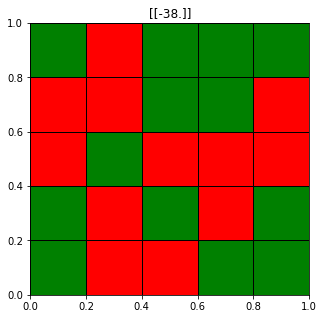

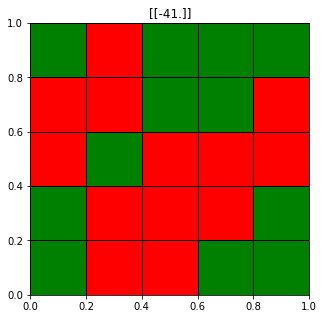

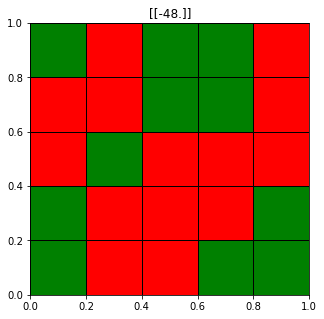

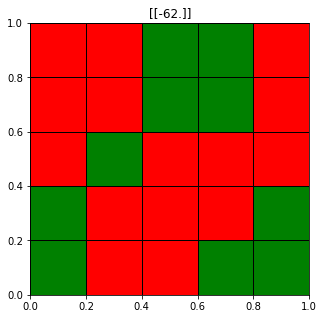

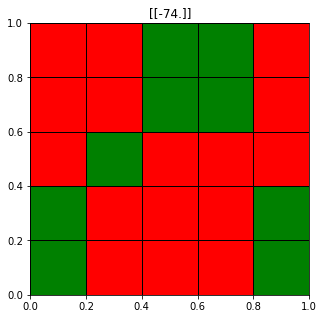

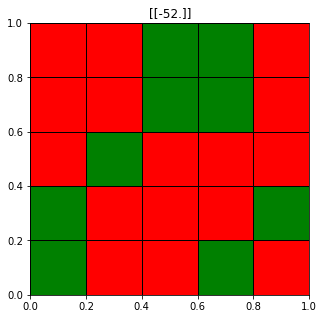

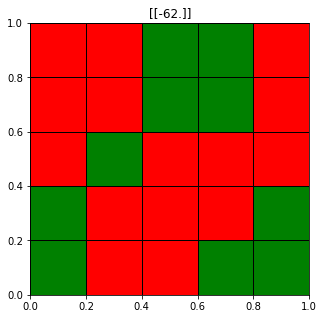

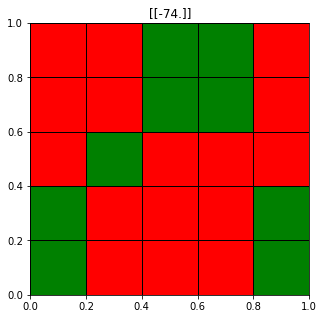

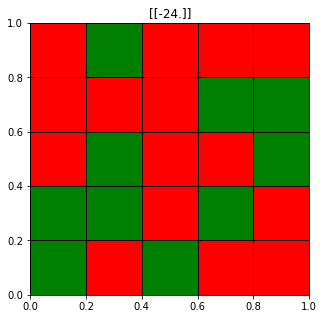

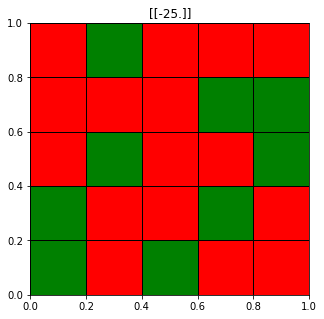

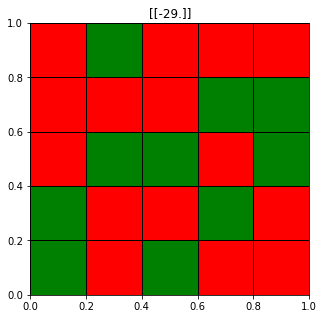

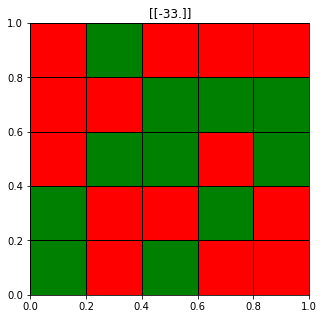

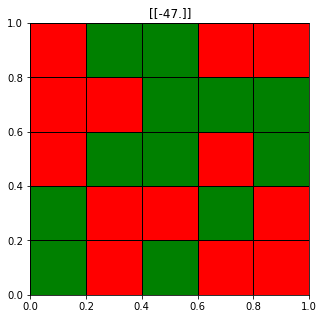

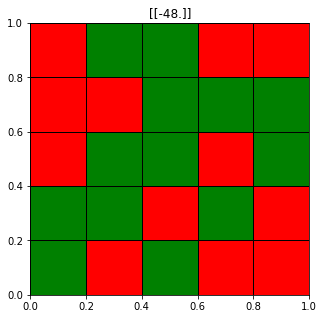

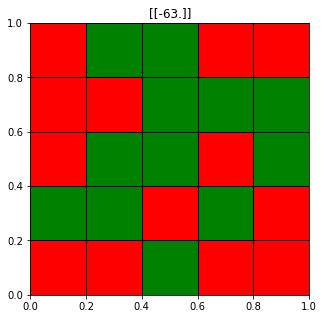

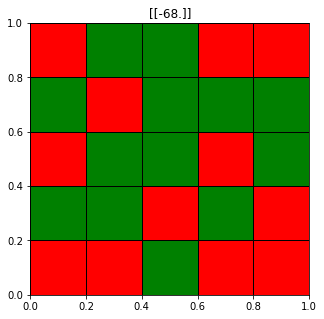

In [16]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case1_4.x_input(date_noise)
        network_case1_4.show()
    
        times=0
        ex_V=np.copy(network_case1_4.V)
        while True:
            network_case1_4.update()
            if ex_V!=network_case1_4.V:
                network_case1_4.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case1_4.V)
        
            if times>50:
                break
            
        score=np.where(network_case1_4.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

5種類の時

In [17]:
N=25
Q=5
network_case1_5=HopfieldNetwork(N,Q)
network_case1_5.learn(data_matrix[:,:5])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 68.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 68.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 56.00000000000001 %
                        
1 番目のデータ
(25, 1)
正解率: 68.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 88.0 %
                        
4 番目のデータ
(25, 1)
正解率: 96.0 %
                        
------------------------------
類似度の全試行平均: 92.2
正答率（元画像を完全に再現した割合）: 70.0 %


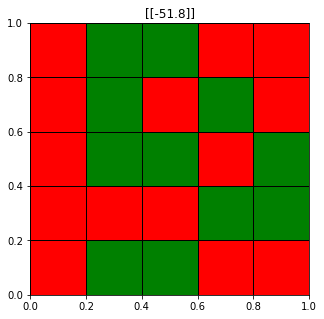

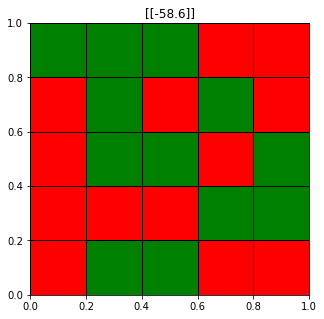

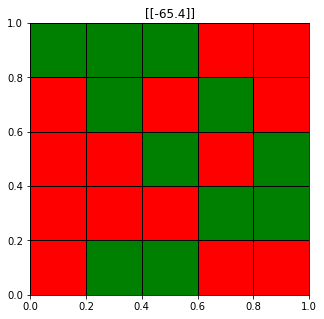

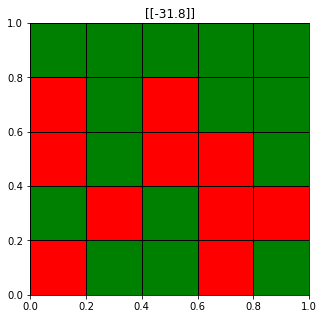

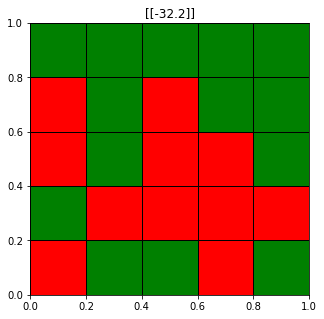

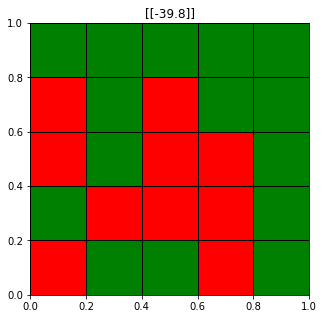

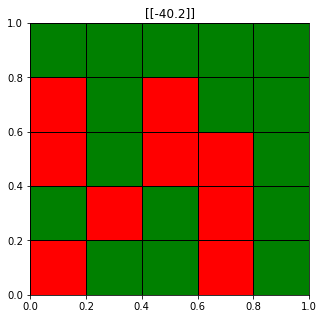

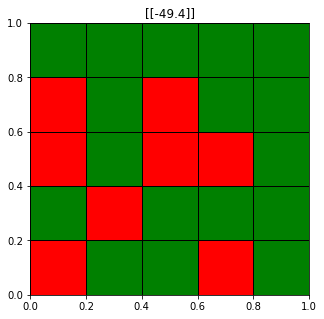

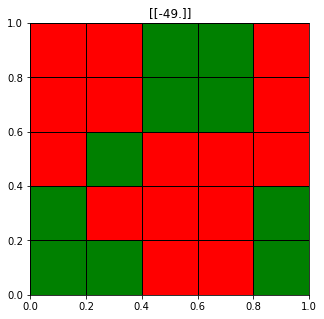

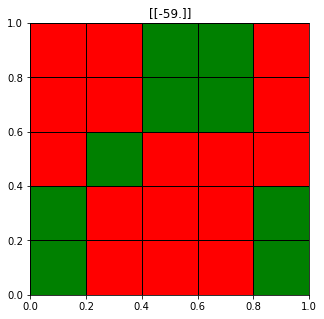

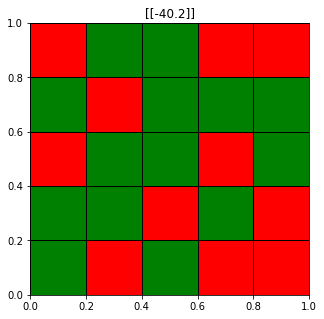

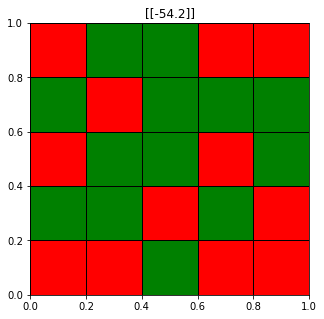

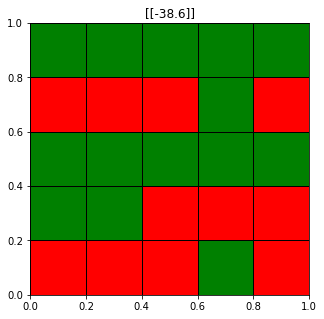

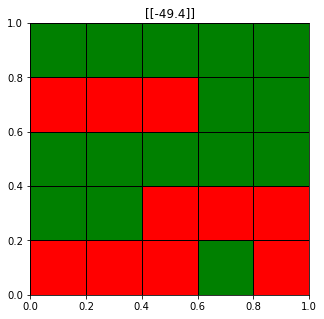

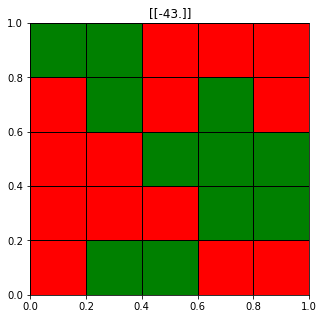

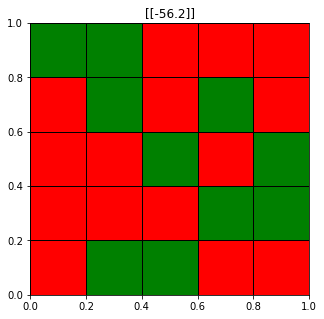

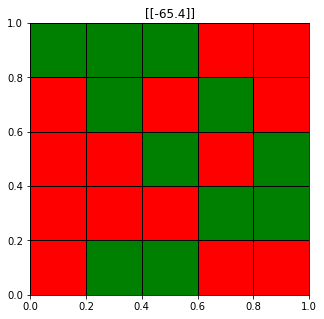

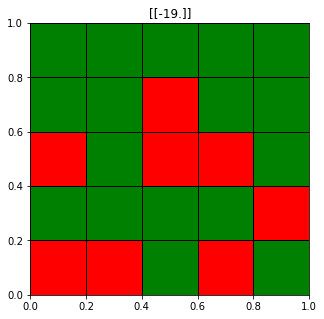

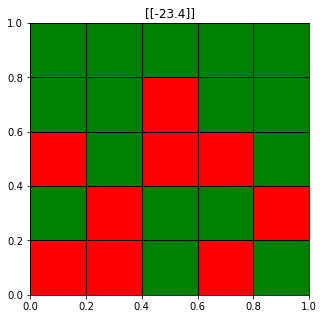

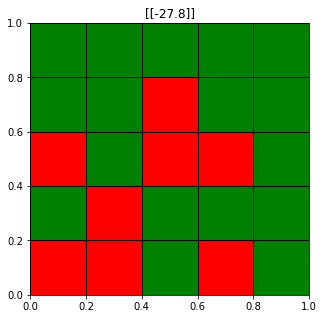

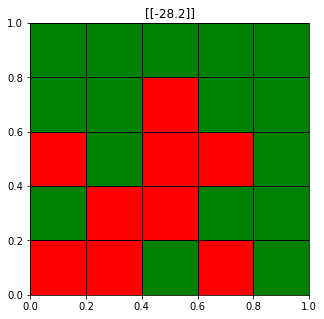

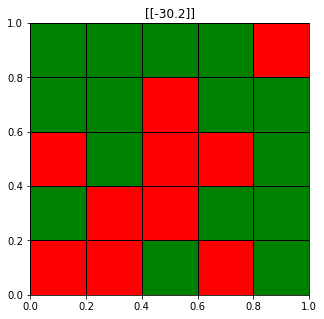

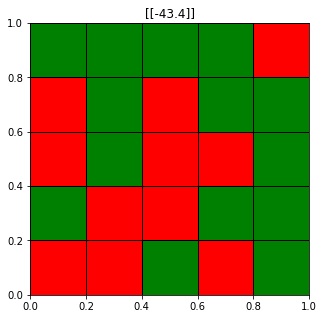

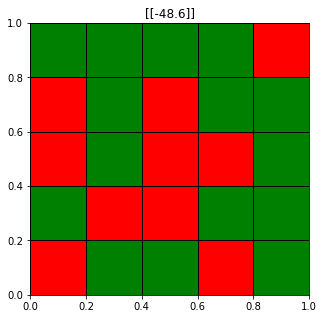

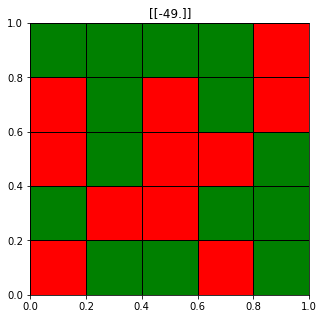

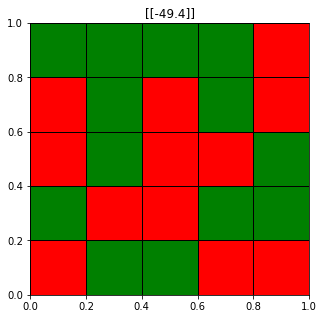

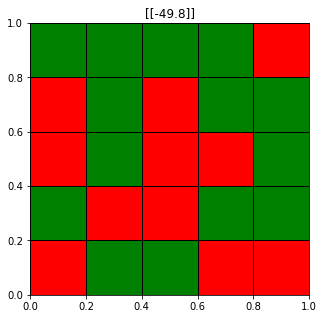

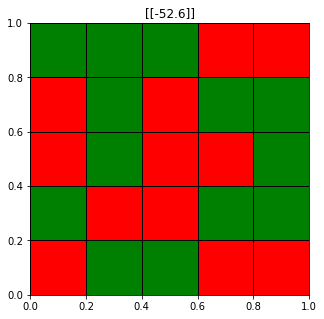

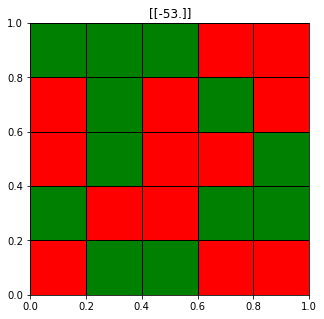

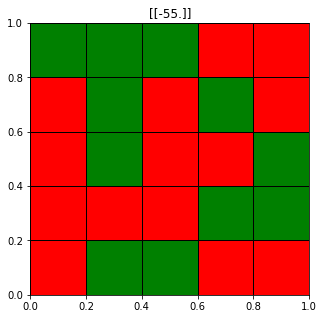

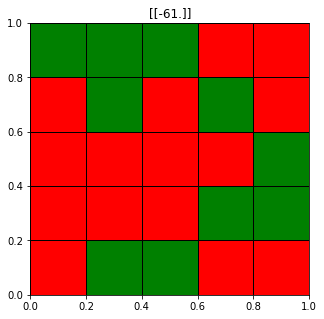

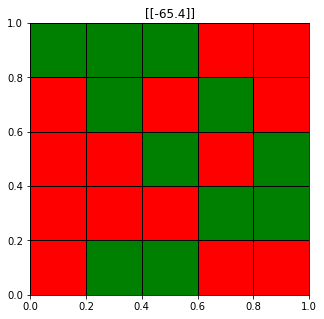

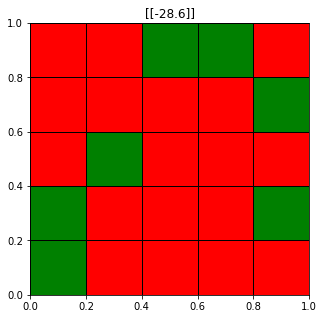

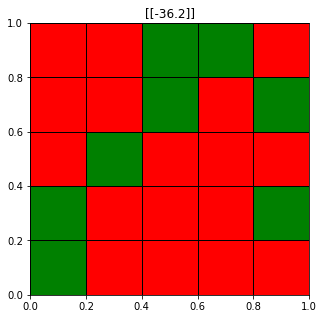

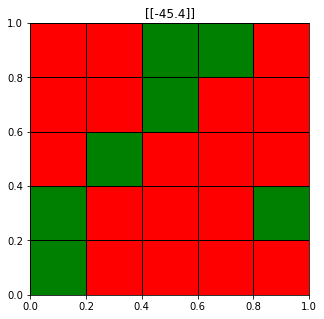

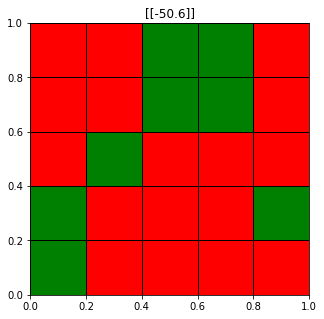

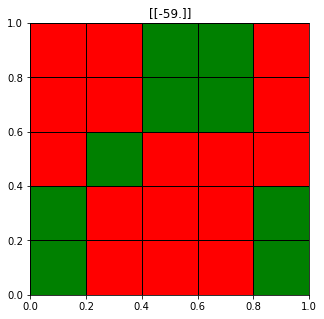

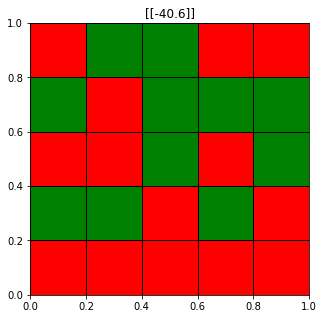

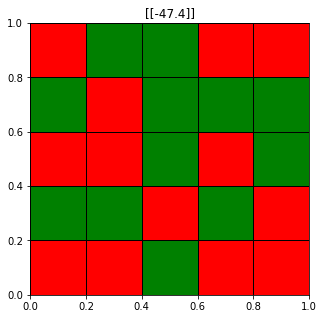

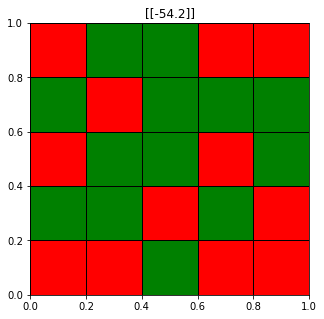

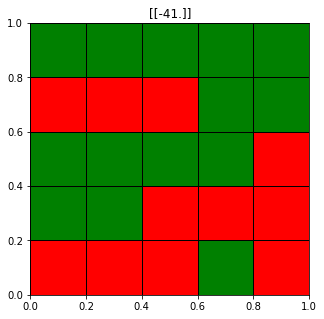

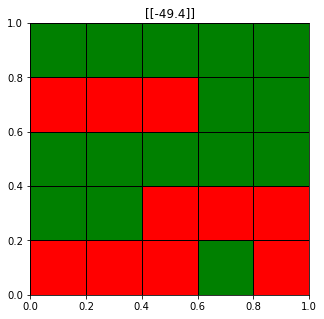

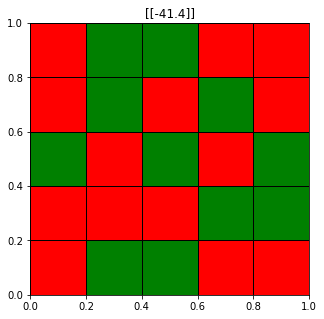

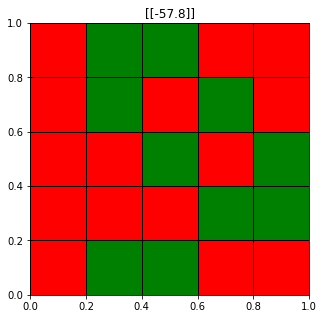

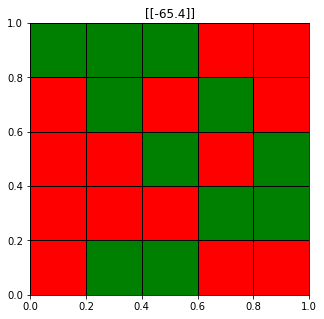

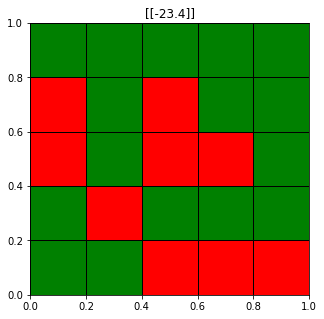

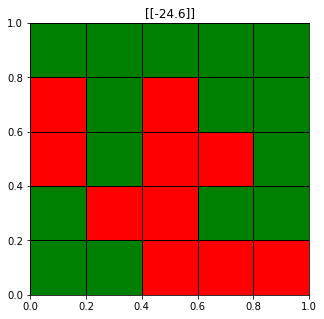

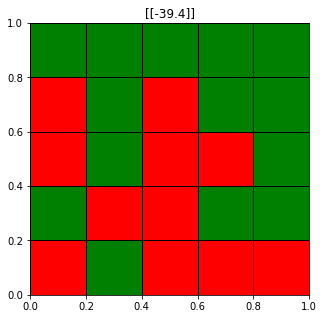

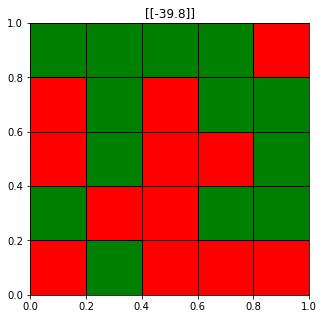

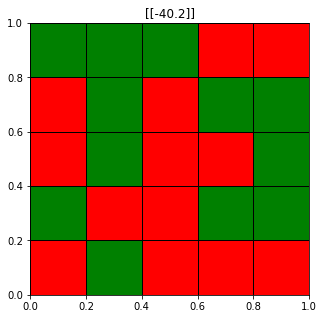

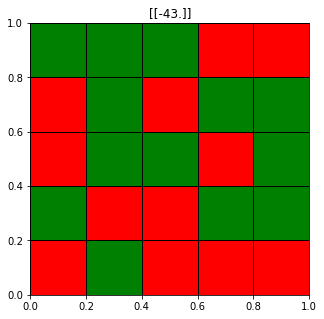

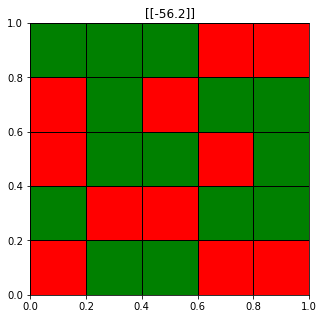

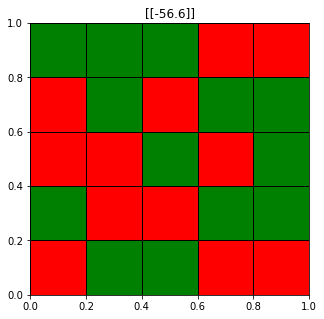

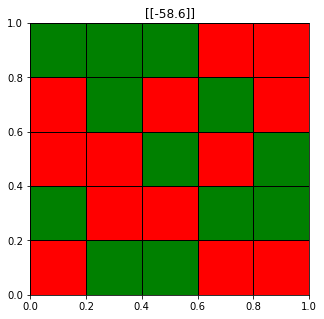

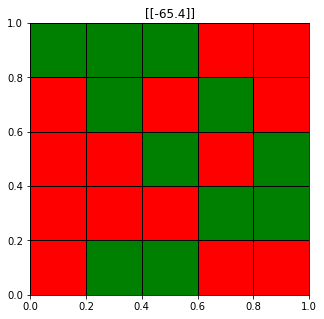

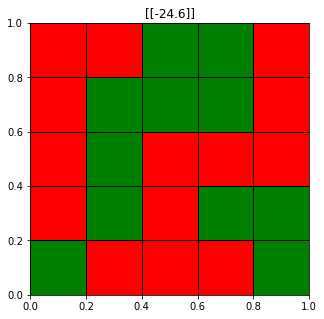

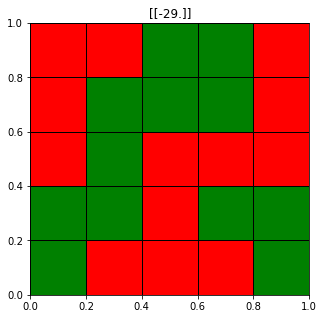

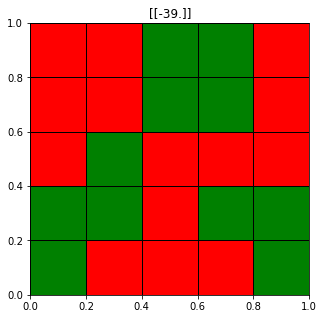

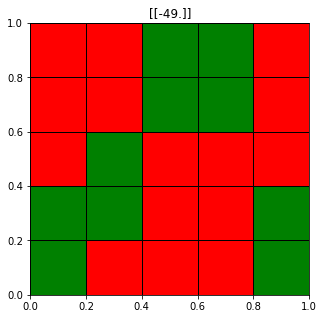

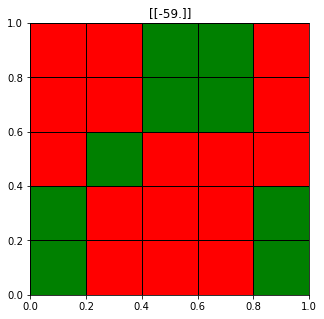

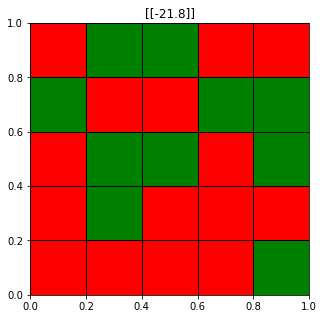

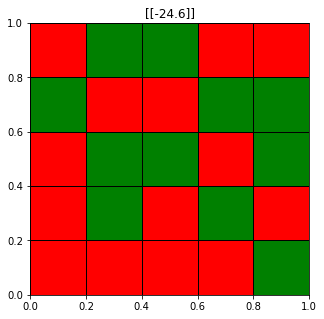

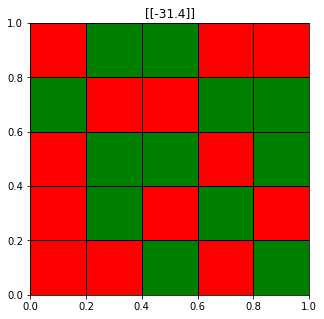

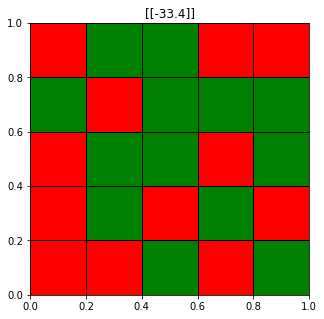

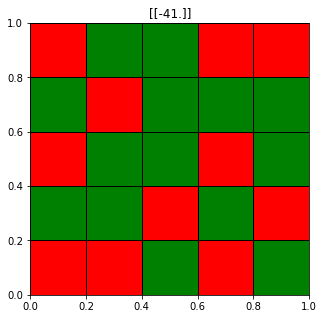

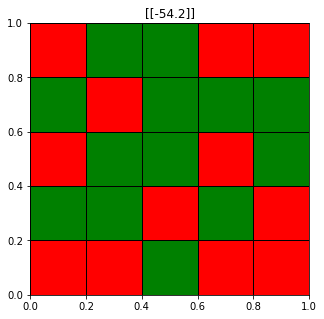

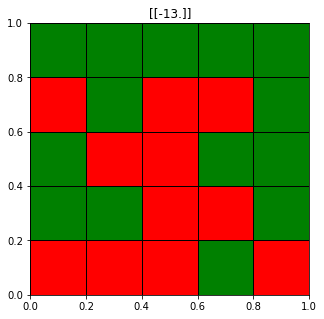

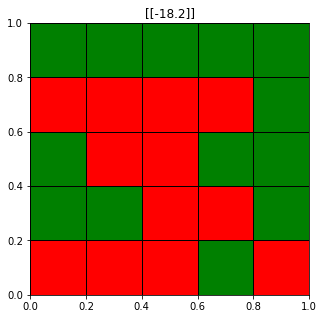

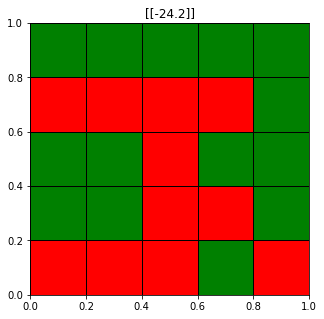

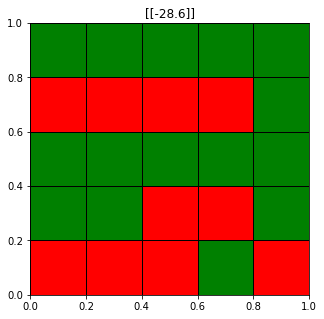

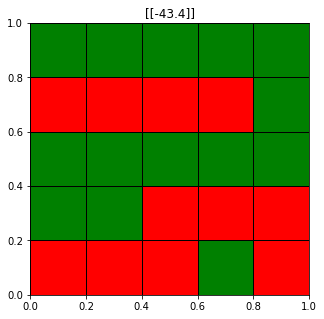

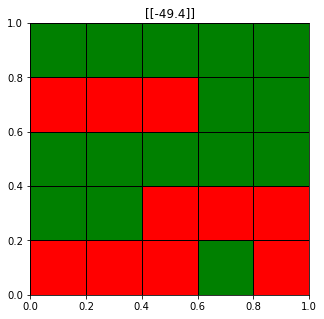

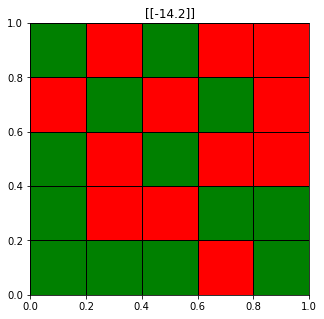

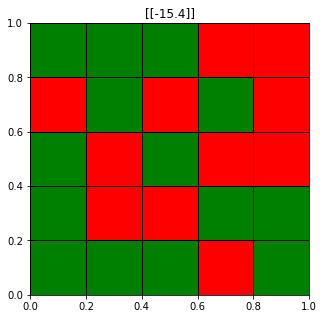

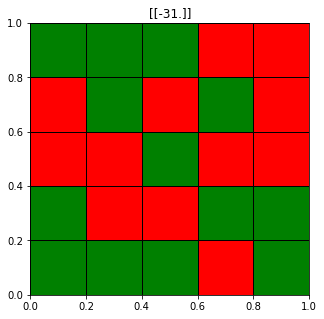

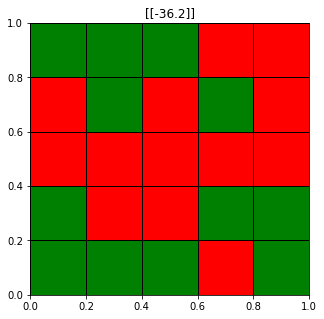

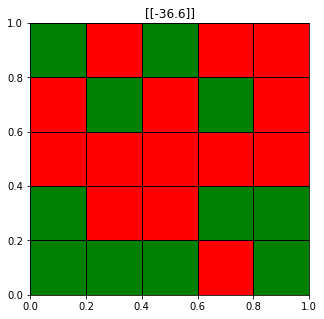

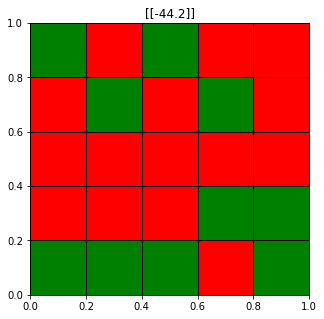

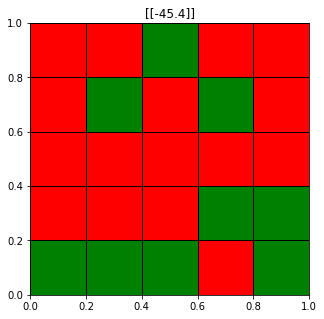

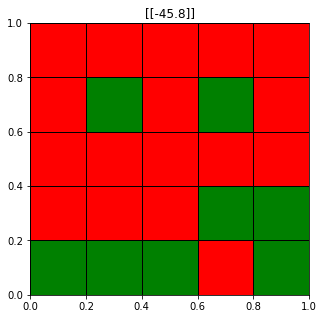

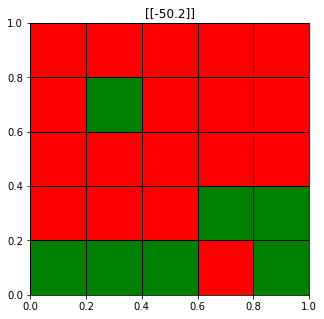

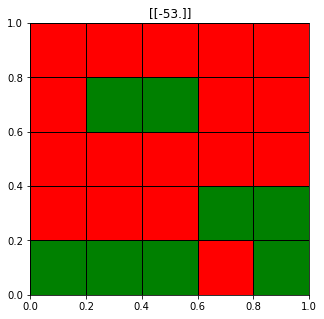

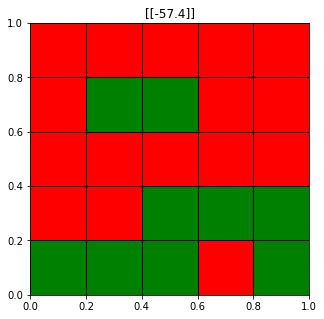

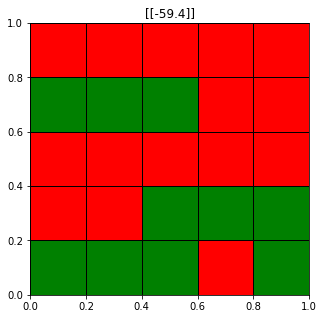

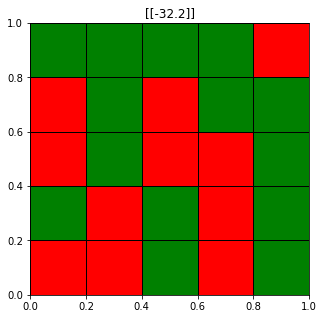

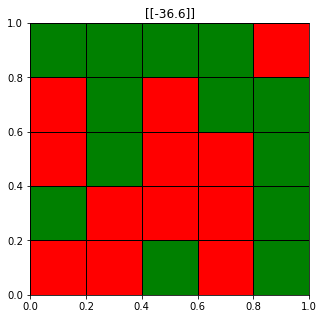

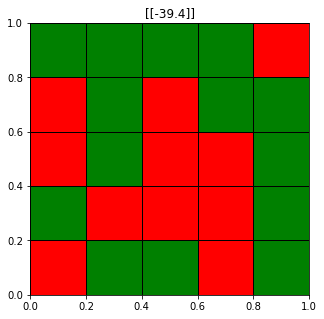

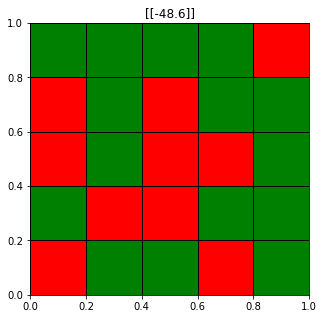

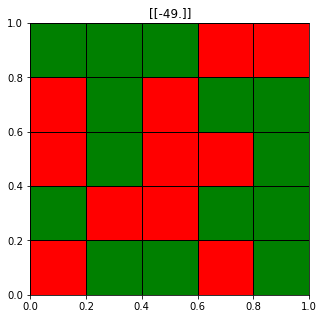

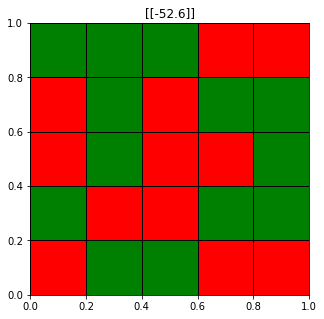

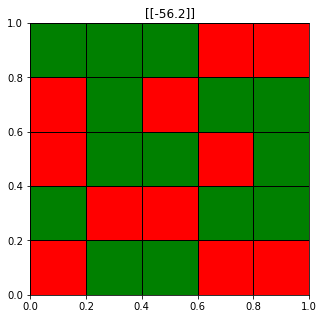

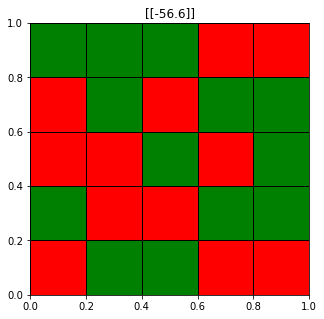

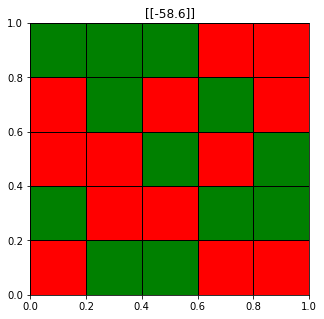

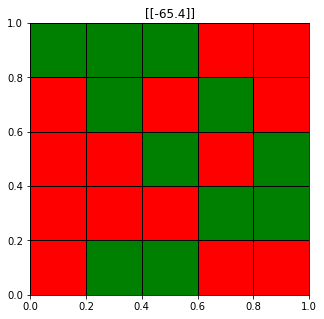

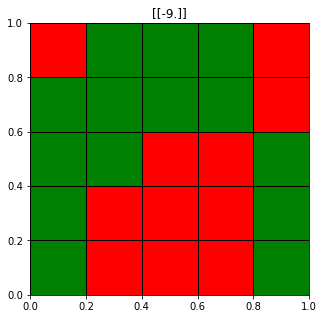

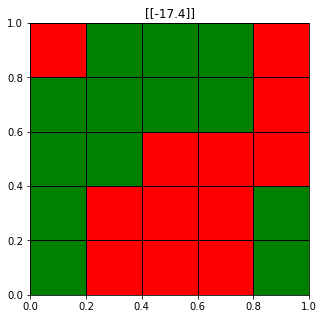

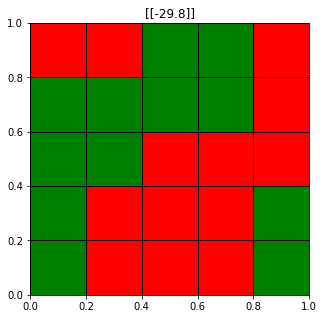

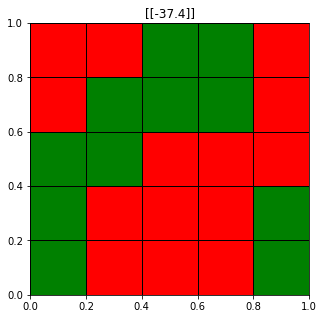

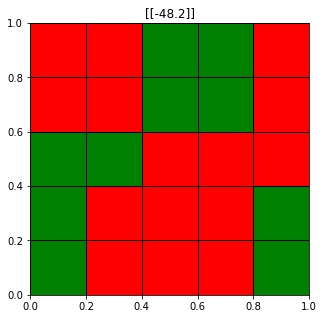

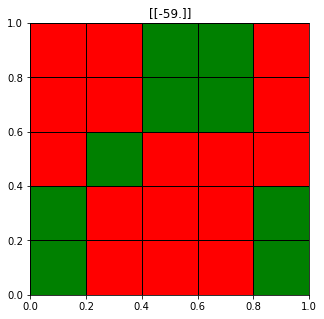

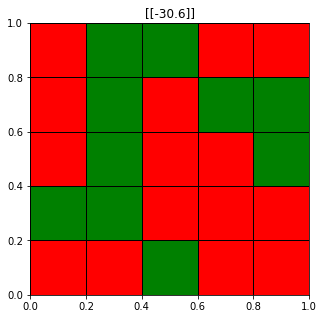

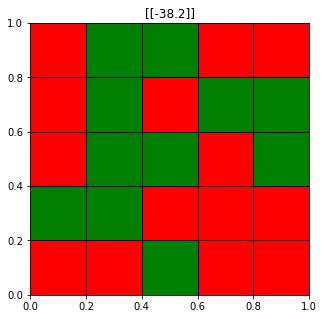

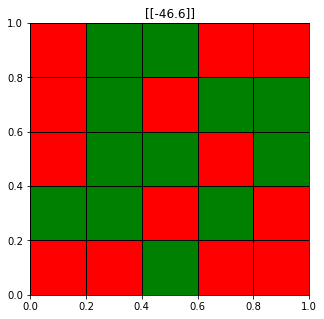

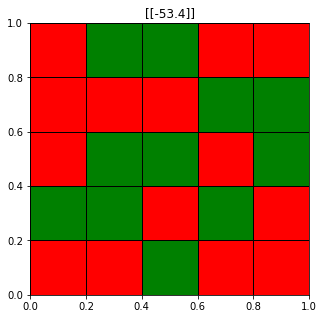

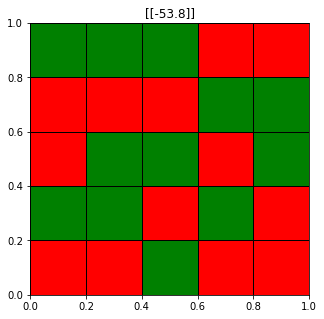

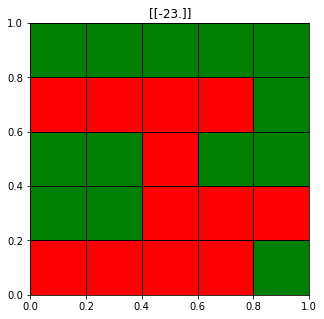

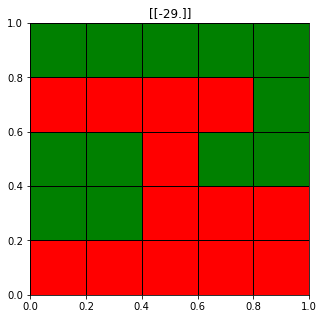

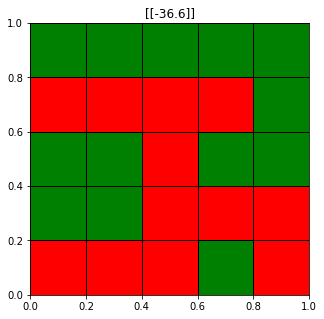

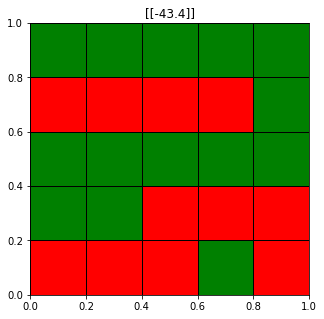

In [18]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case1_5.x_input(date_noise)
        network_case1_5.show()
    
        times=0
        ex_V=np.copy(network_case1_5.V)
        while True:
            network_case1_5.update()
            if ex_V!=network_case1_5.V:
                network_case1_5.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case1_5.V)
        
            if times>50:
                break
            
        score=np.where(network_case1_5.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

6種類のとき

In [19]:
N=25
Q=6
network_case1_6=HopfieldNetwork(N,Q)
network_case1_6.learn(data_matrix[:,:6])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 92.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                        
5 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 72.0 %
                        
2 番目のデータ
(25, 1)
正解率: 96.0 %
                        
3 番目のデータ
(25, 1)
正解率: 92.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                        
5 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 80.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 92.0 %
                        
4 番目のデータ
(25, 1)
正解率: 48.0 %
                        
5 番目のデータ
(25, 1)
正解率: 72.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 80.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 48.0 %
                        
4 番目のデータ
(25, 1)
正解率: 100.0 %
                  

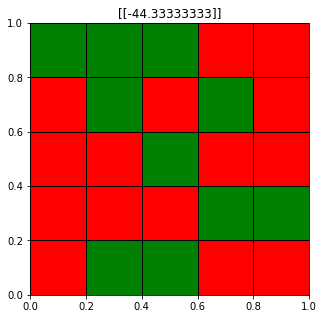

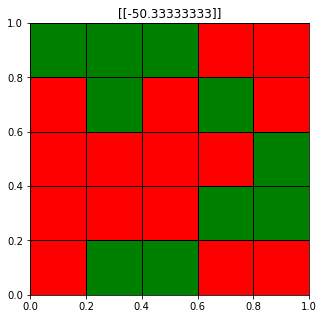

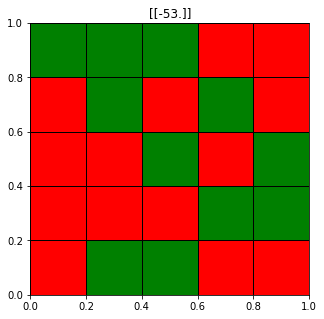

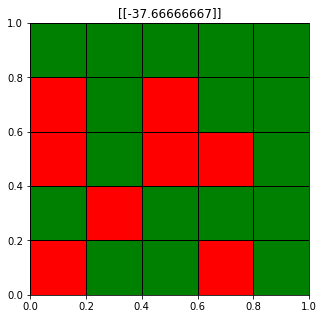

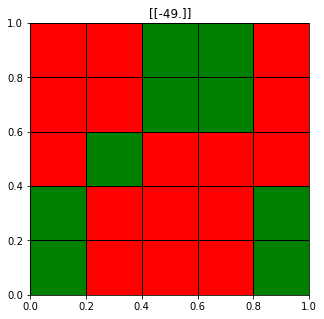

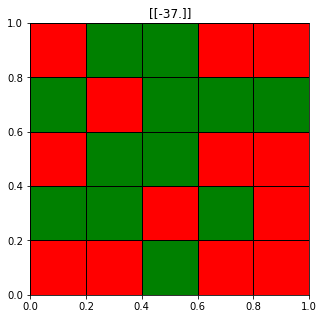

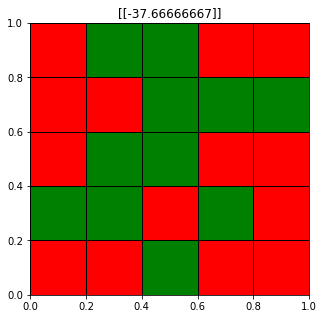

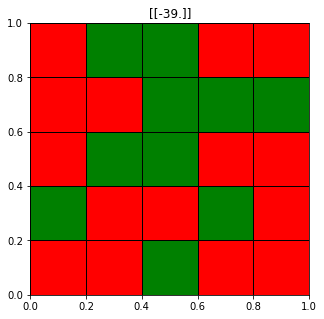

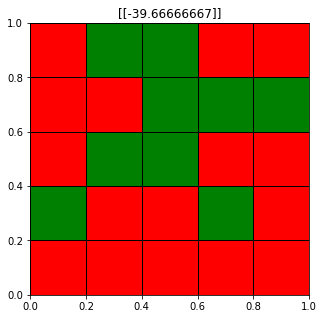

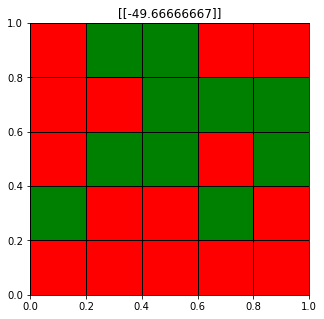

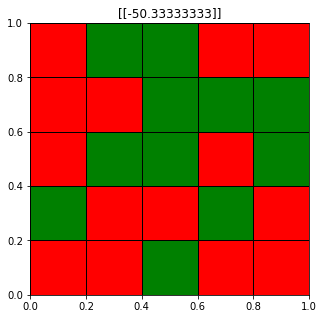

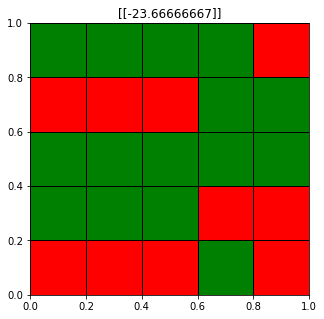

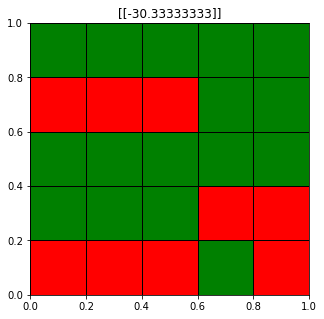

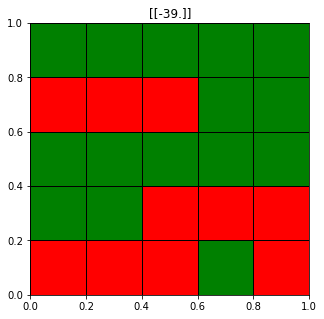

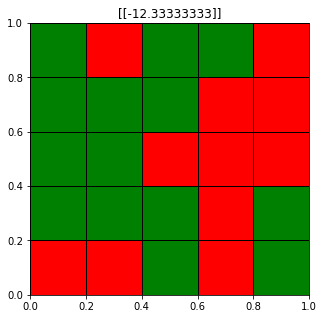

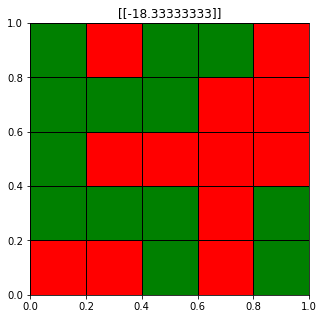

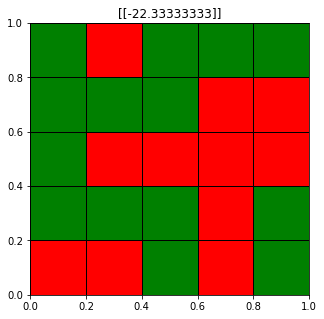

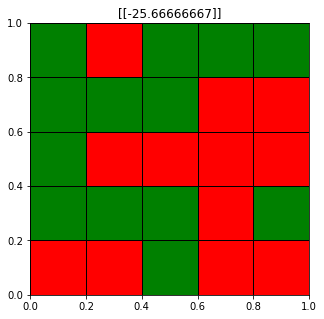

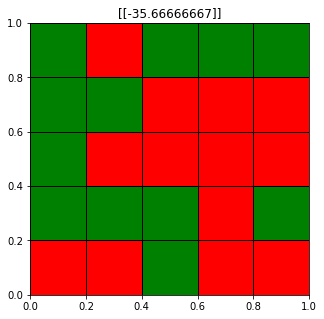

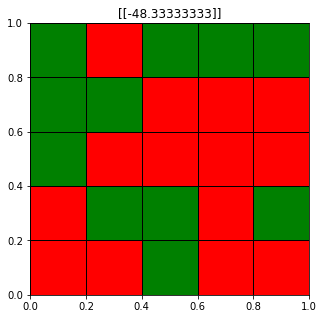

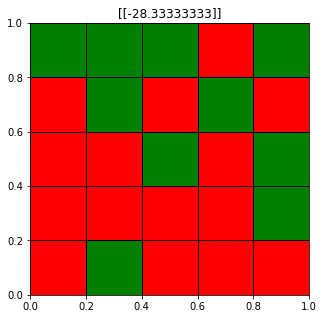

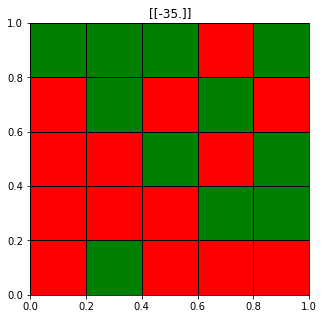

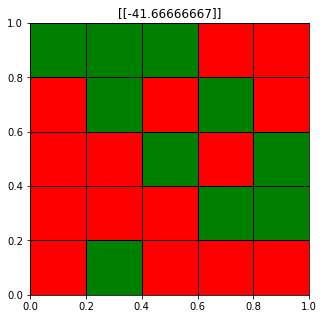

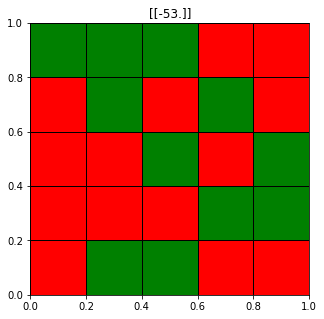

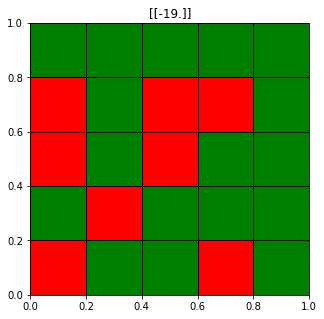

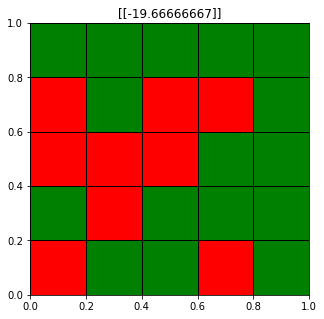

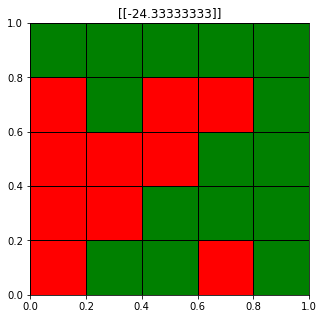

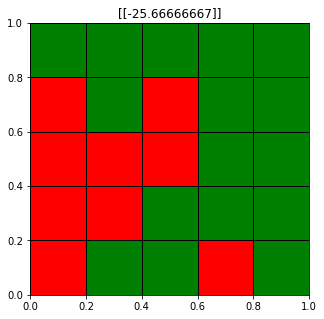

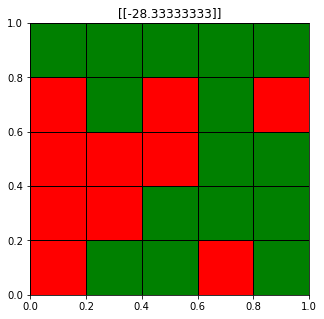

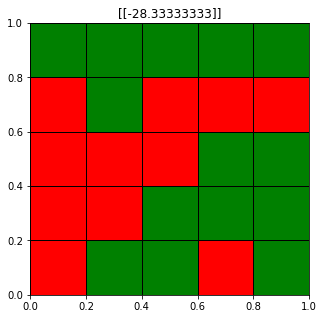

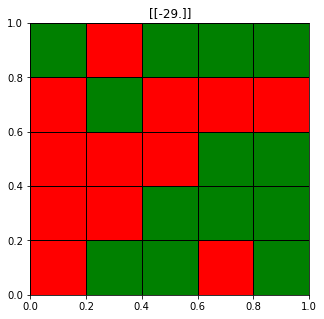

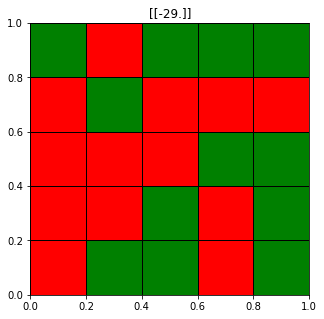

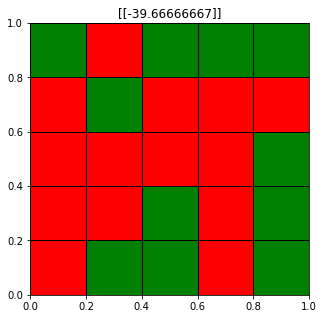

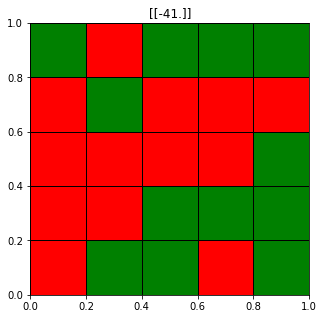

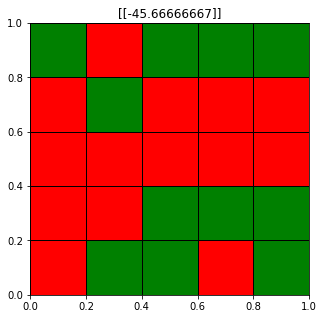

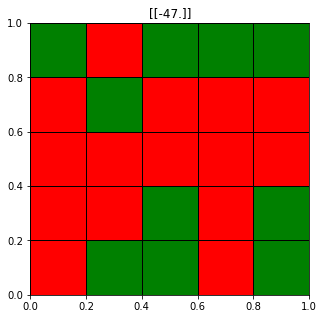

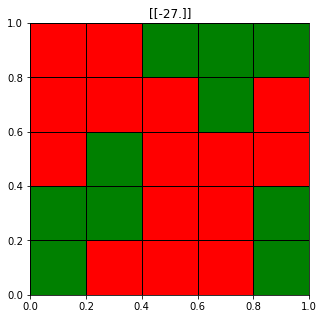

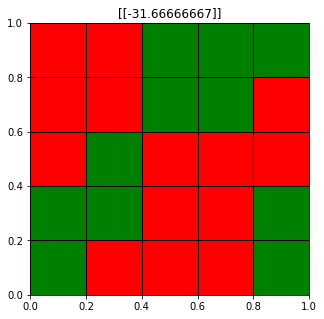

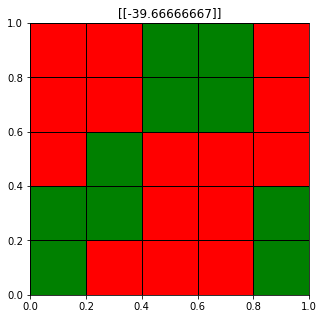

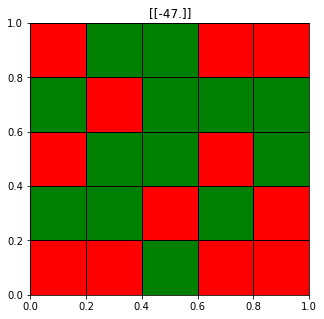

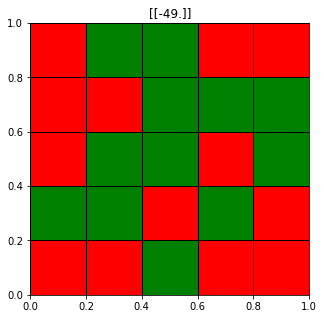

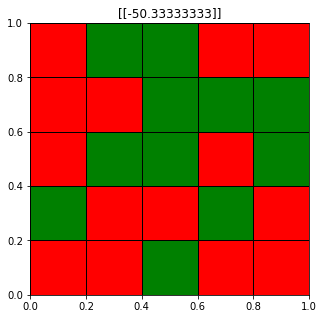

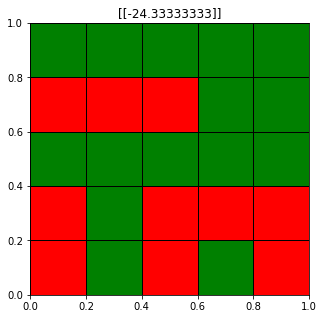

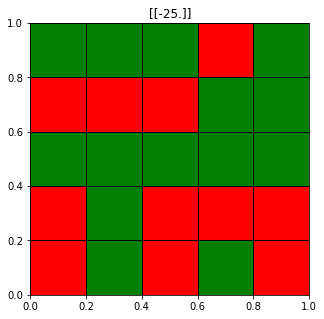

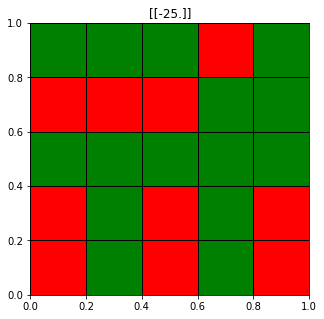

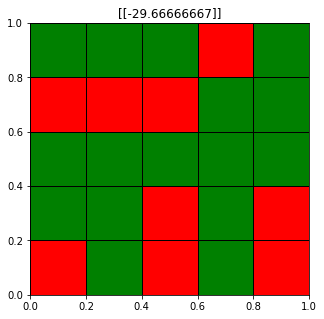

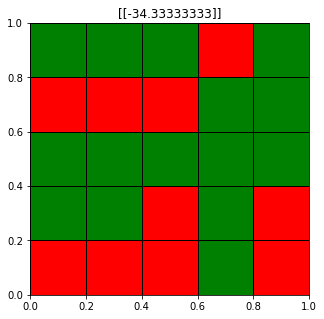

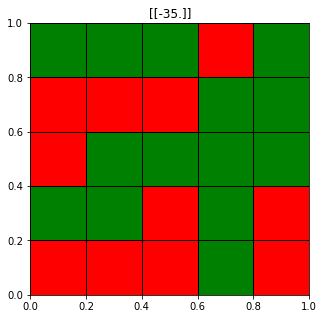

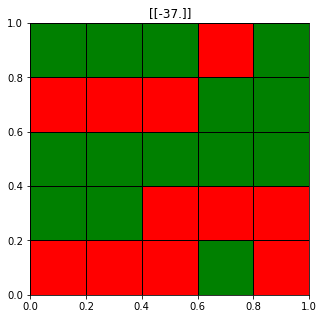

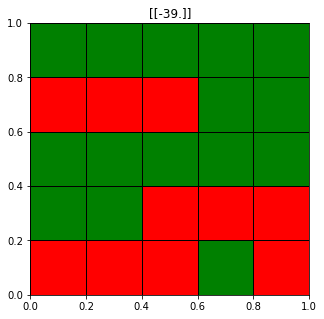

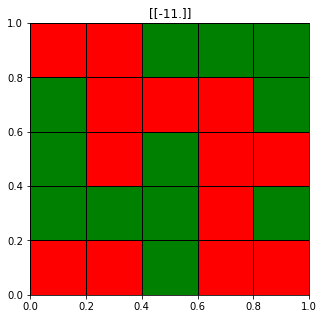

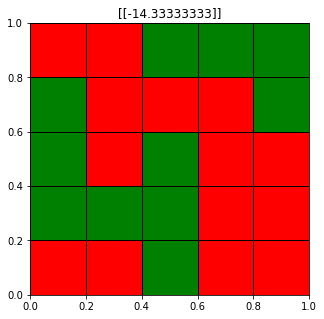

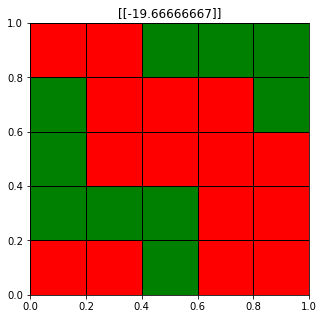

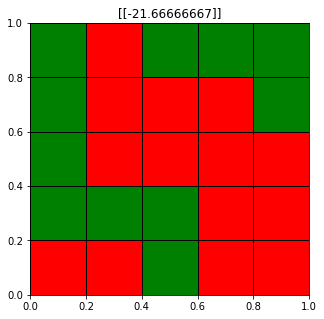

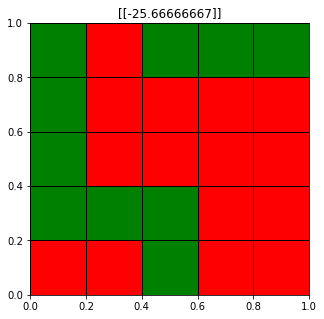

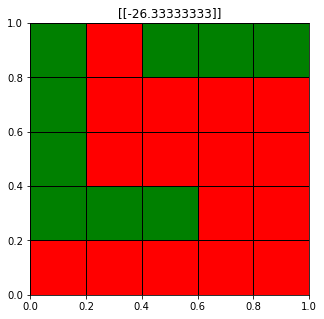

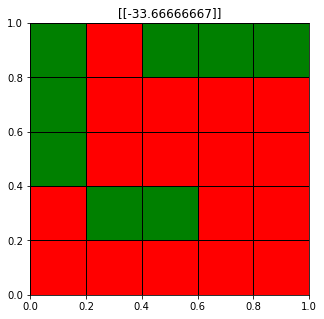

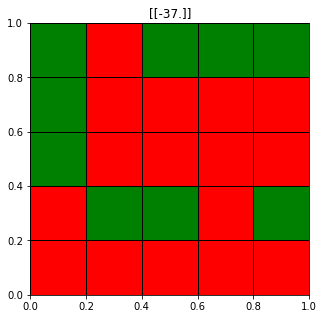

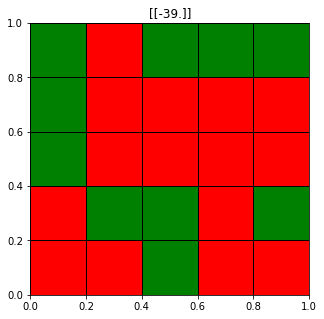

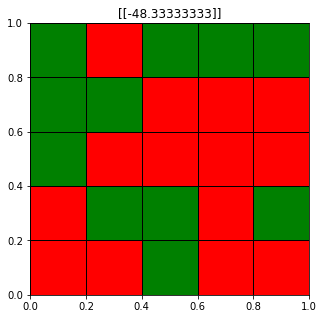

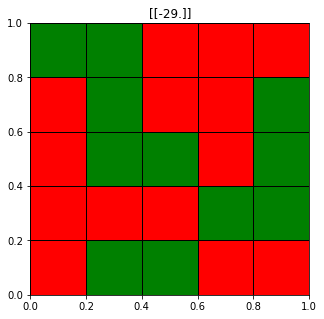

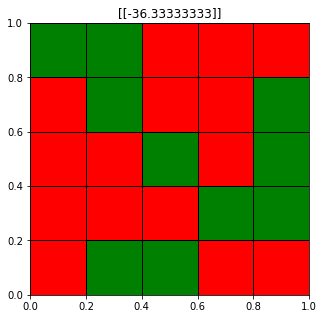

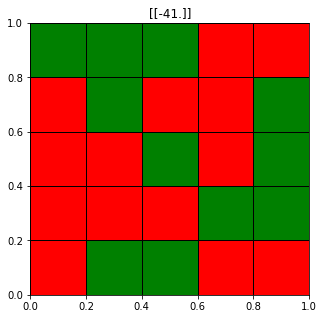

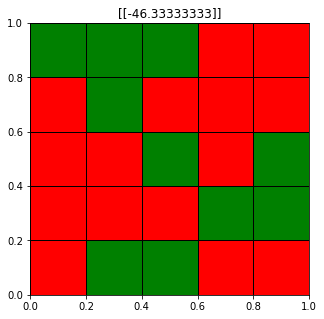

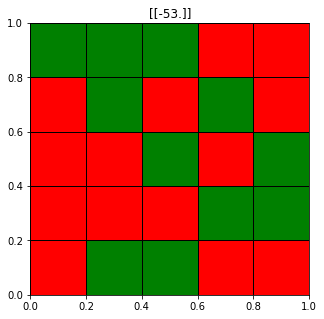

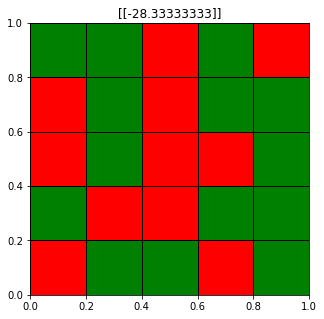

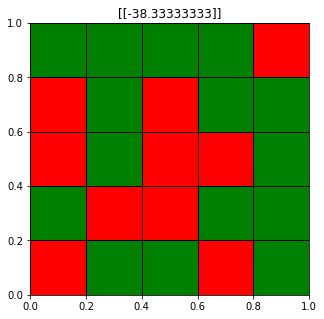

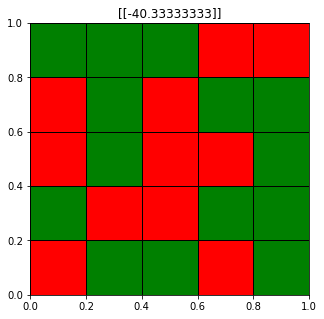

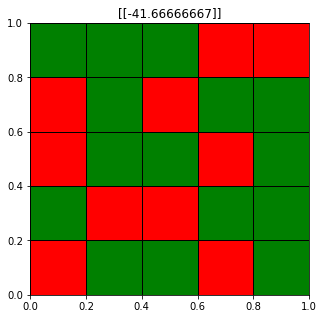

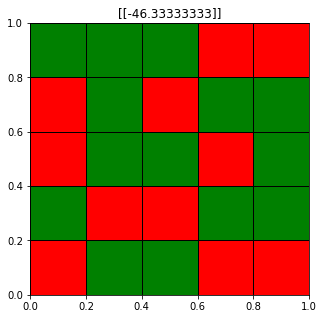

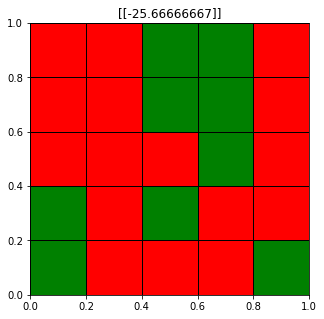

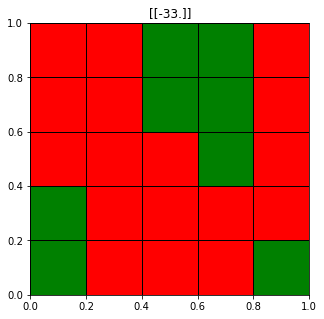

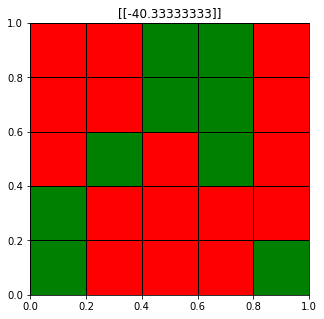

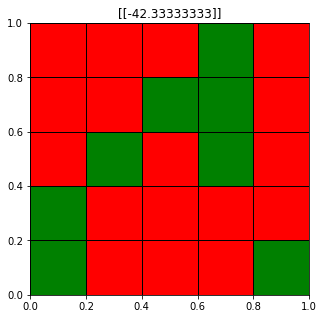

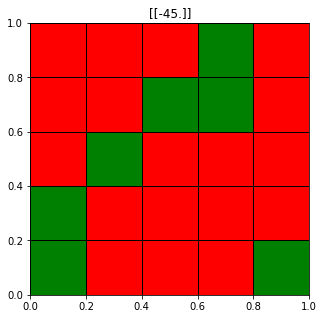

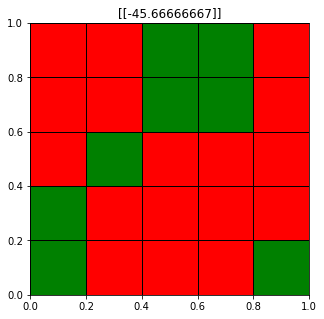

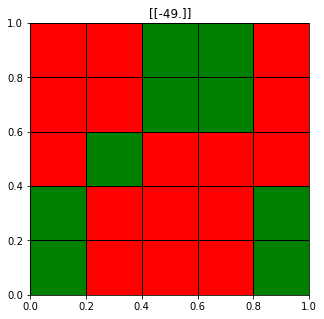

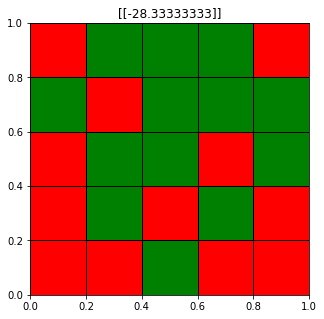

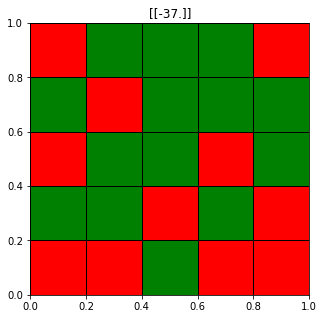

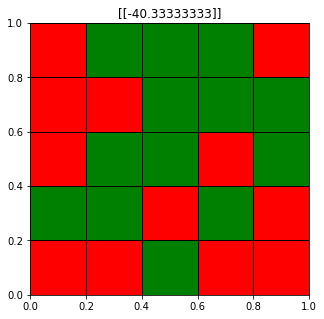

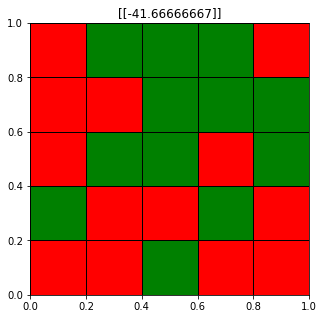

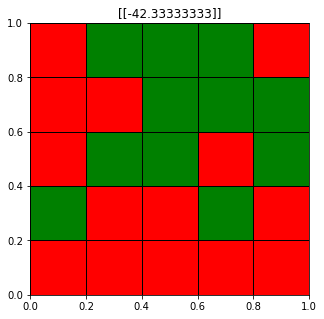

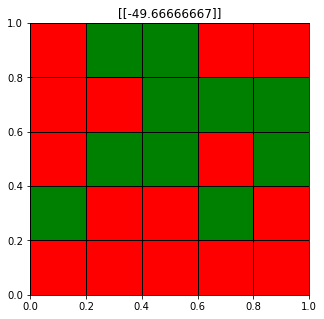

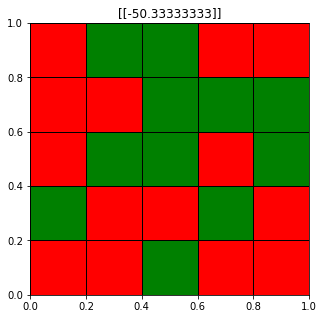

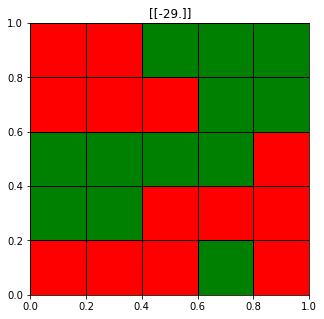

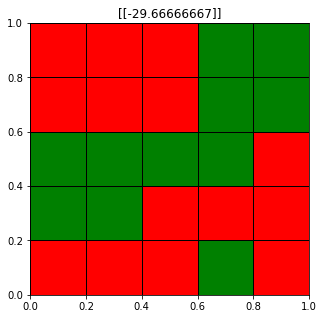

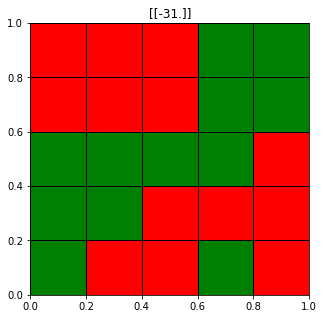

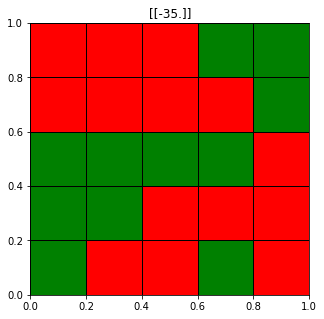

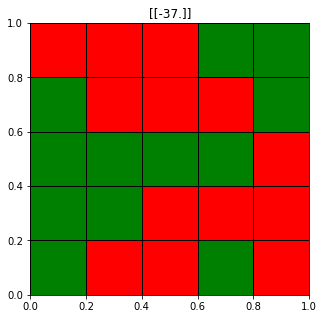

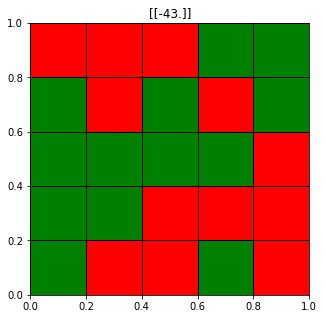

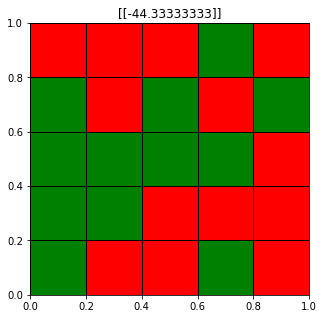

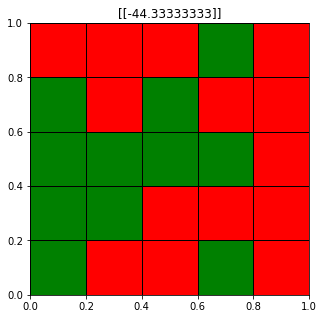

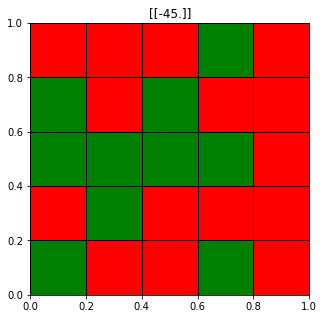

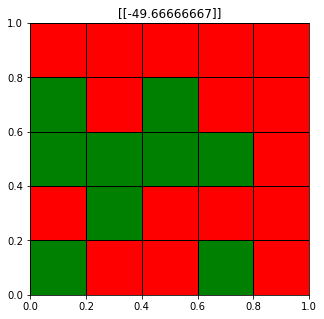

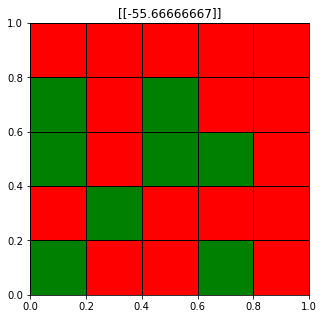

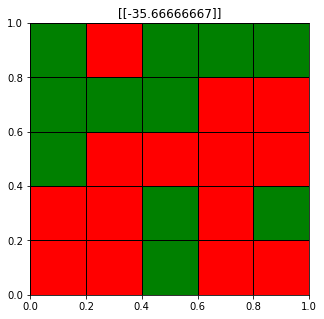

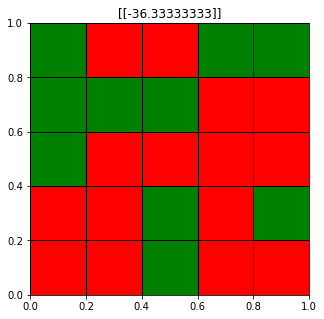

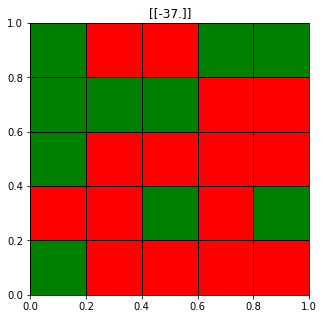

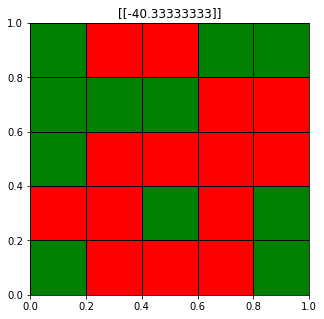

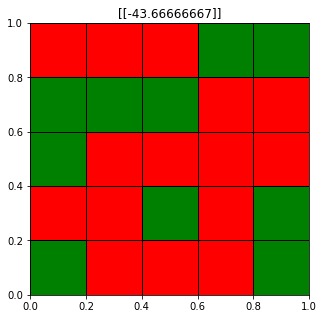

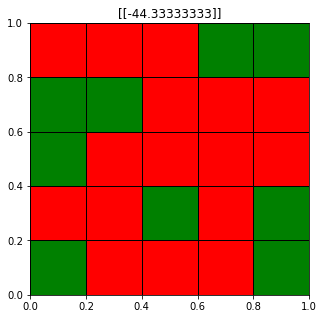

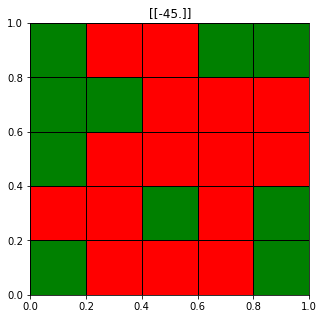

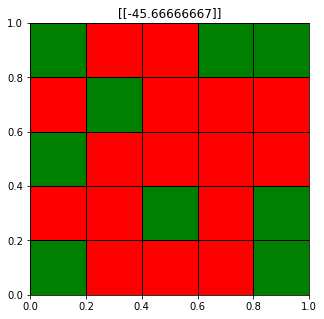

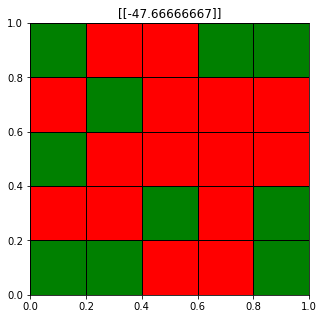

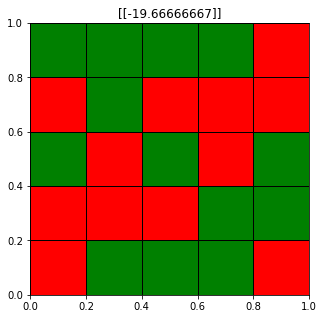

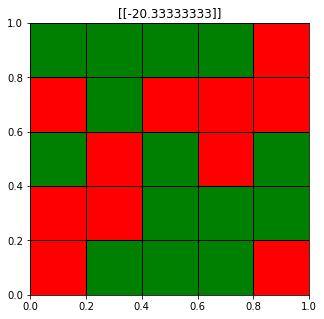

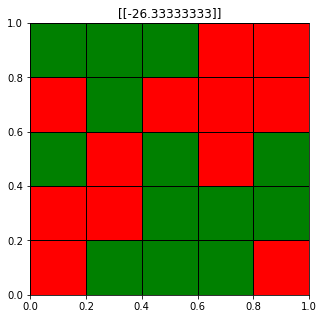

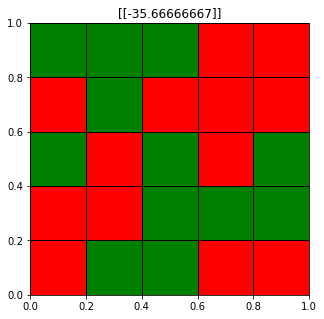

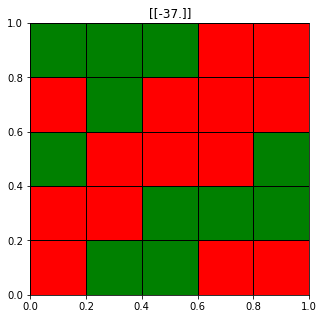

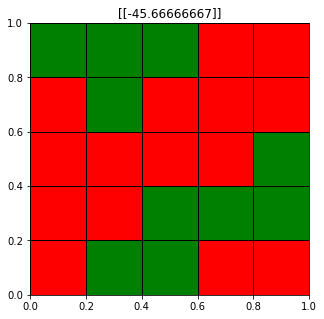

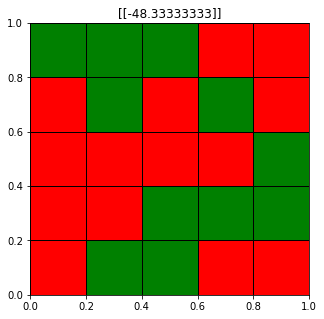

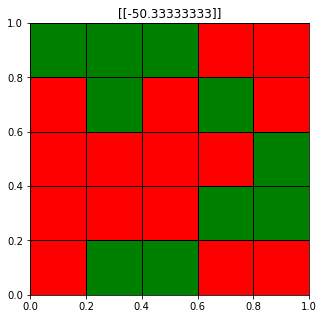

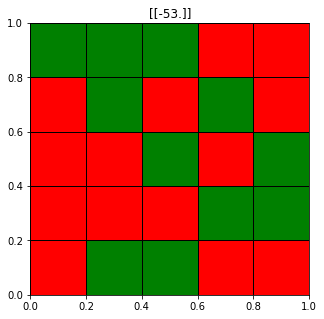

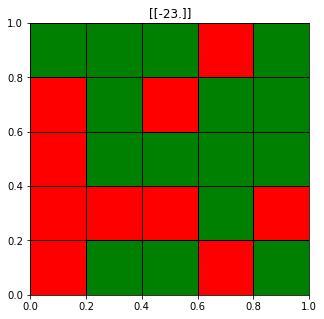

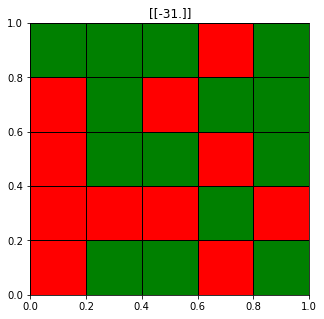

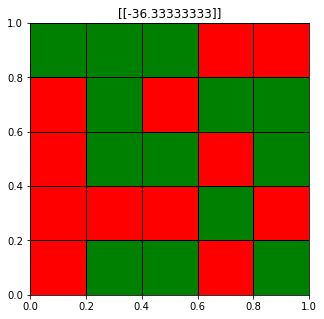

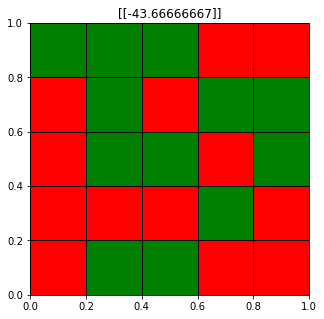

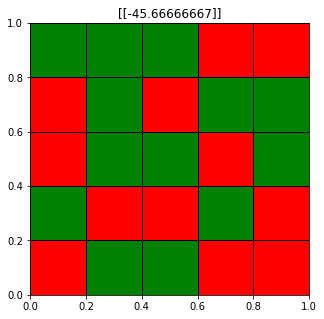

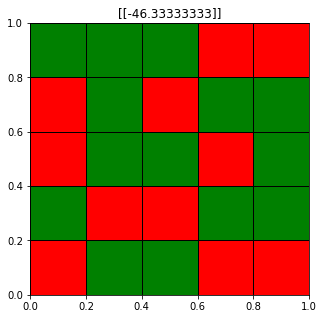

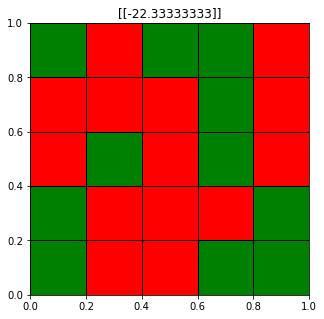

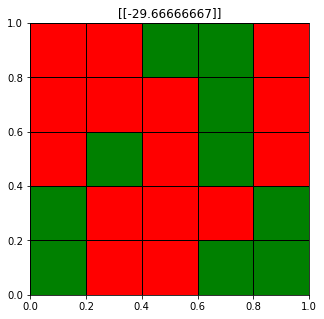

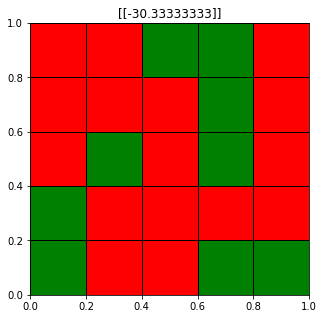

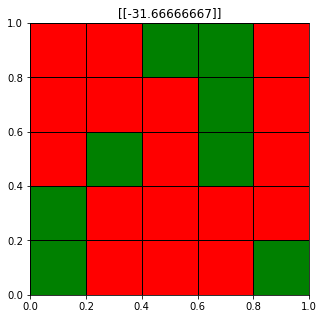

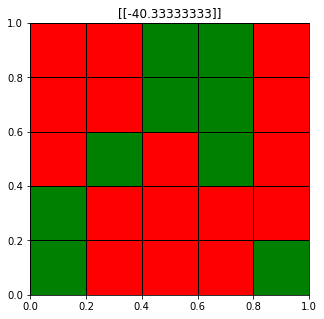

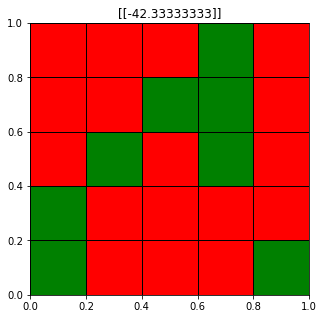

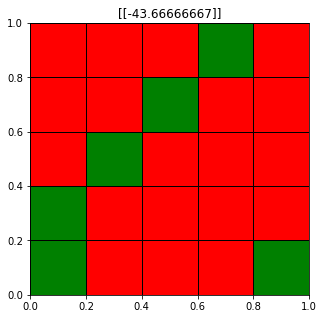

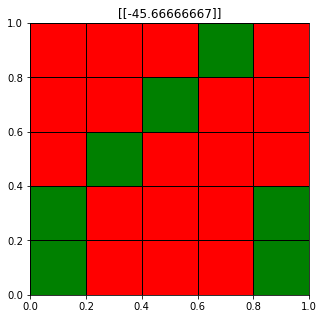

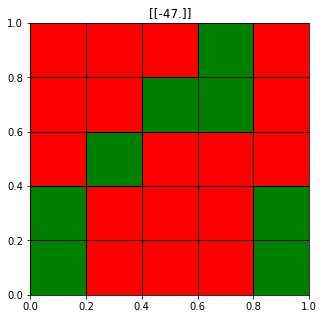

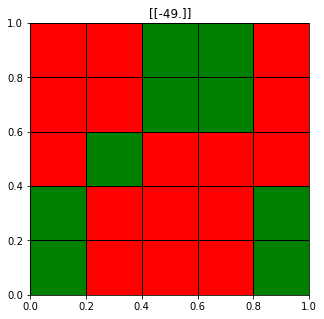

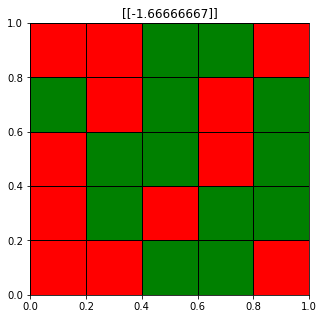

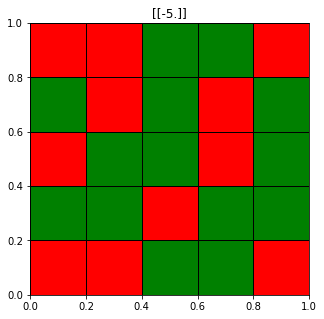

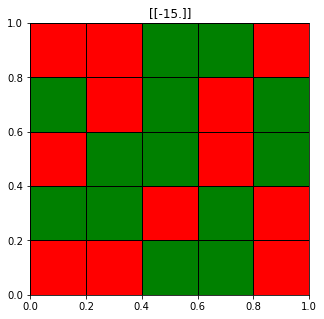

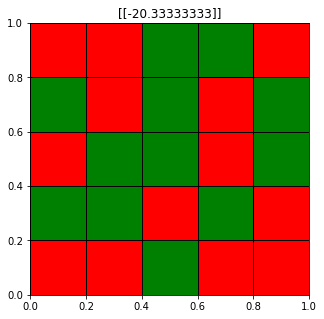

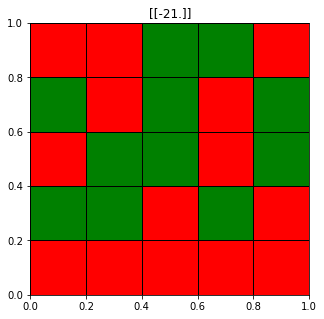

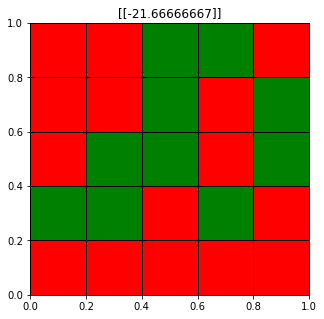

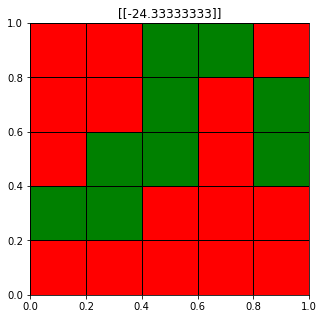

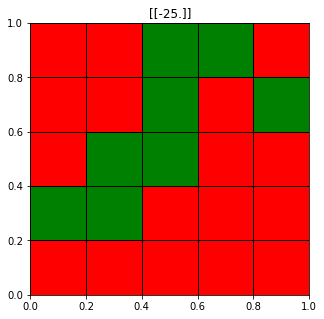

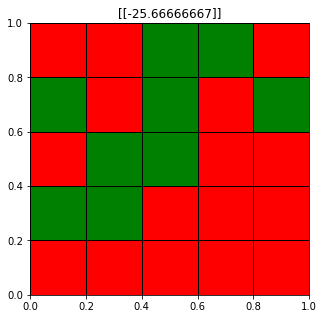

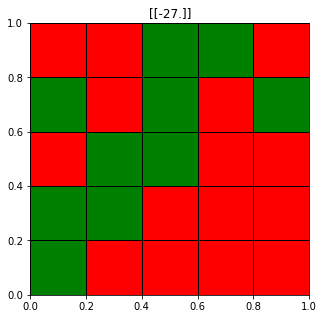

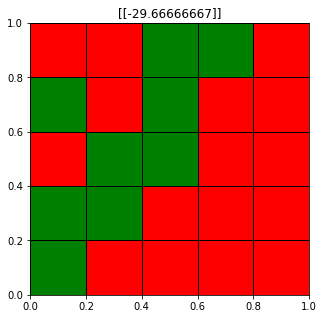

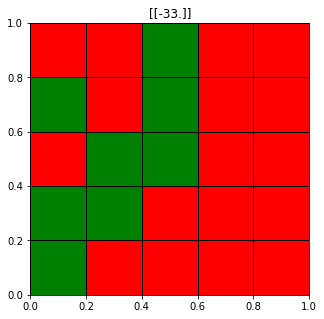

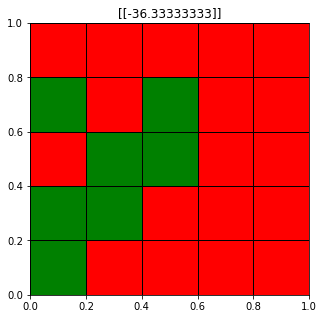

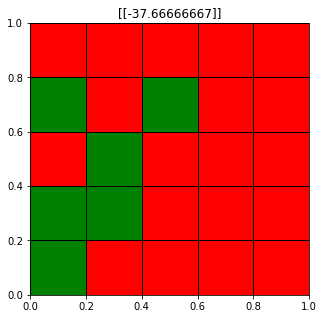

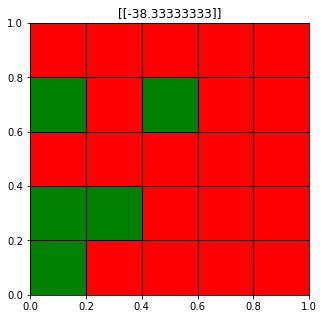

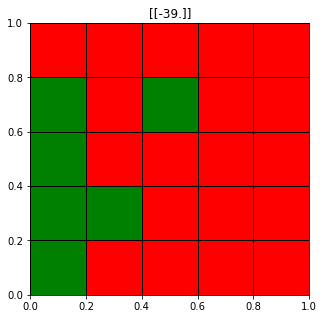

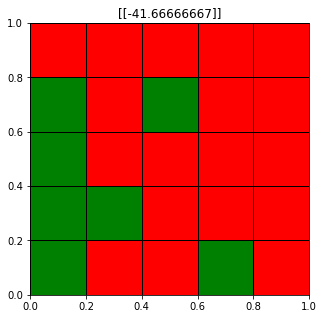

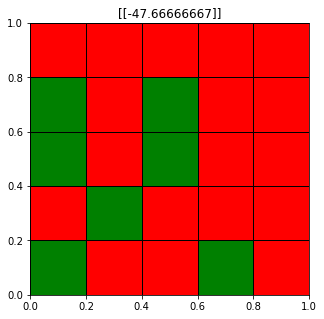

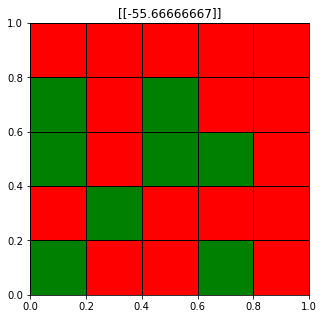

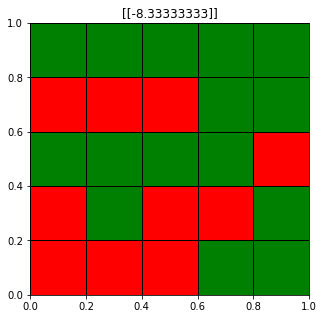

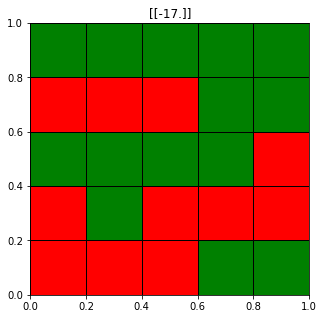

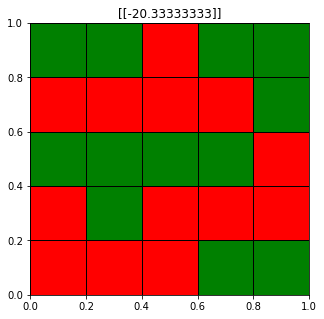

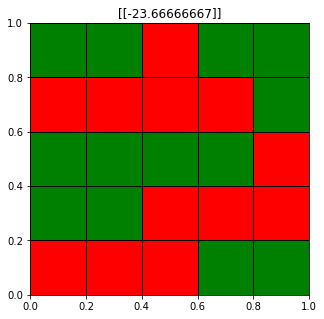

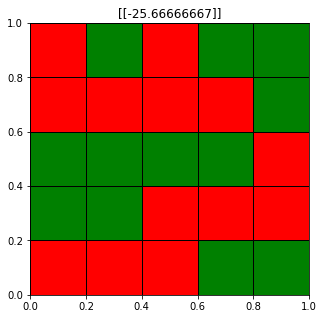

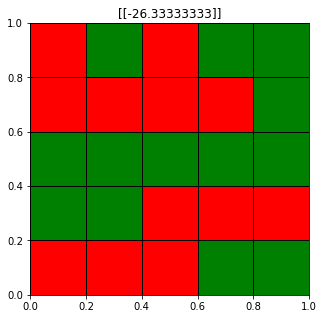

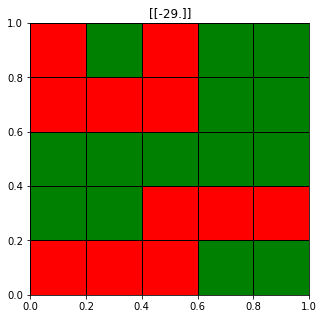

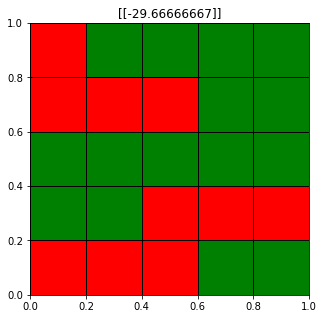

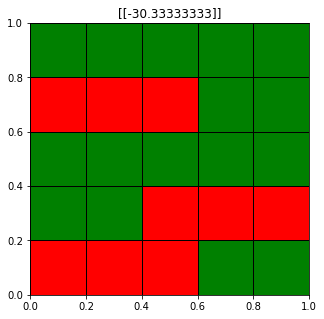

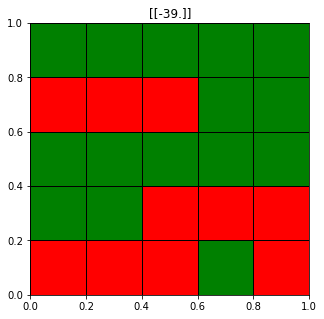

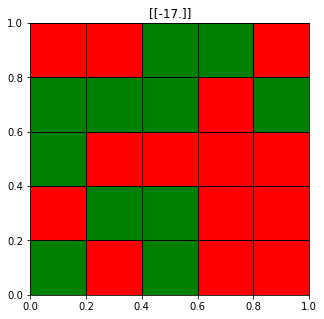

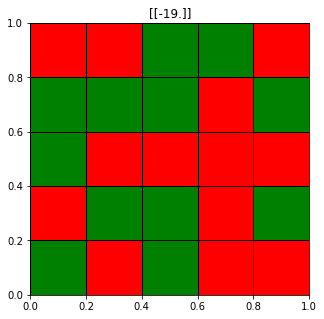

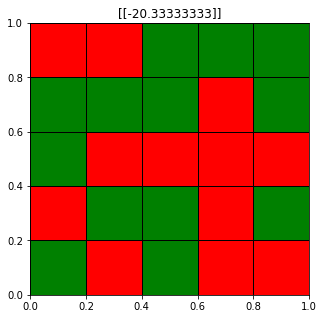

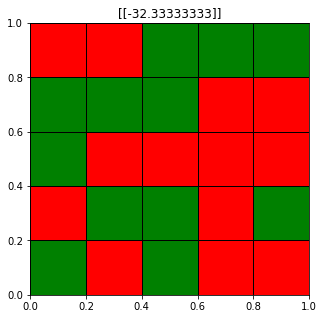

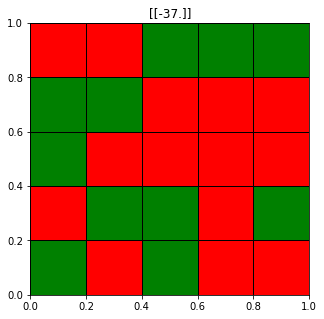

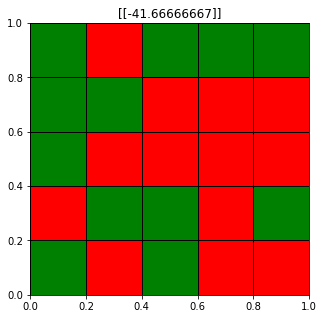

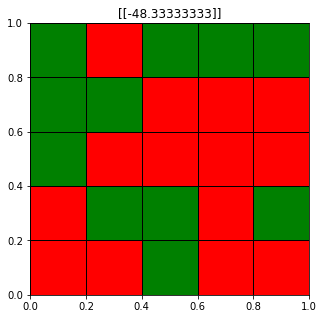

In [20]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case1_6.x_input(date_noise)
        network_case1_6.show()
    
        times=0
        ex_V=np.copy(network_case1_6.V)
        while True:
            network_case1_6.update()
            if ex_V!=network_case1_6.V:
                network_case1_6.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case1_6.V)
        
            if times>50:
                break
            
        score=np.where(network_case1_6.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

## ② 
２，４種類の学習パターンの場合にノイズ０から１００％で性能を確認する

In [22]:
N=25
Q=2
network_case2_1=HopfieldNetwork(N,Q)
network_case2_1.learn(data_matrix[:,:2])

Noise: 0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 96.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 30.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 68.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 40.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 50.0 %
0 番目のデータ
(25, 1)
正解率: 32.0 %
                        
1 番目のデータ
(25, 1)
正解率: 32.0 %
                        
------------------------------
Noise: 60.0 %
0 番目のデータ
(25, 1)
正解率: 68.0 %
                        
1 番目のデータ
(25, 1)
正解率: 4.0 %
                        
------------------------------
Noise: 70.0 %
0 番目のデータ
(25, 1)
正解率: 0.0 %
                        
1 番目のデータ
(25, 1)
正解率: 0.0 %
                        
------------------------------
Noise: 80.0 %
0 番目のデータ
(25, 1)
正解率: 0.0 %
                        
1 番目のデータ
(25, 1)
正解率: 0.0 %
                        
------------------------------
Noise: 90.0 %
0 番目のデータ
(25, 1)
正解率: 0.0 %
                        
1 番目のデータ
(25, 1)
正解率: 0.0 %
            

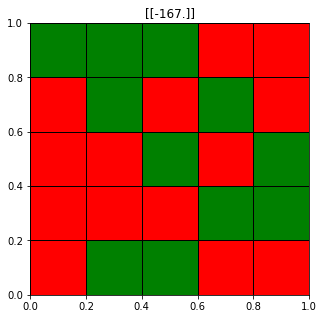

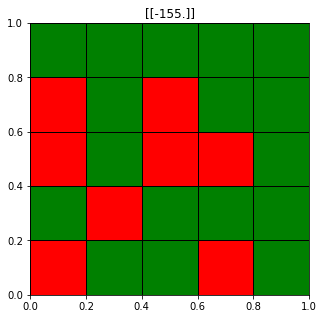

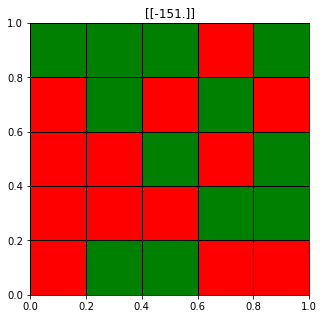

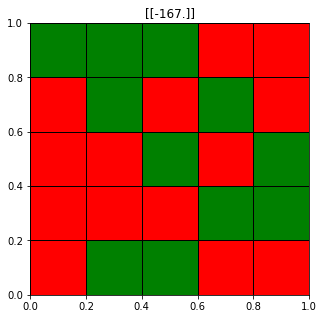

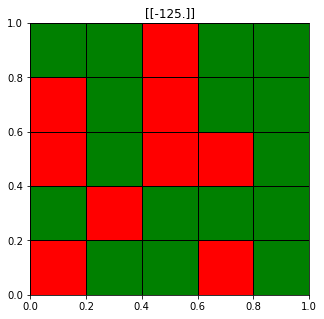

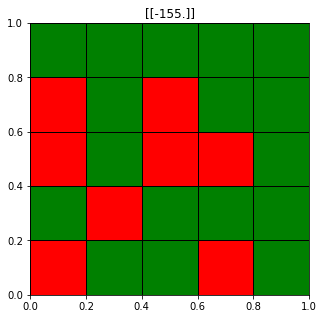

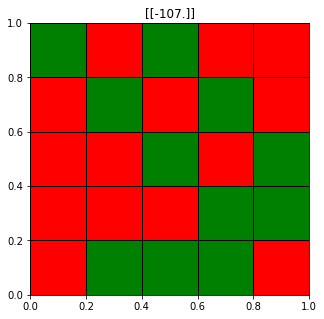

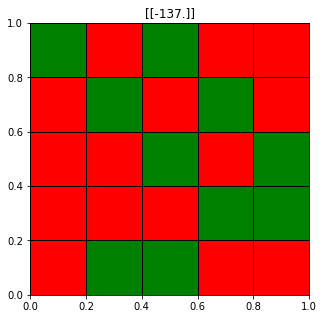

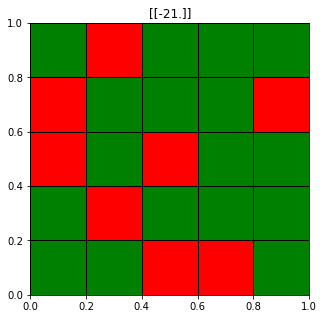

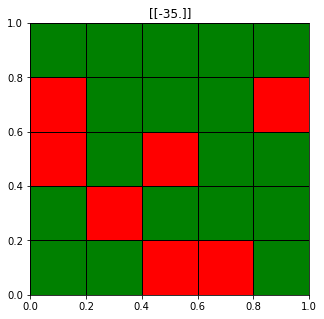

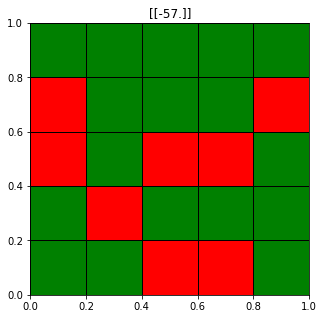

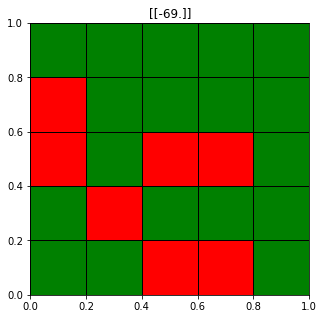

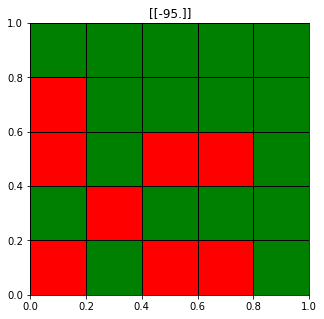

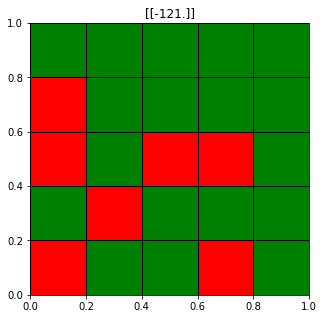

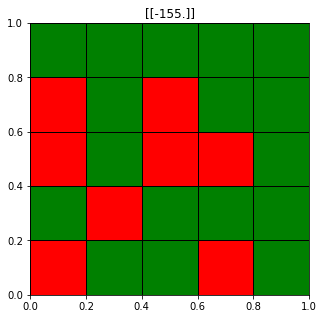

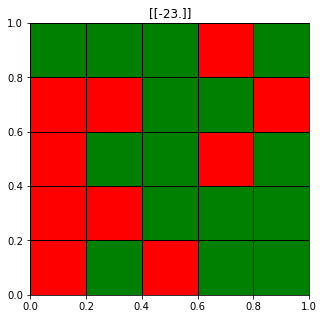

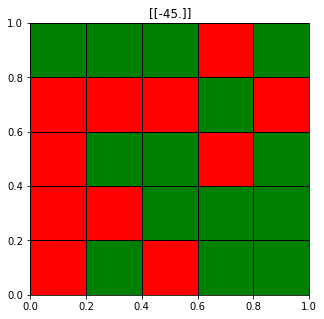

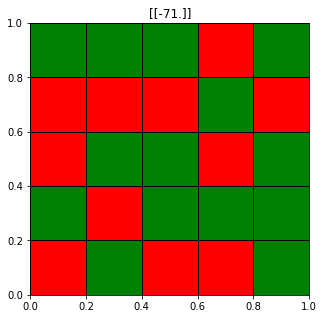

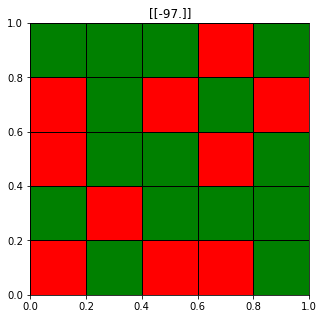

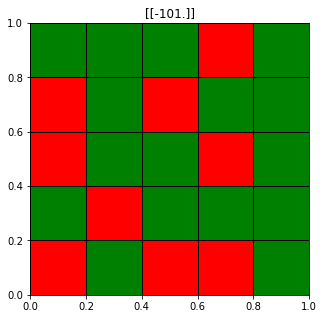

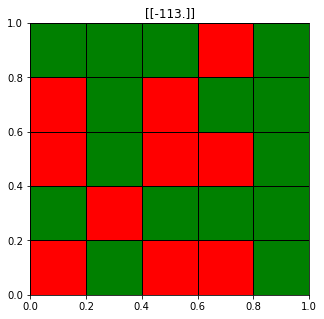

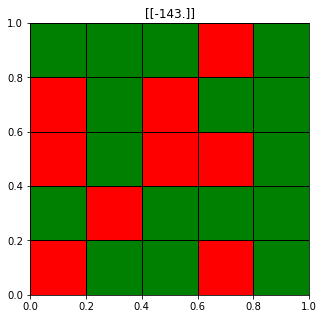

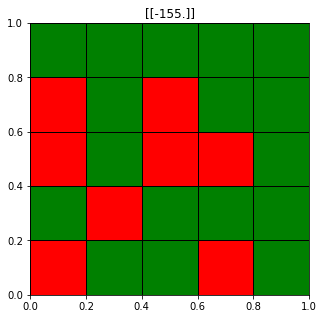

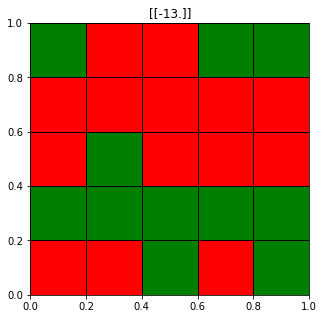

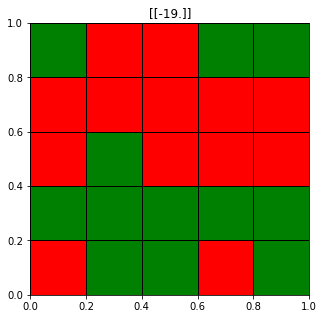

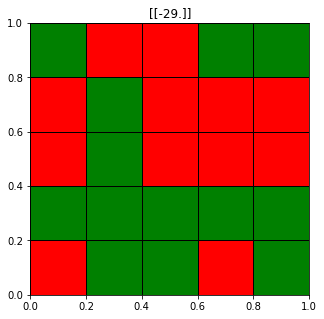

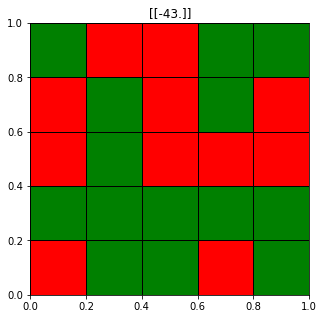

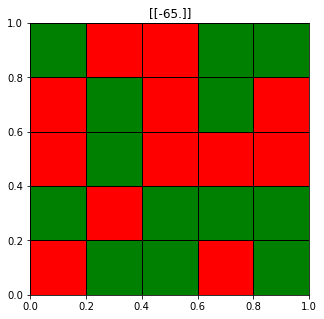

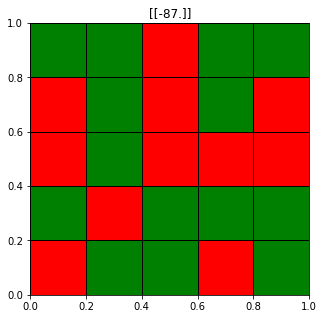

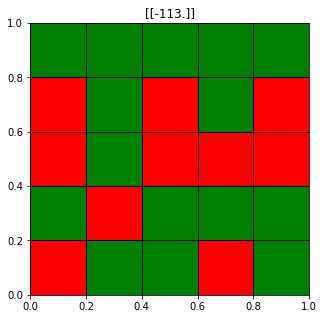

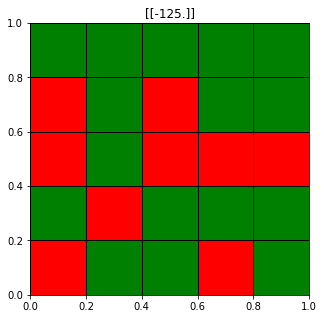

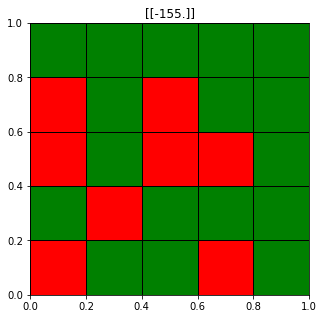

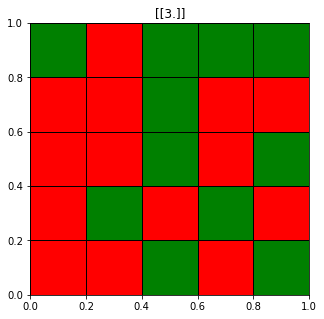

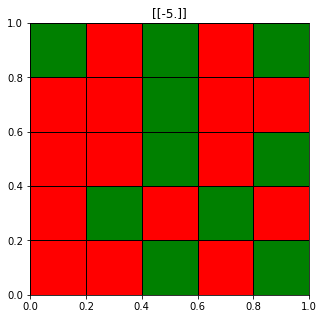

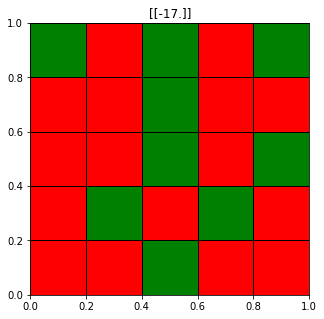

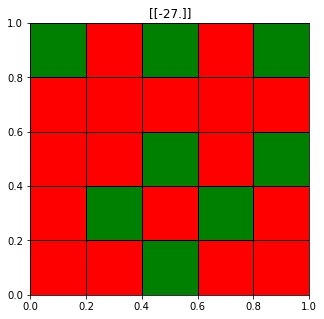

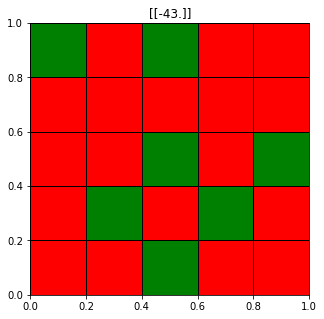

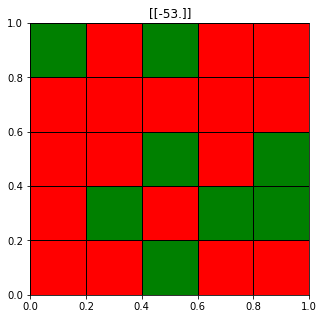

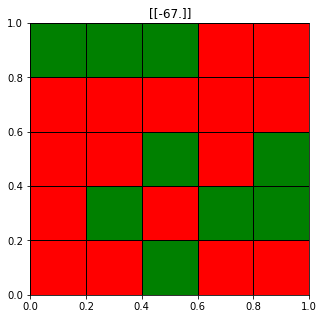

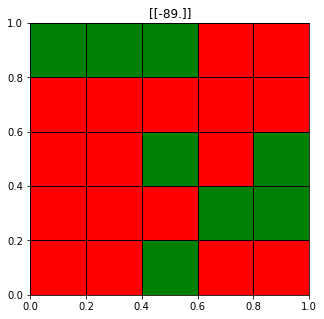

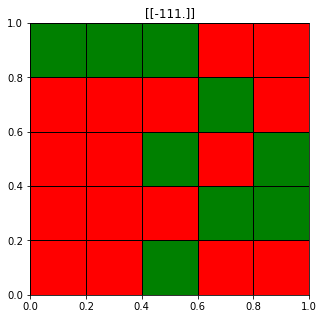

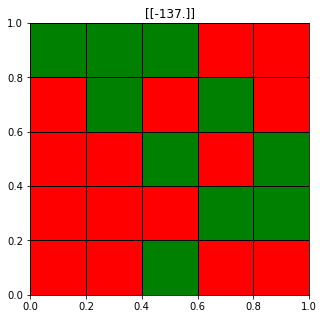

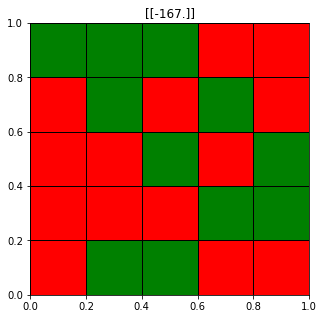

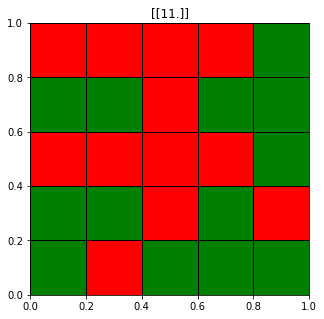

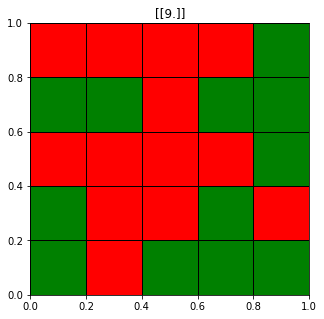

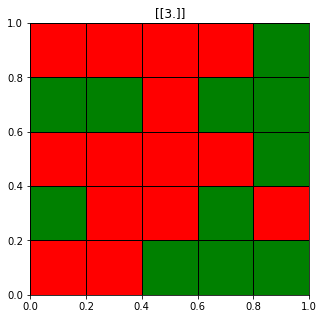

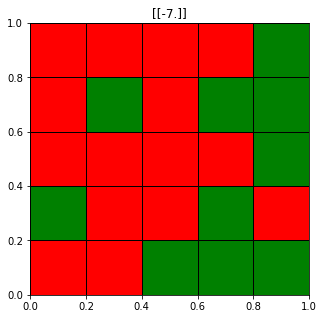

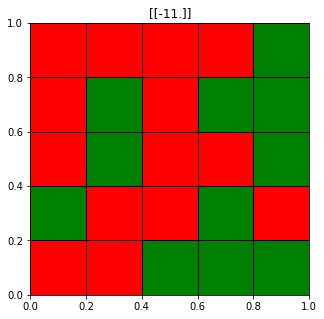

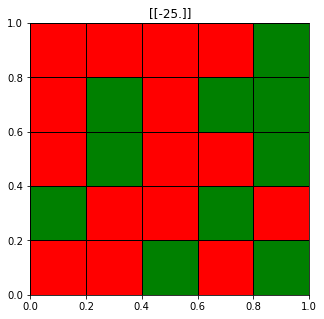

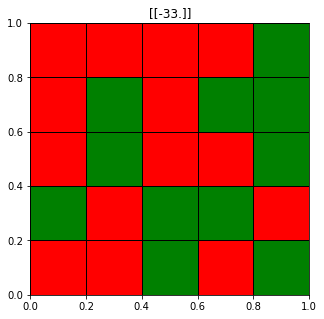

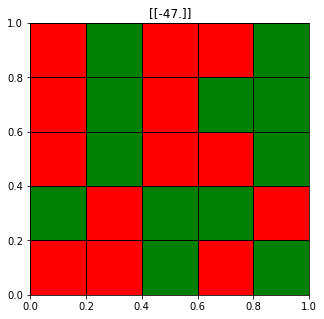

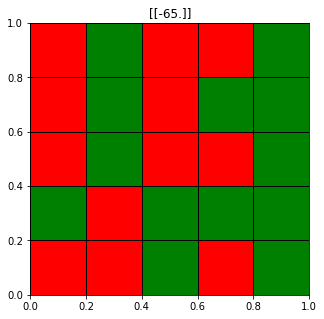

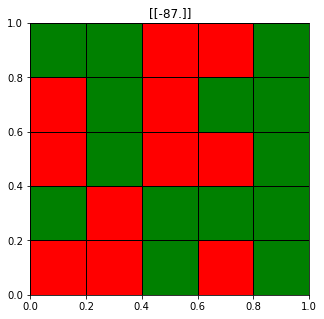

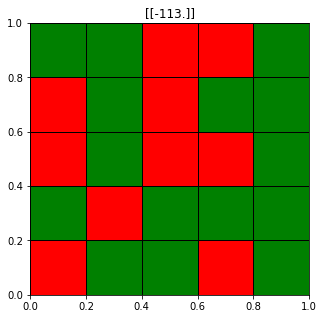

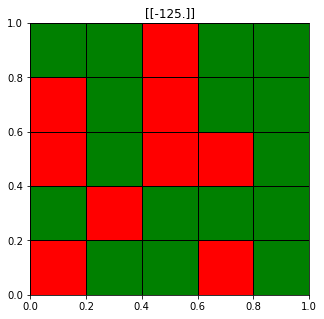

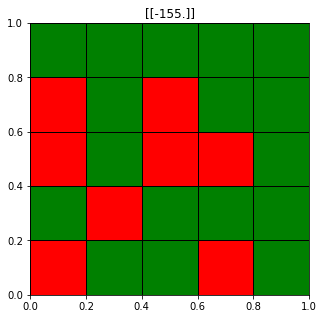

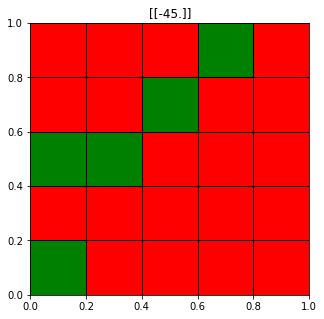

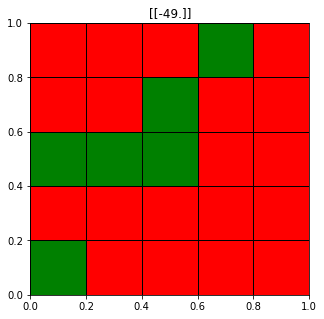

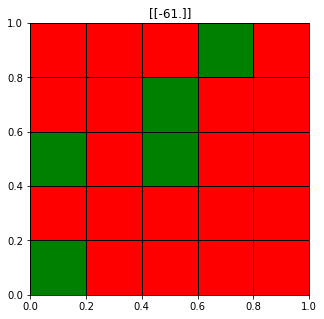

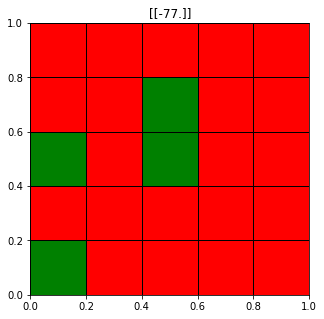

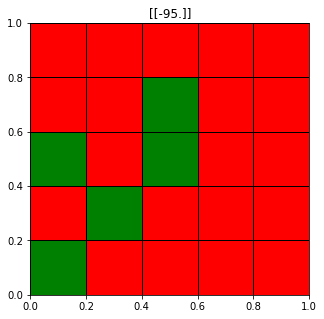

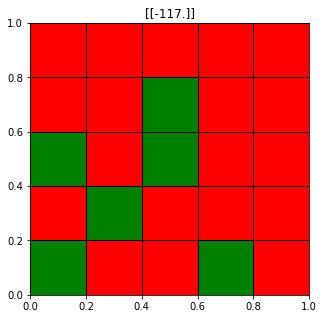

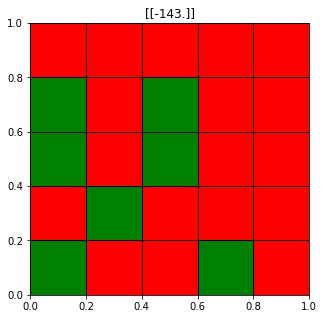

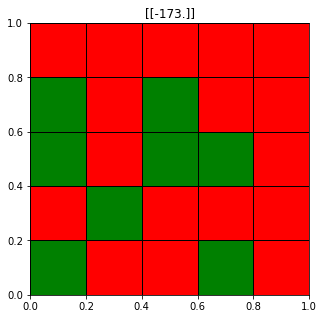

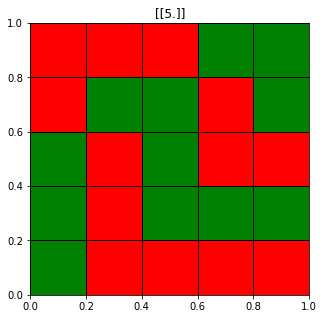

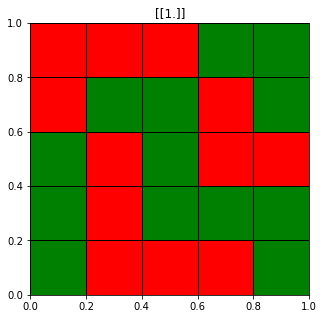

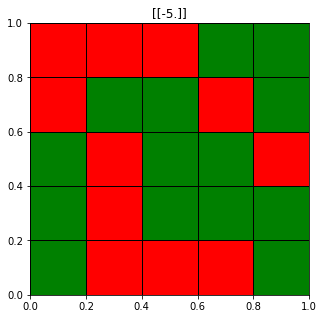

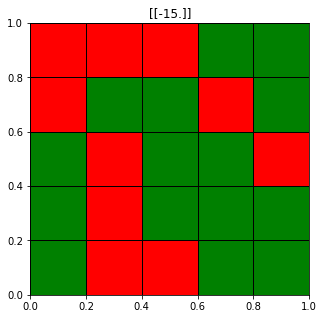

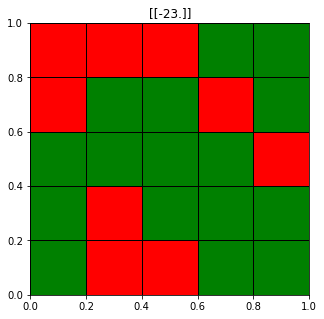

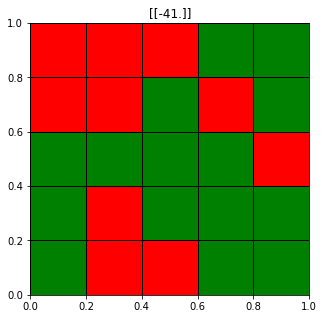

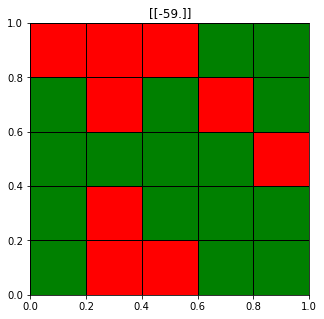

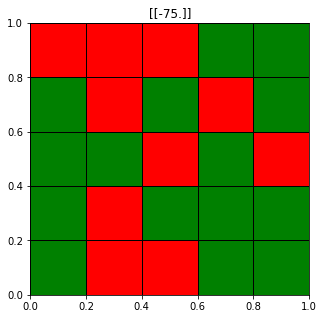

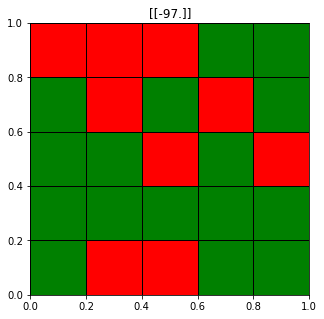

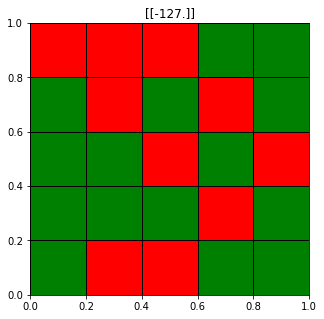

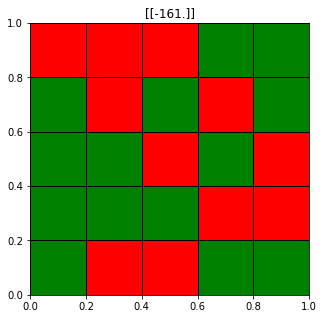

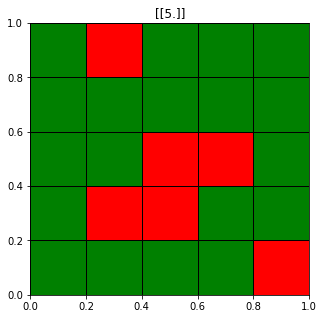

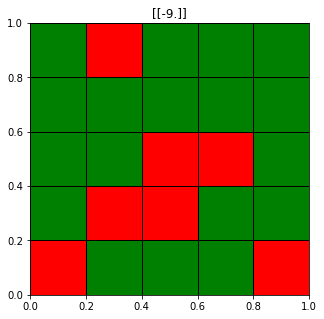

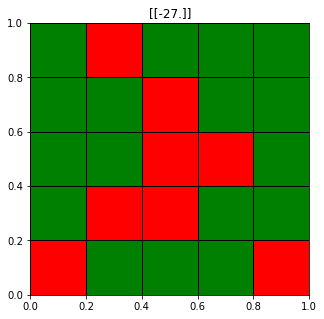

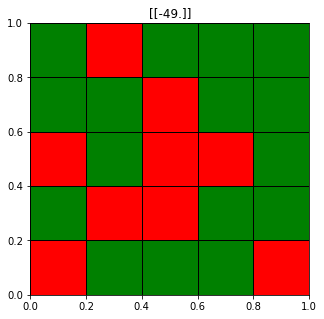

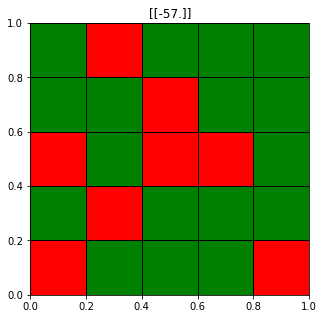

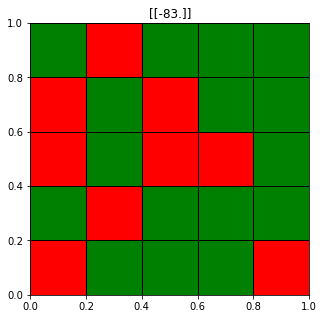

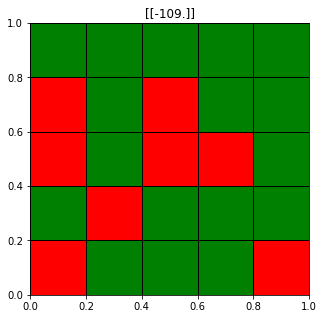

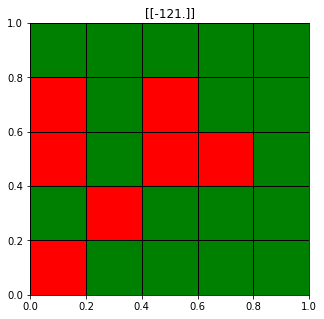

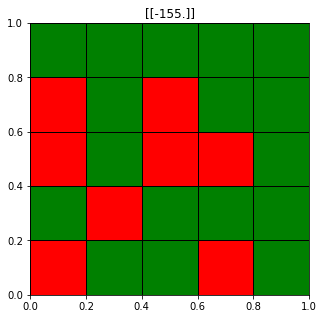

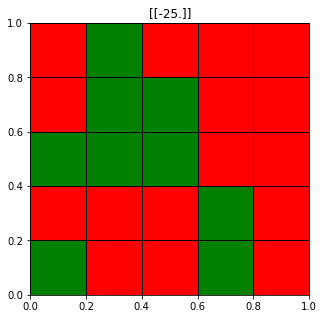

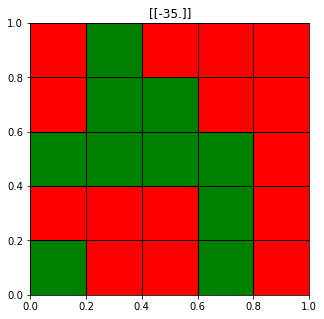

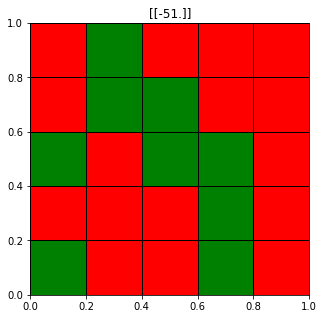

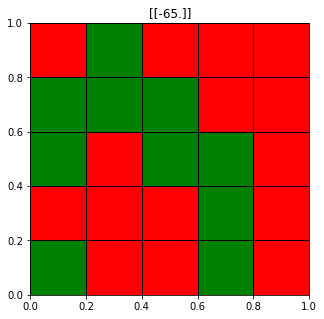

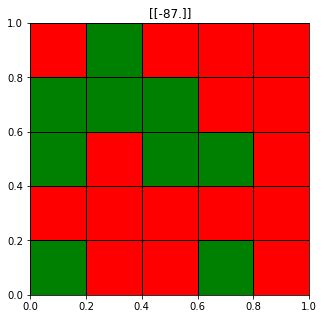

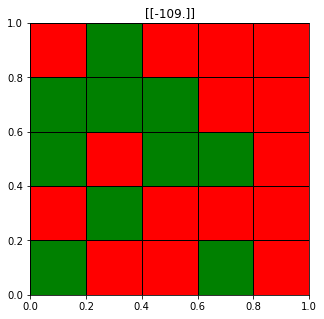

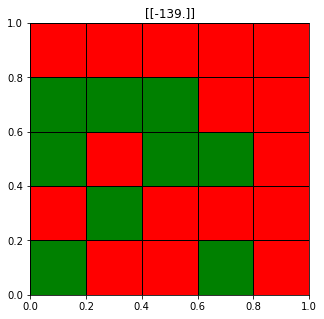

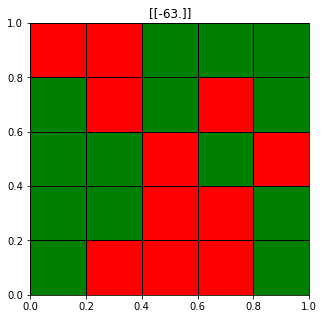

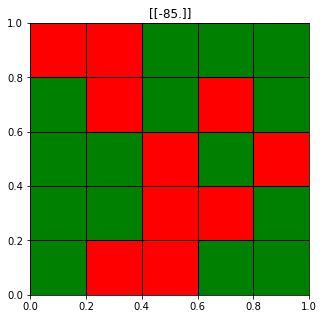

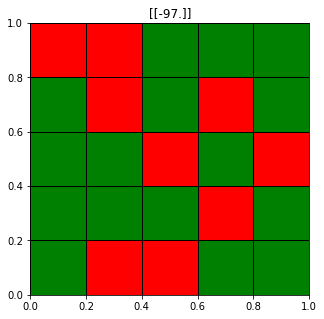

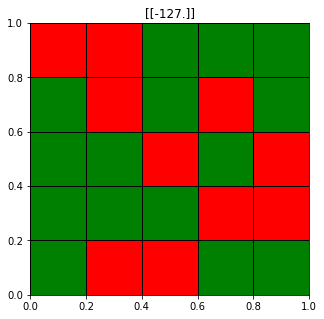

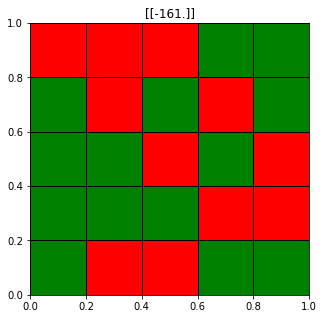

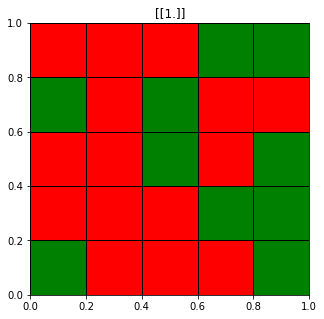

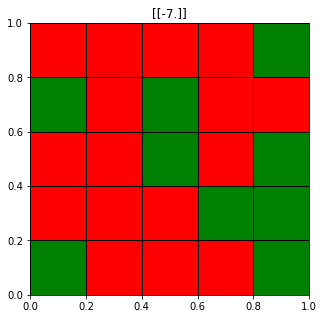

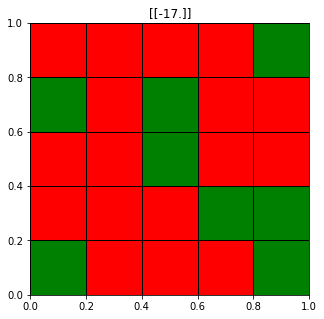

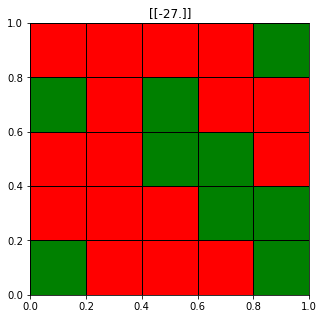

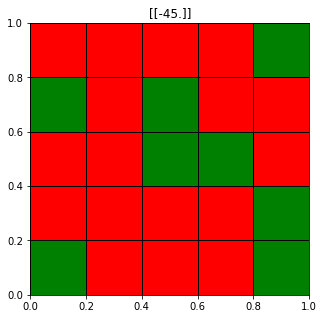

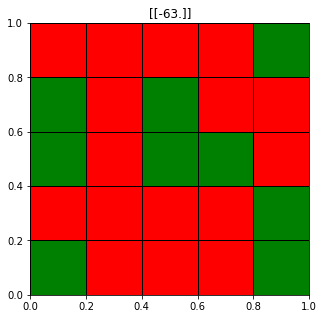

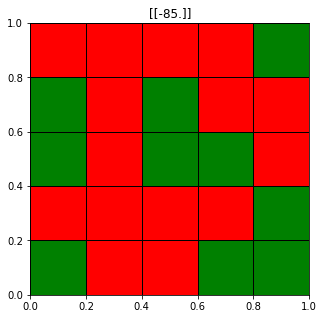

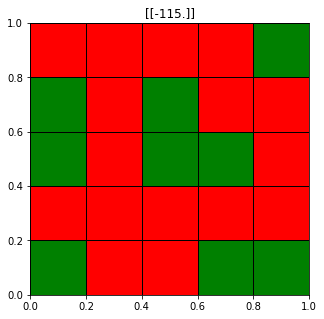

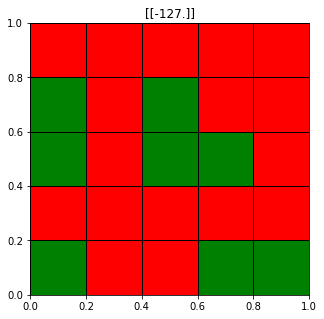

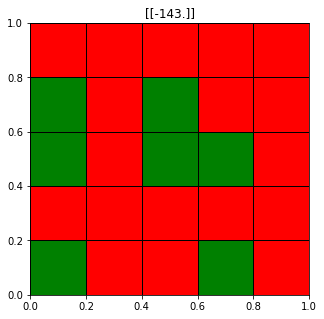

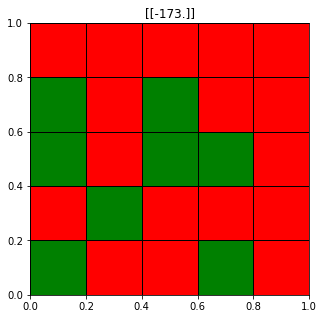

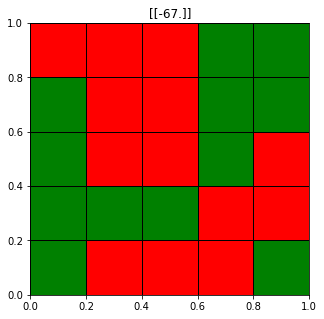

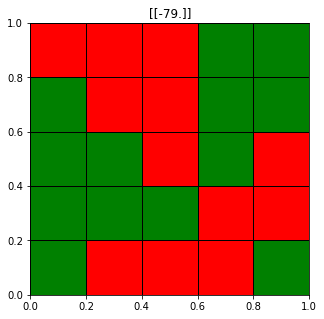

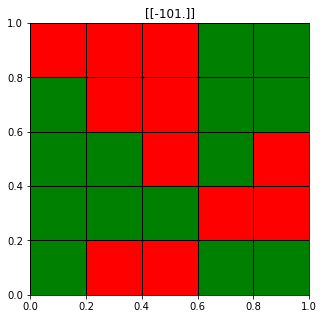

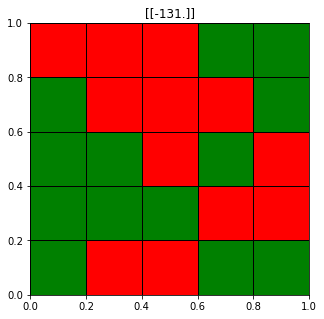

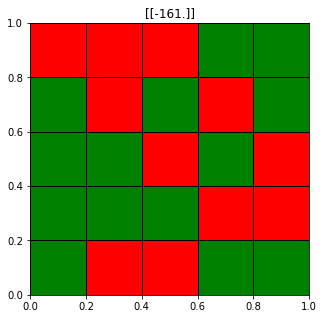

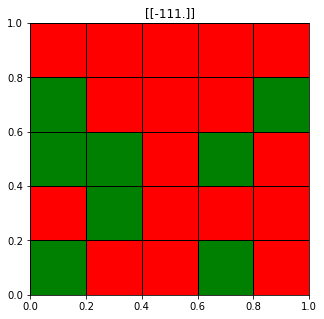

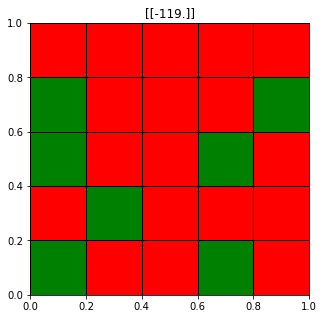

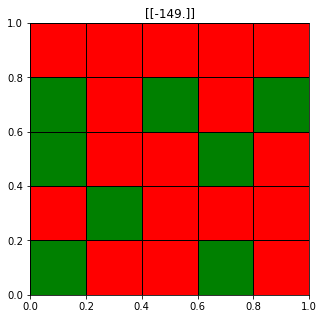

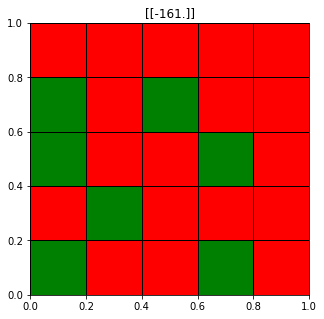

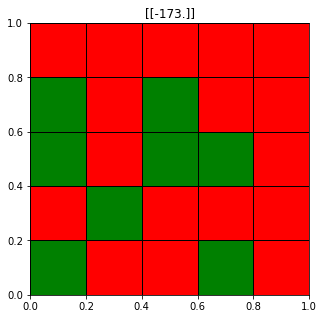

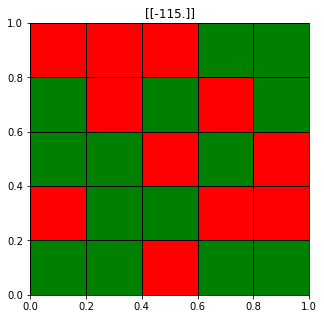

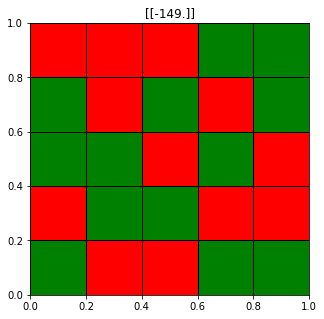

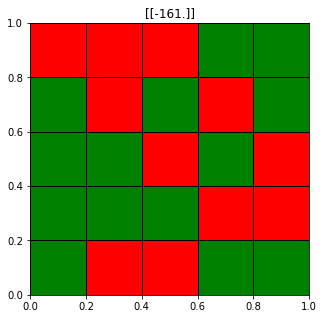

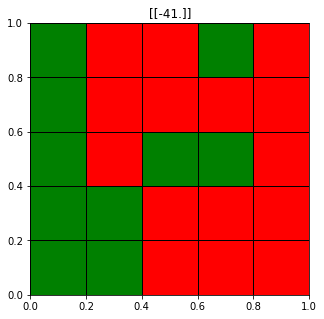

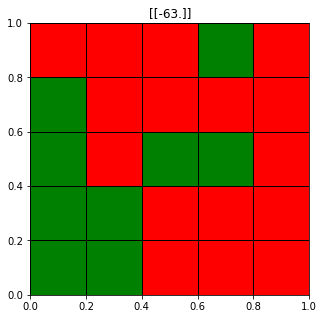

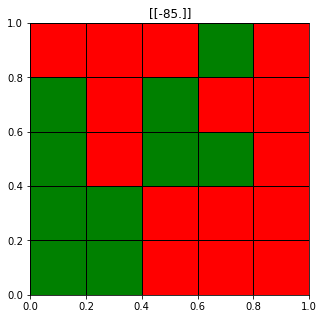

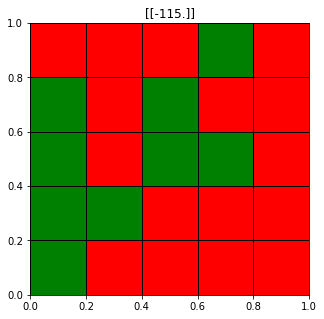

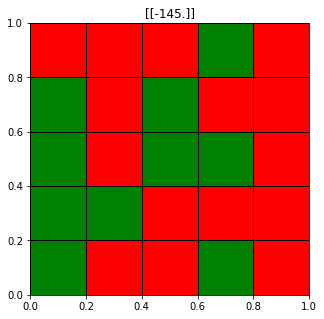

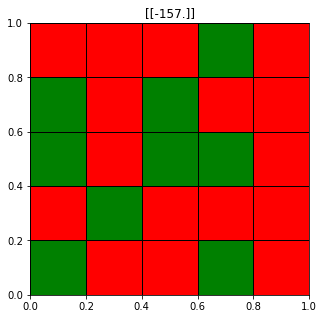

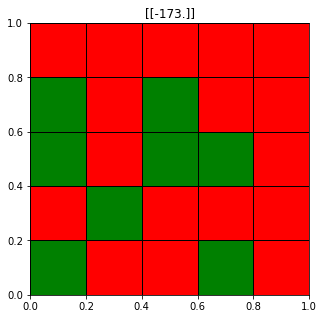

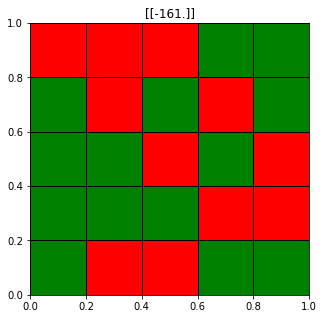

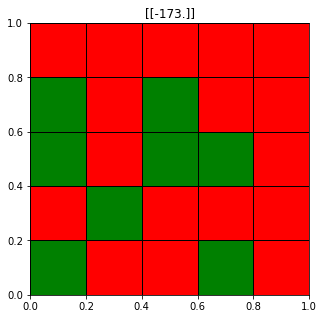

In [24]:
noise_rate=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case2_1.x_input(date_noise)
        network_case2_1.show()
    
        times=0
        ex_V=np.copy(network_case2_1.V)
        while True:
            network_case2_1.update()
            if ex_V!=network_case2_1.V:
                network_case2_1.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case2_1.V)
        
            if times>50:
                break
            
        score=np.where(network_case2_1.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*11)*100,"%")

In [25]:
N=25
Q=4
network_case2_2=HopfieldNetwork(N,Q)
network_case2_2.learn(data_matrix[:,:4])

Noise: 0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 30.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 40.0 %
0 番目のデータ
(25, 1)
正解率: 68.0 %
                        
1 番目のデータ
(25, 1)
正解率: 68.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
3 番目のデータ
(25, 1)
正解率: 60.0 %
                        
------------------------------
Noise: 50.0 %
0 番目のデータ
(25, 1)
正解率: 68.0 %
                        
1 番目のデータ
(25, 1)
正解率: 52.0 %
                        
2 番目のデータ
(25, 1)
正解率: 52.0 %
                        
3 番目のデータ
(25, 1)
正解率: 52.0 %
                        
------------------------------
Noise: 60.0 %
0 番目のデータ
(25

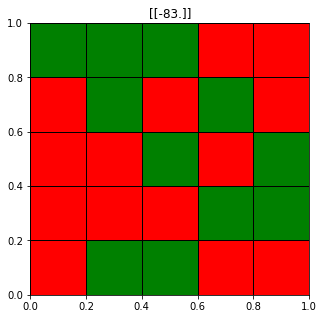

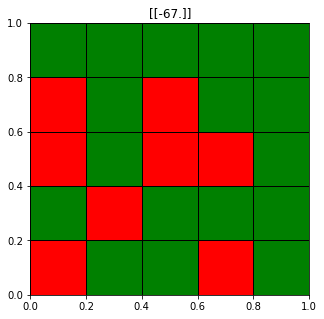

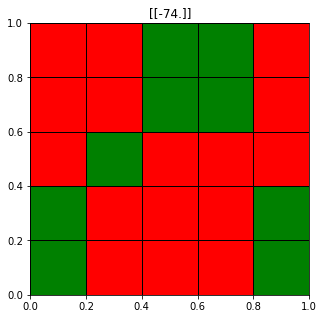

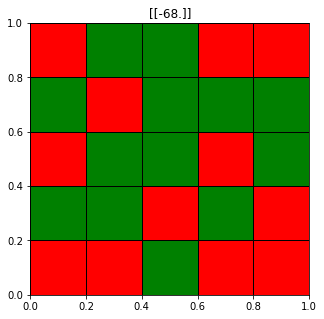

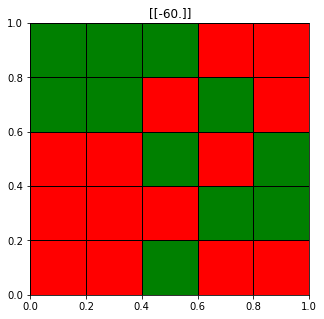

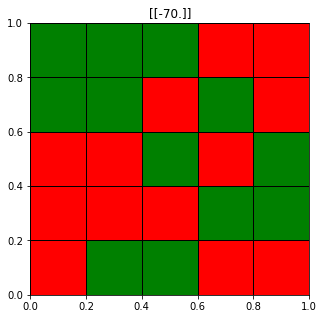

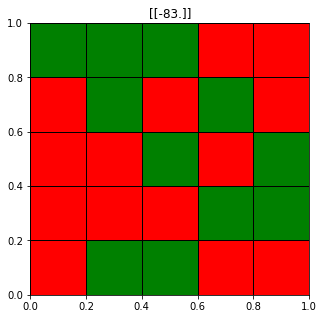

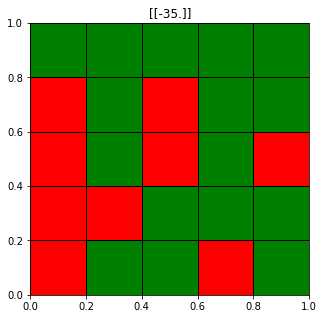

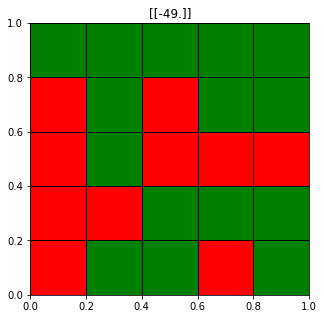

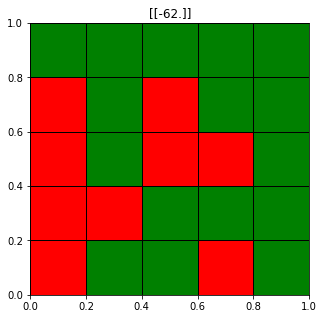

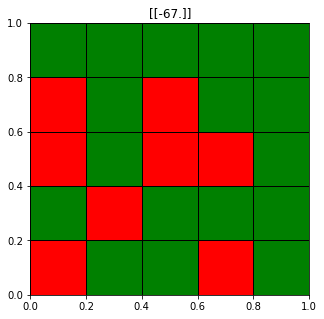

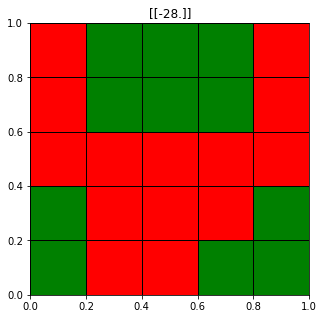

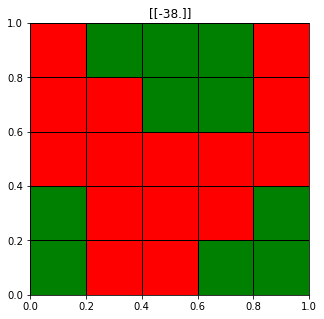

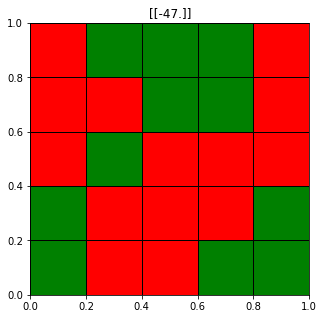

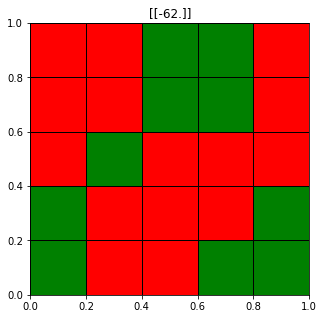

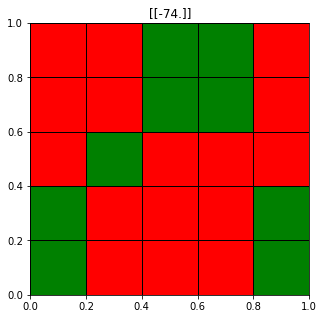

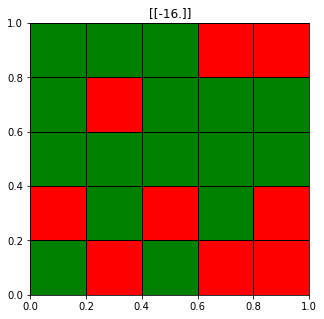

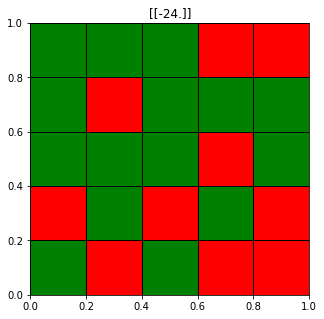

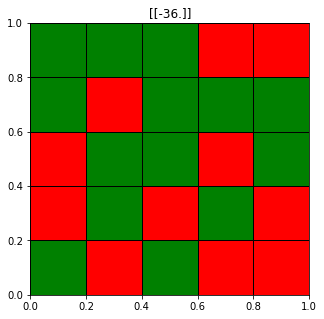

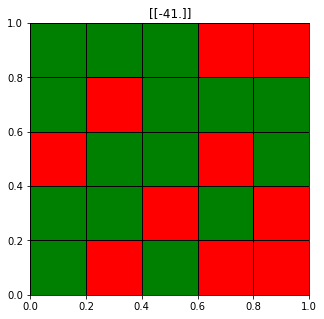

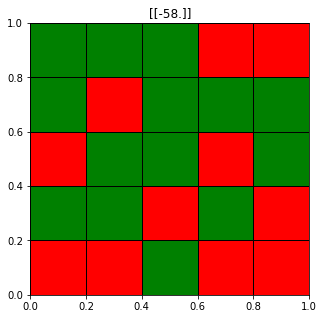

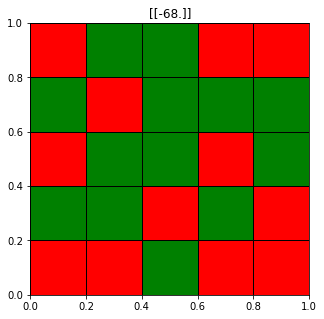

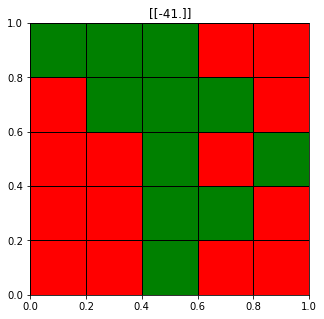

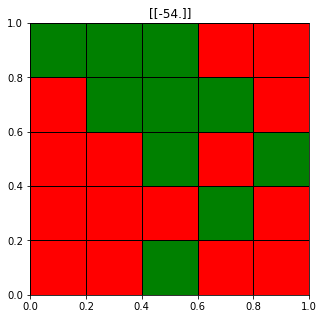

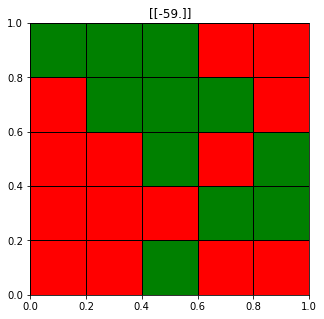

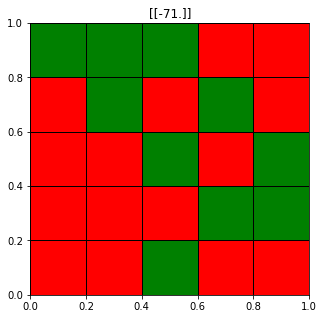

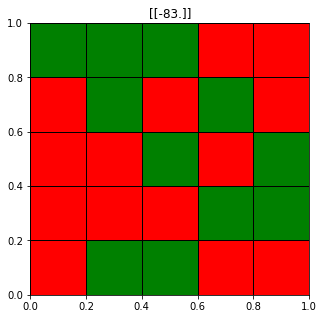

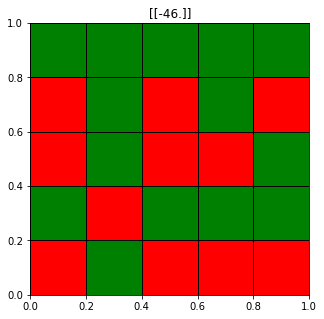

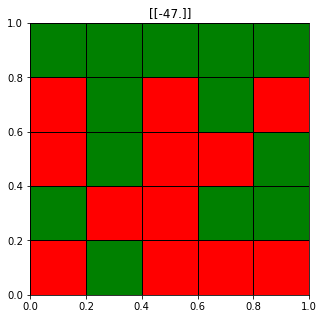

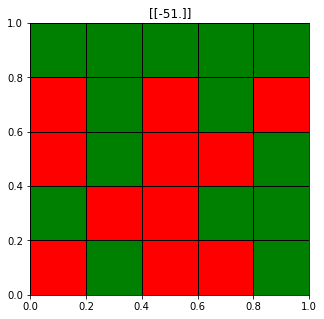

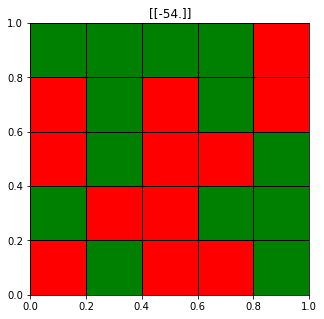

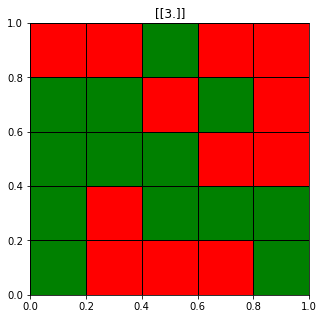

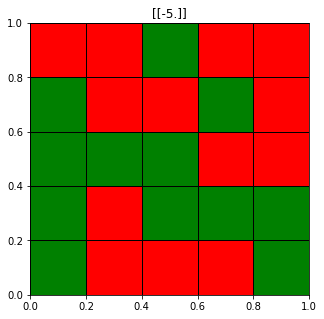

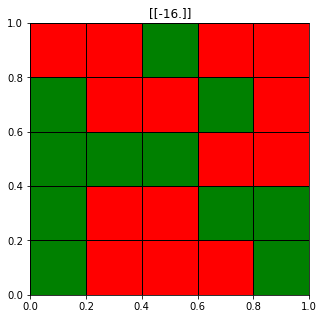

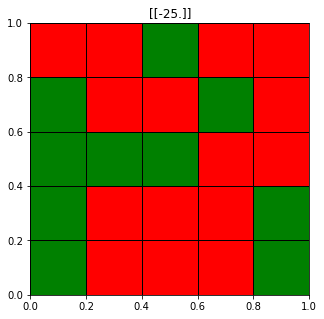

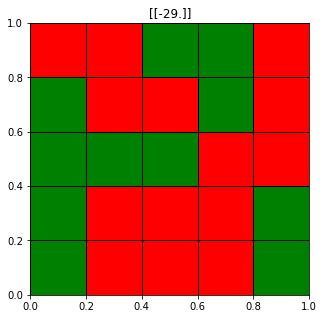

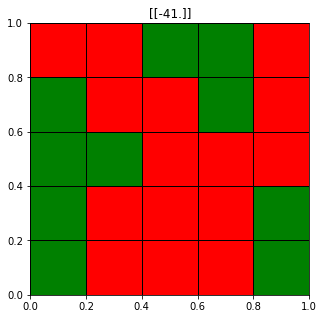

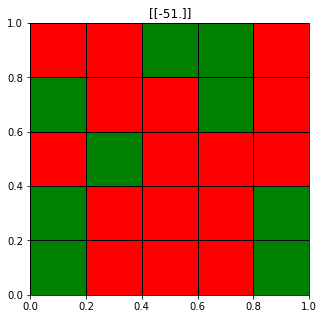

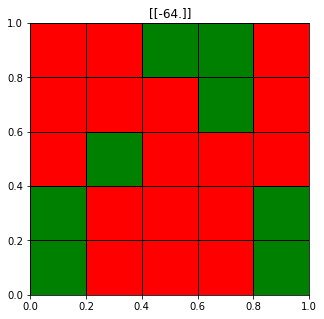

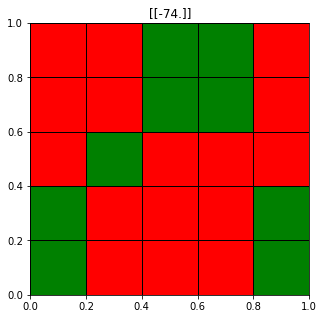

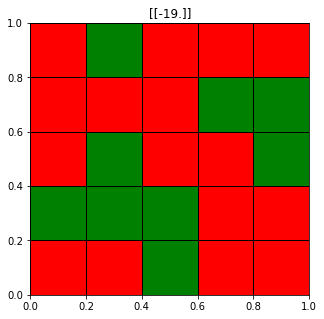

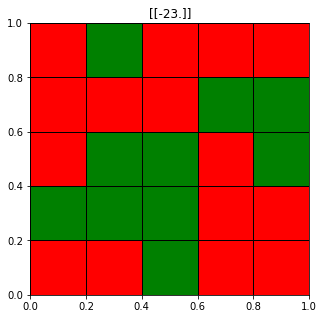

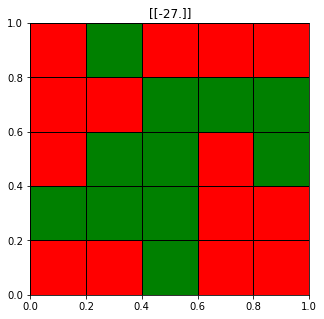

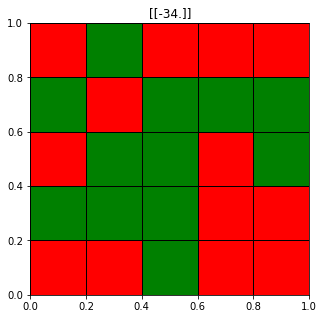

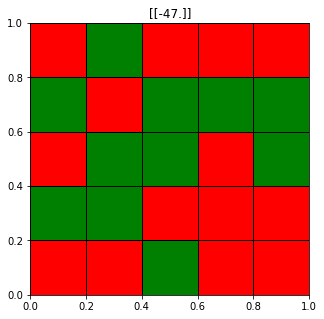

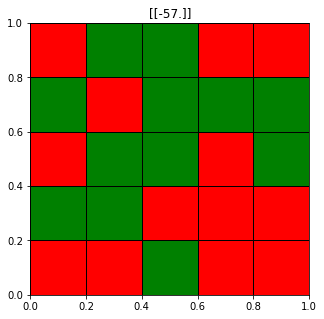

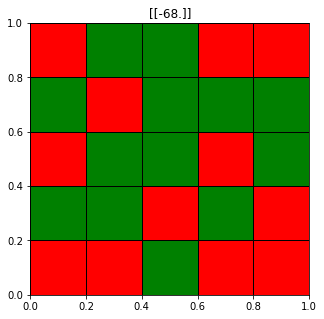

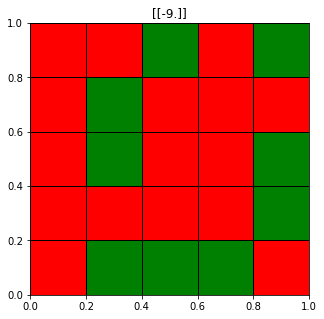

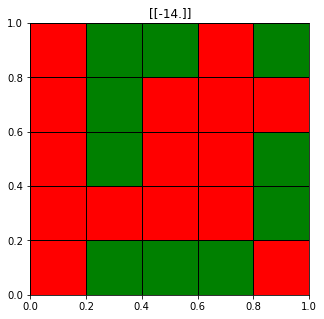

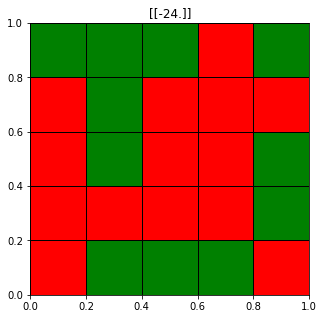

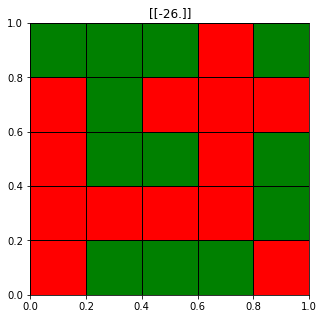

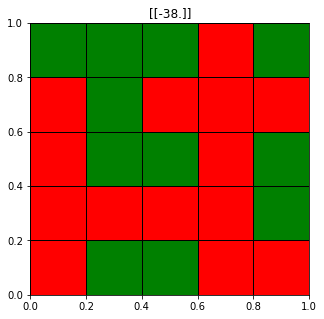

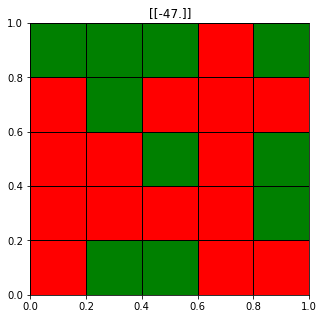

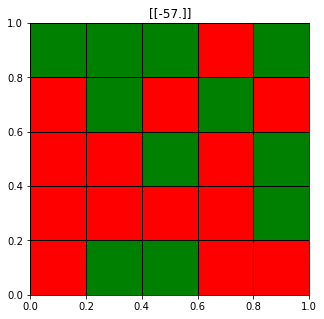

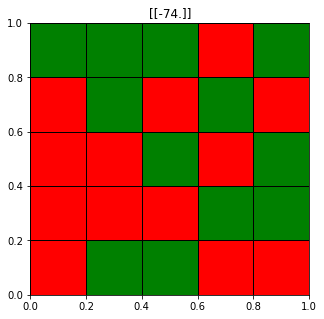

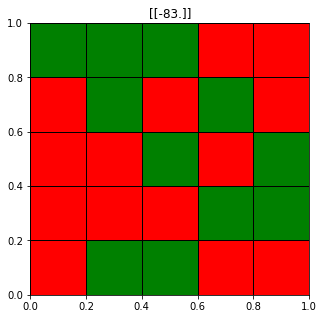

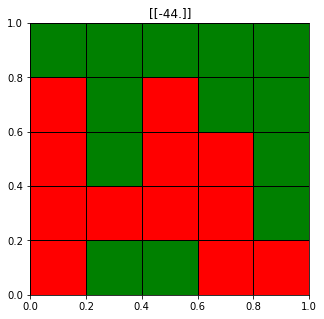

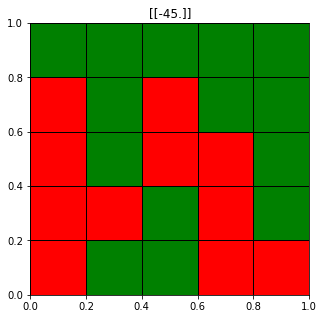

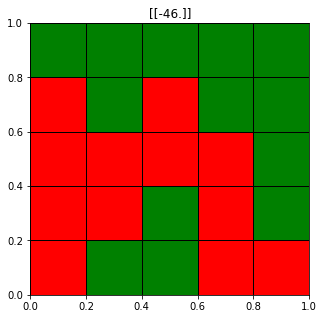

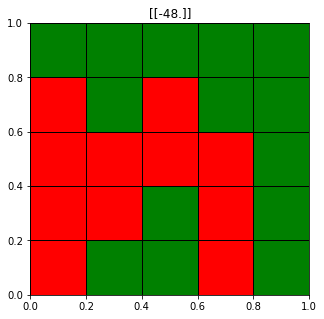

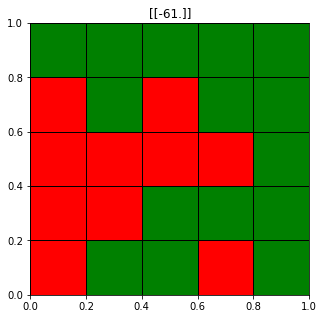

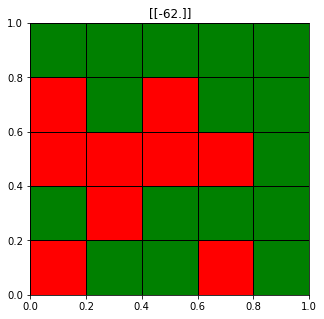

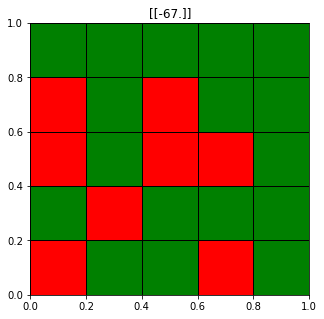

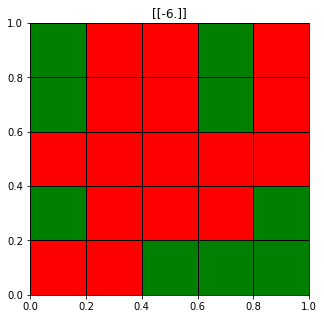

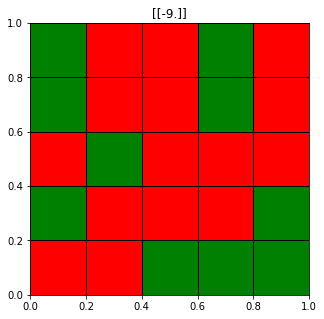

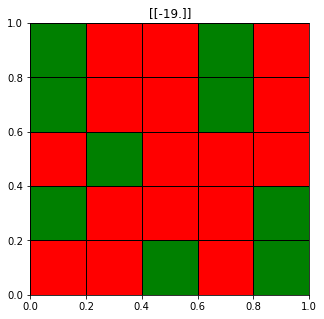

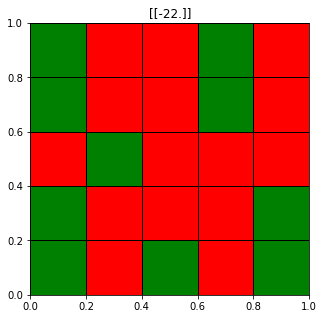

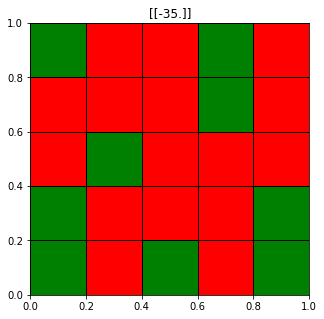

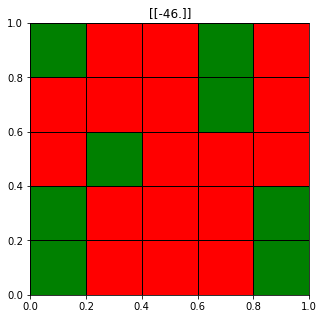

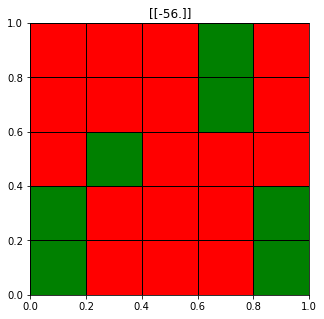

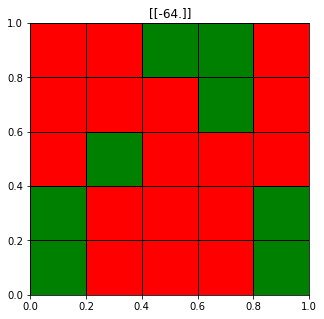

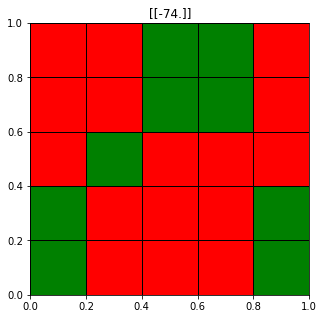

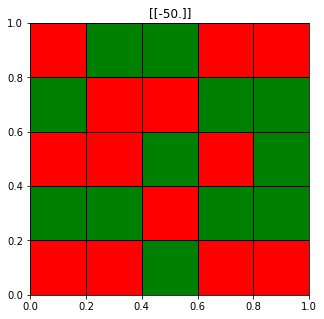

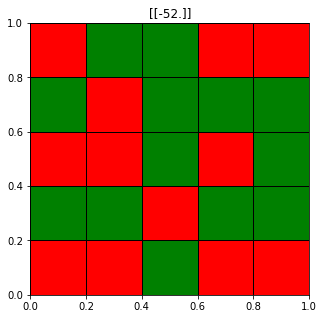

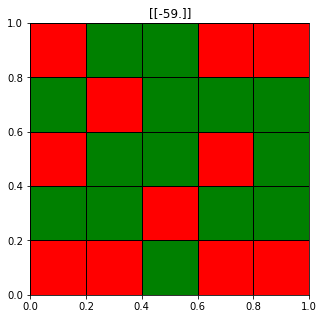

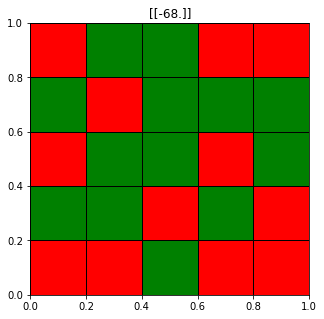

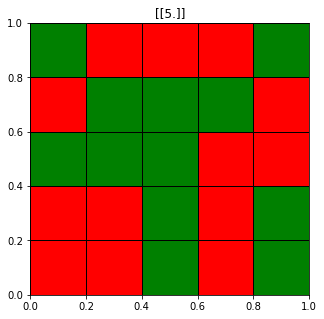

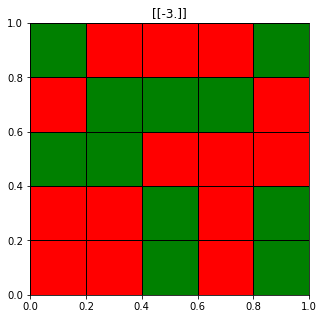

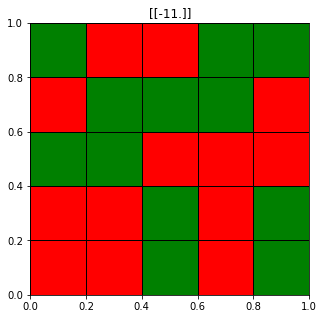

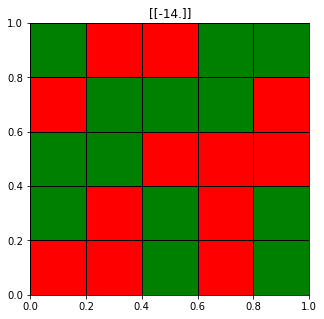

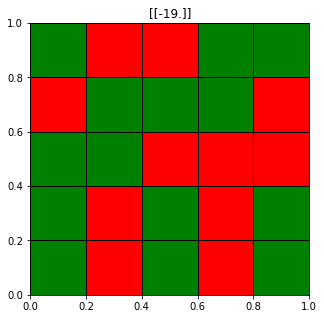

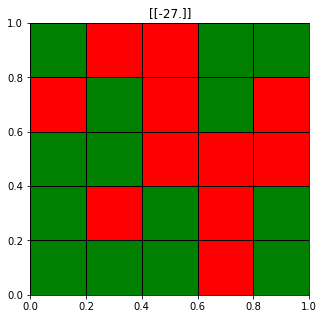

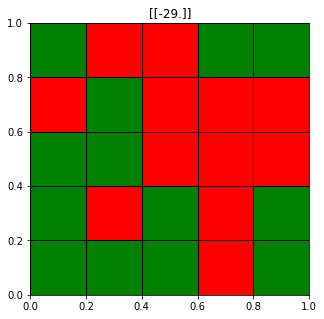

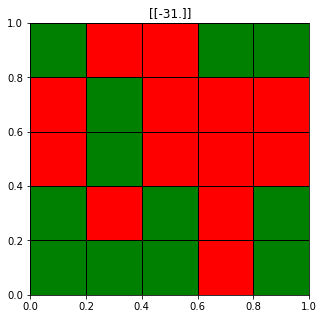

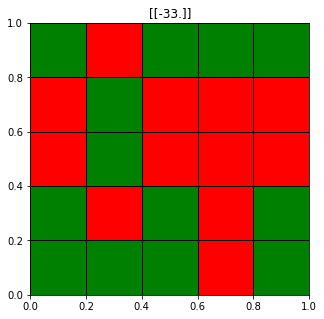

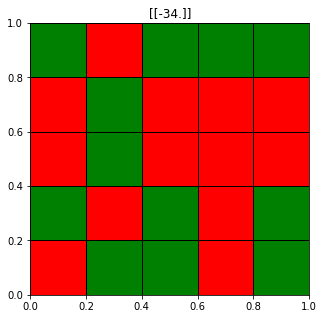

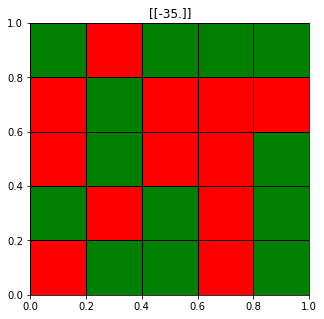

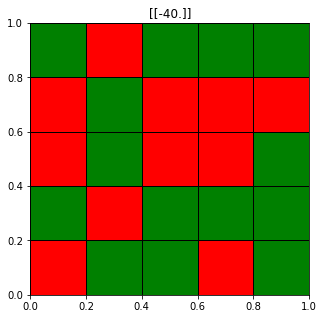

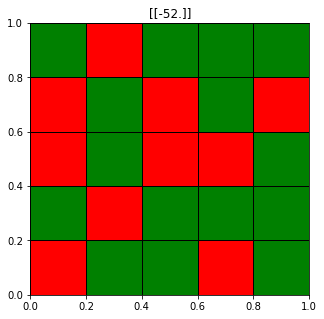

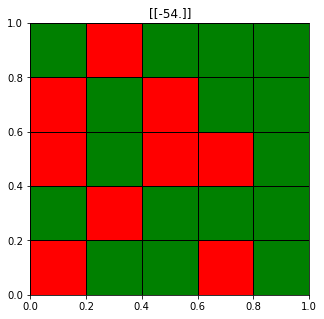

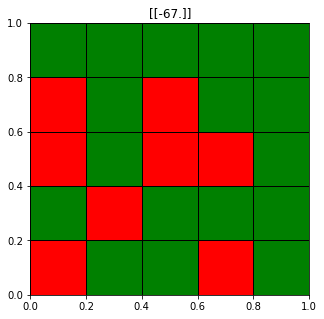

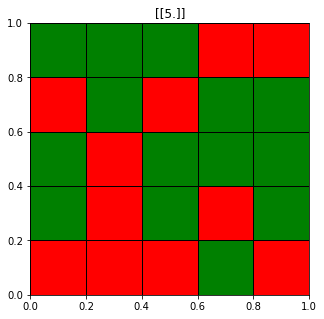

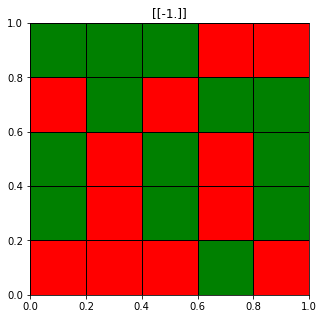

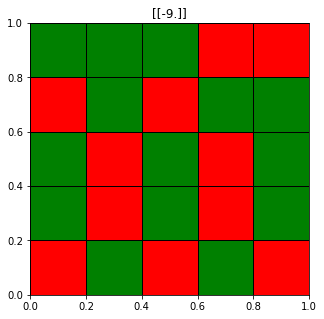

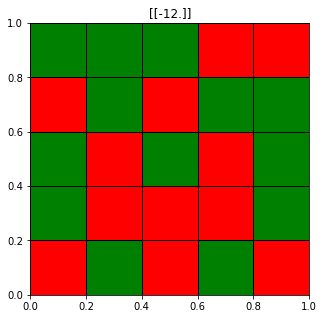

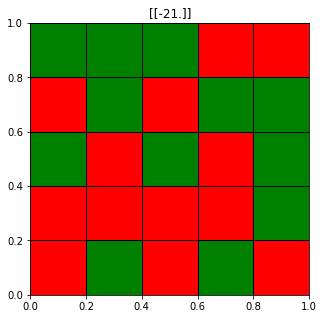

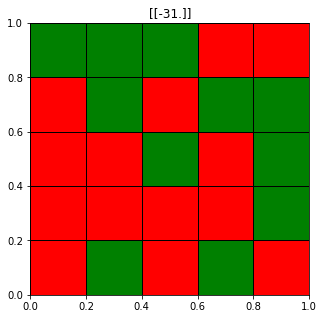

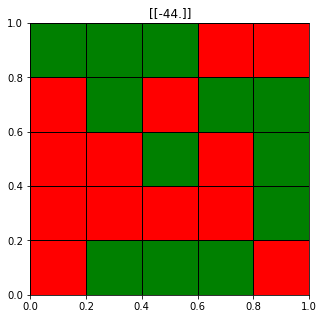

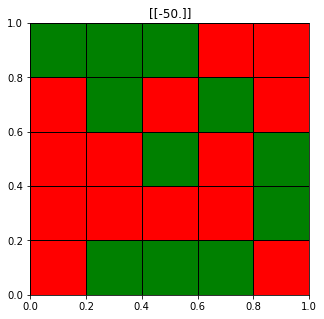

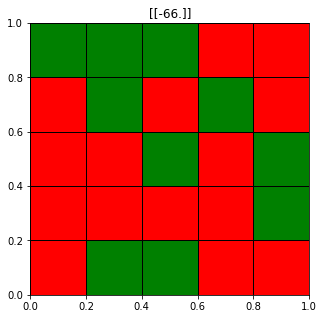

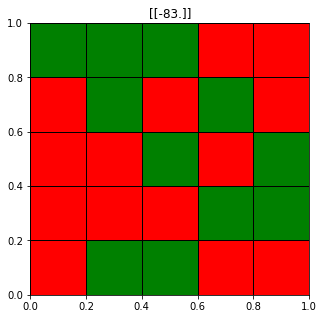

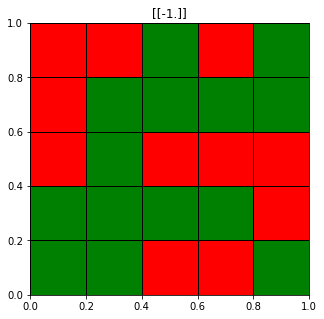

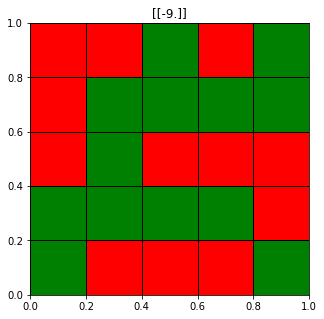

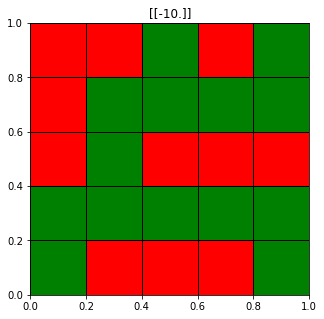

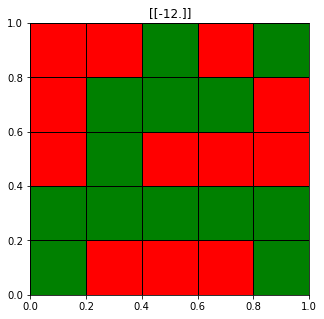

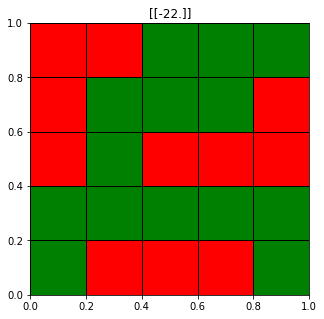

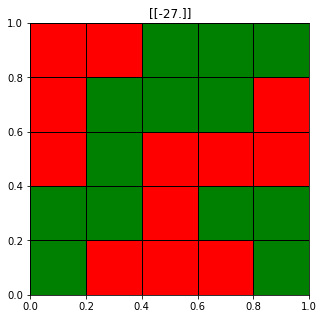

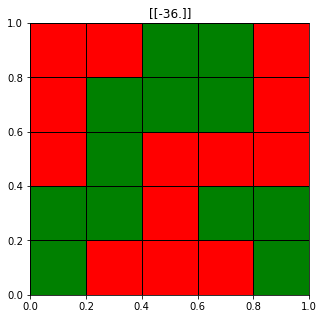

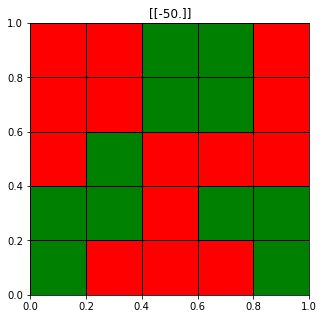

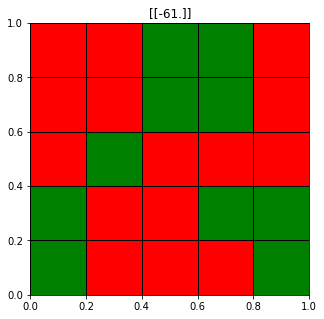

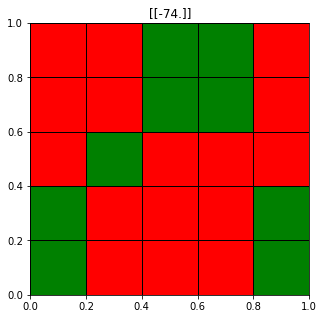

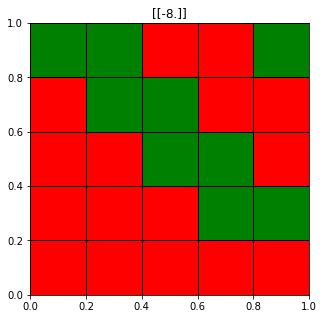

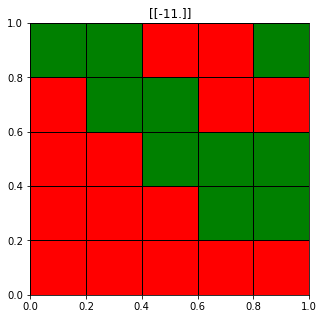

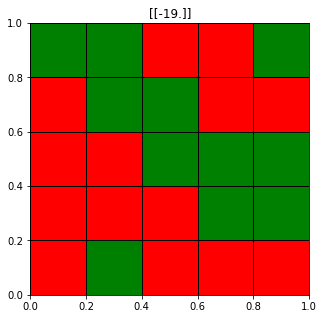

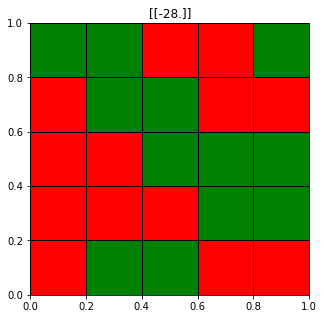

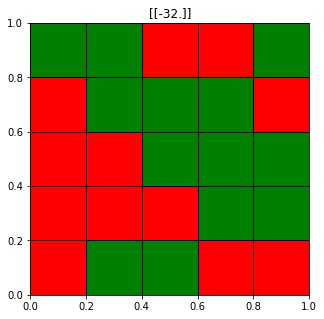

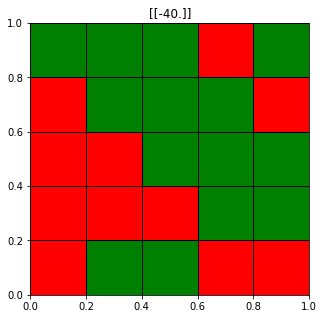

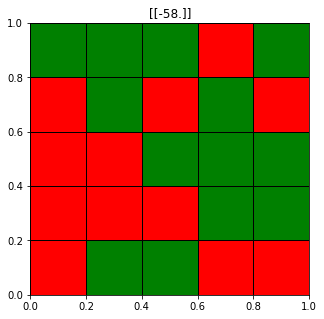

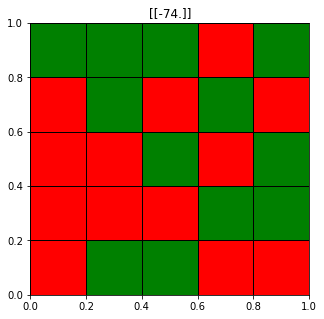

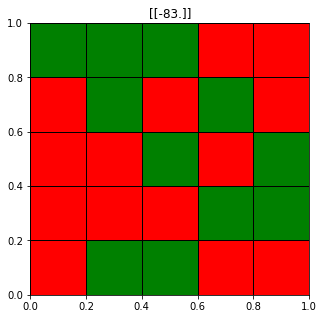

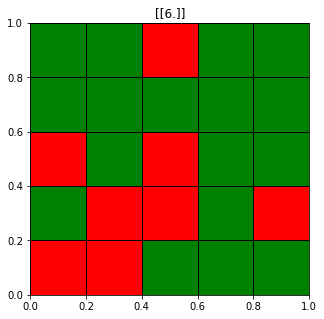

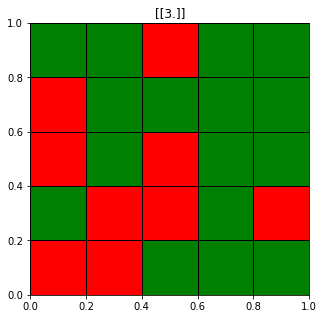

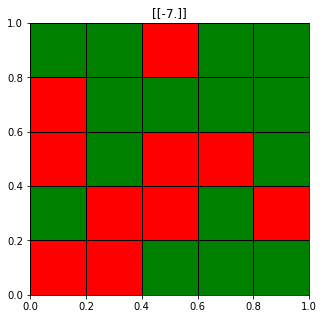

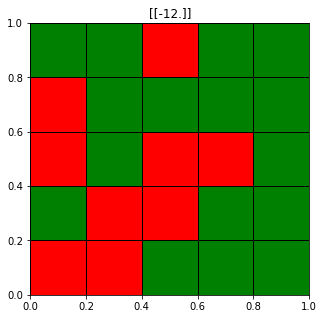

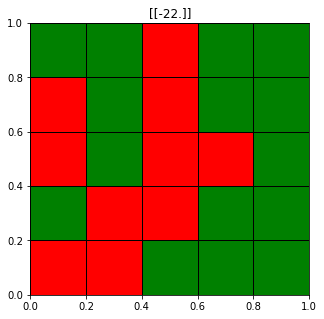

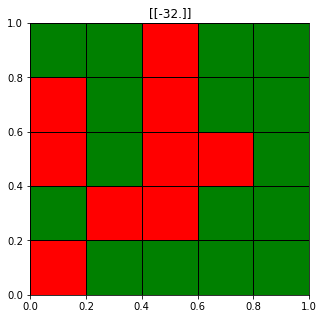

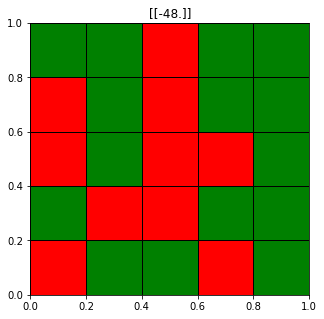

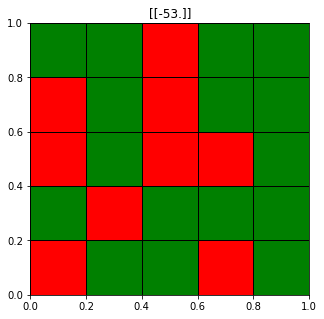

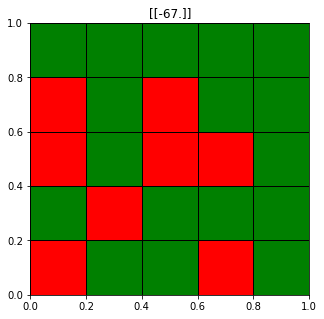

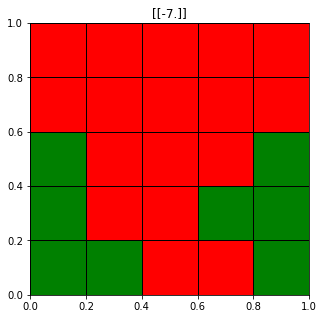

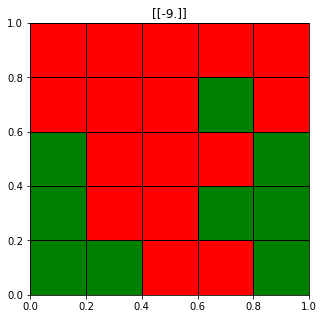

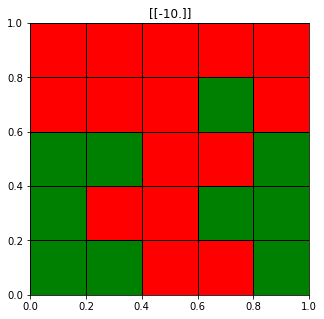

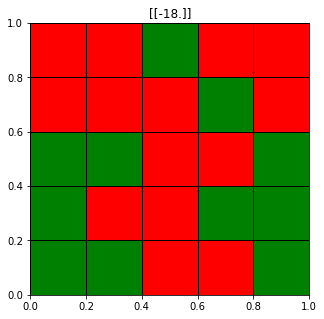

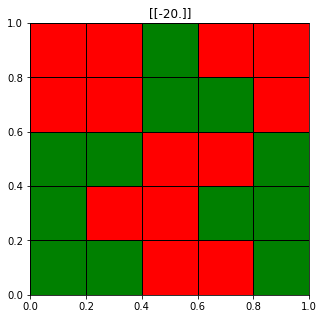

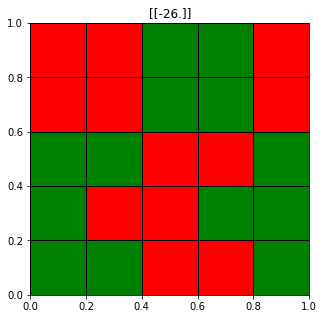

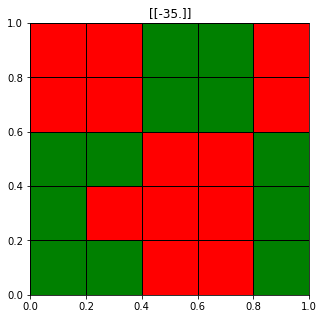

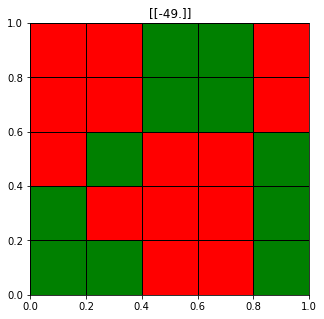

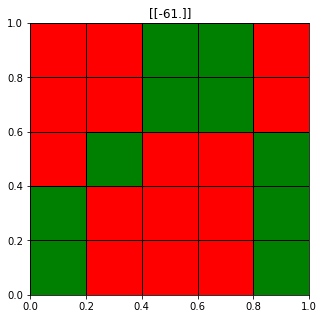

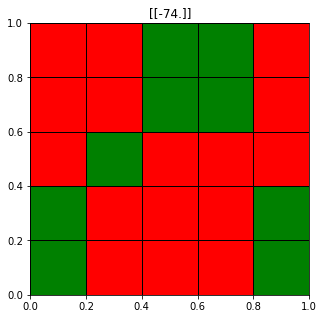

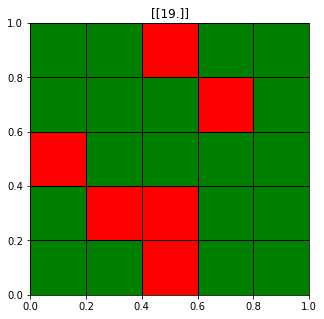

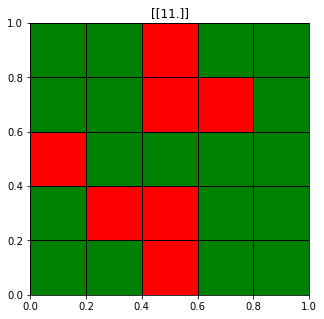

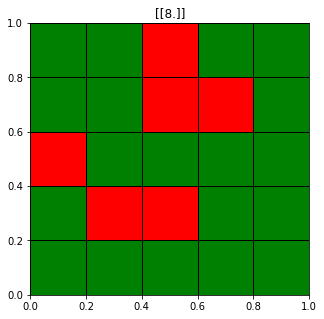

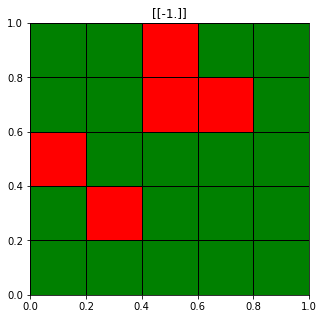

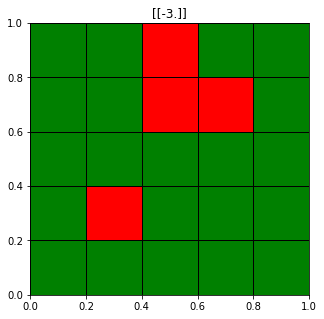

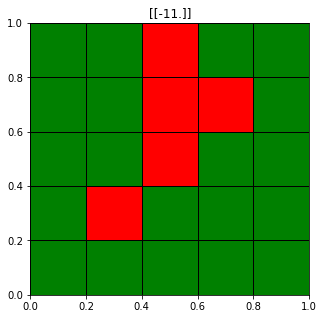

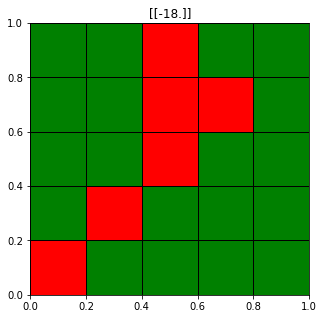

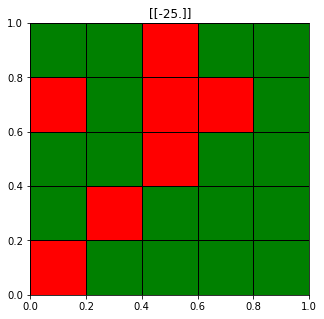

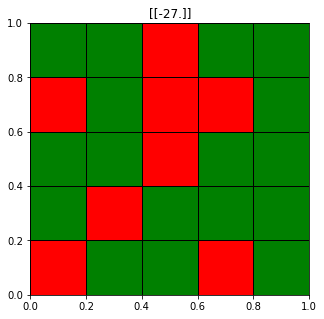

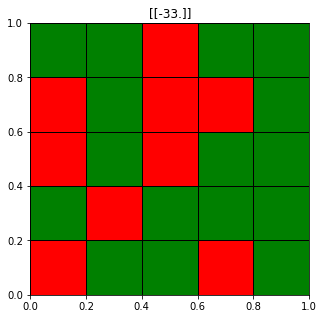

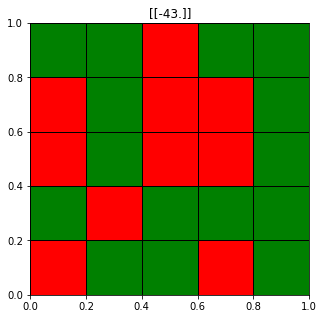

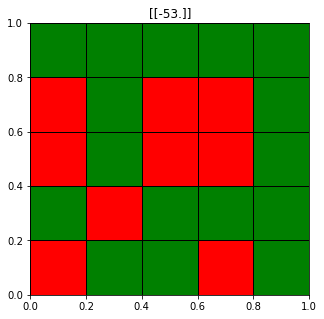

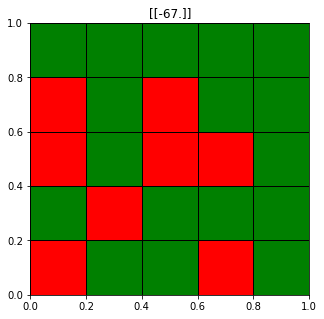

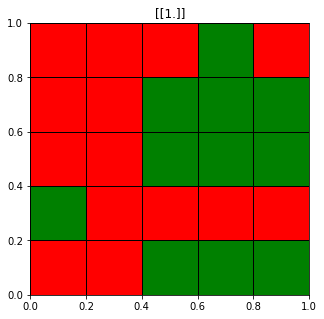

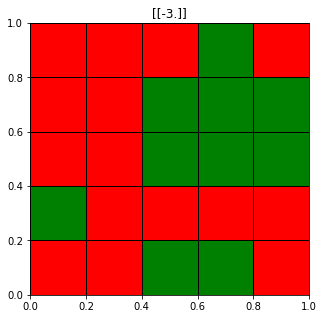

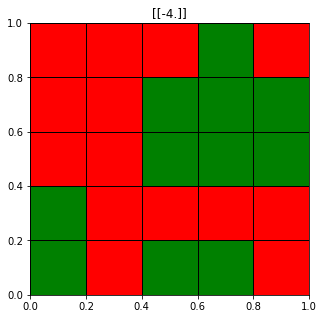

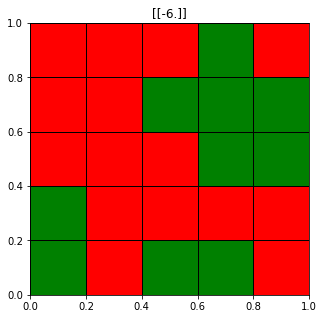

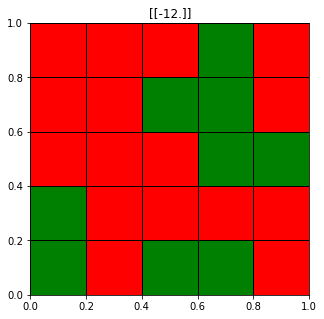

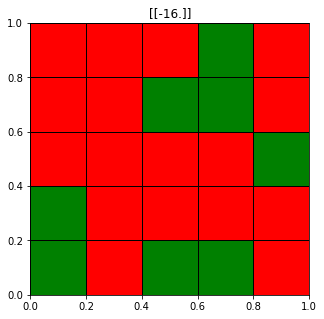

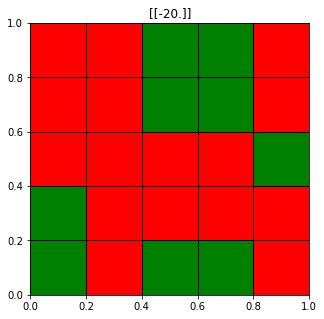

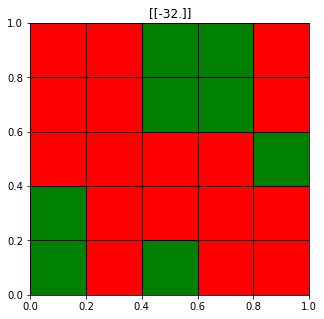

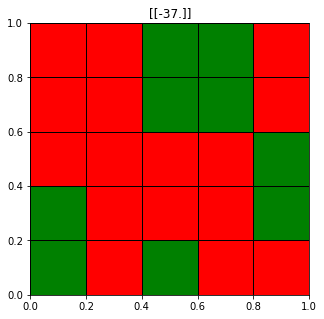

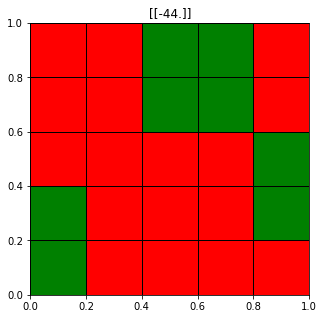

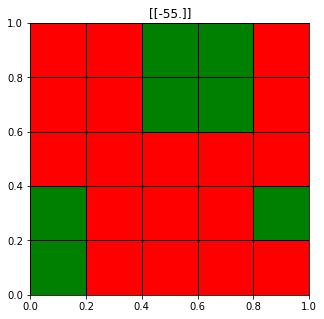

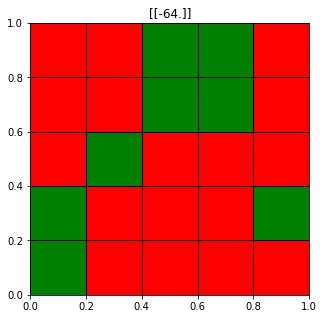

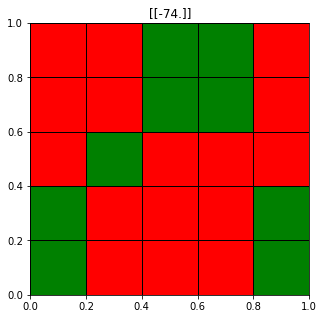

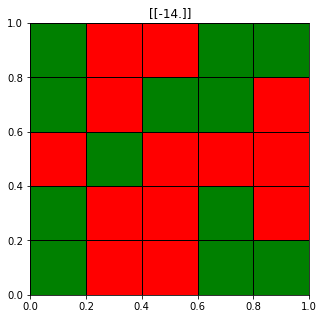

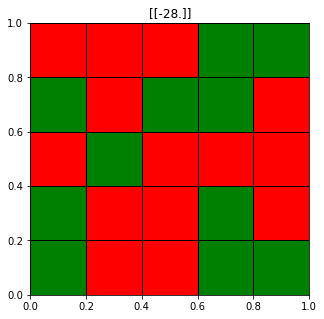

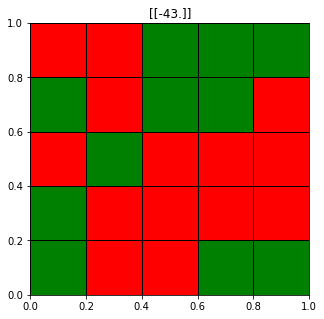

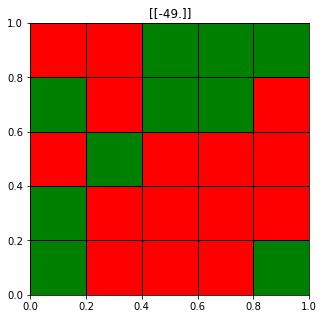

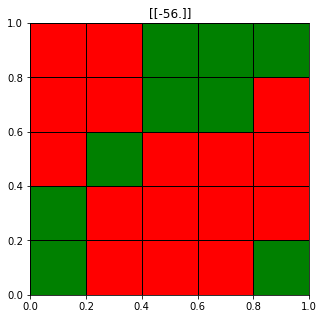

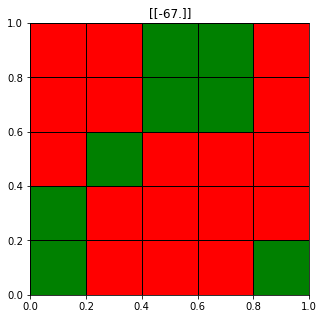

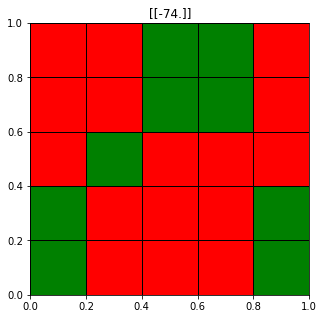

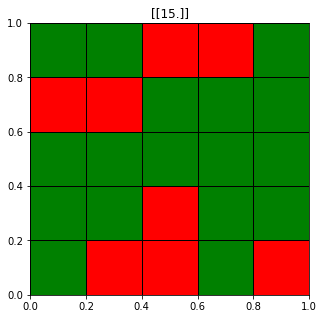

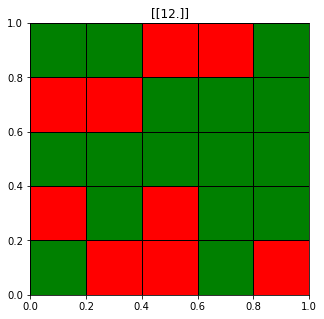

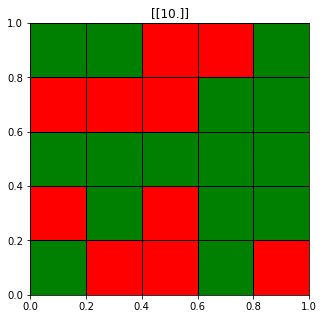

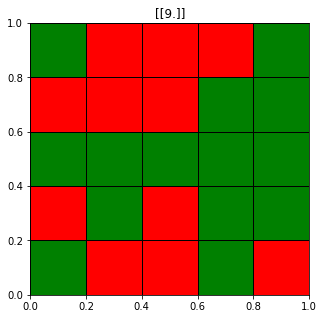

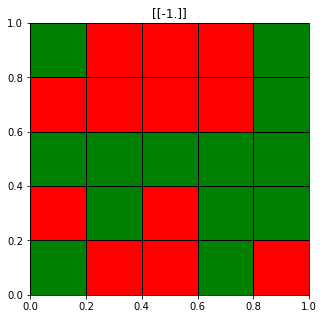

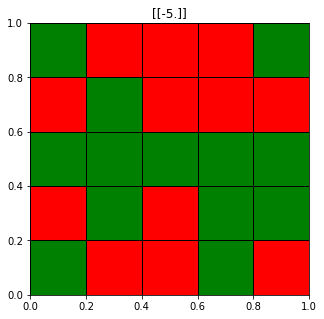

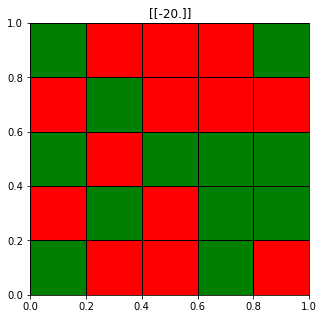

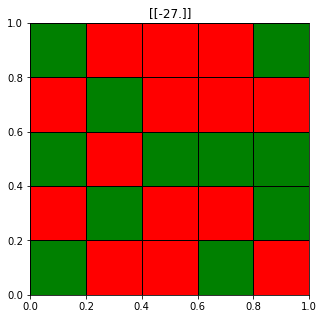

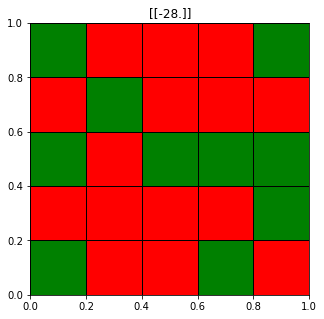

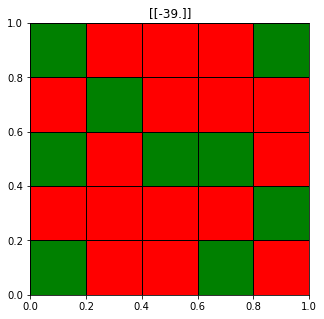

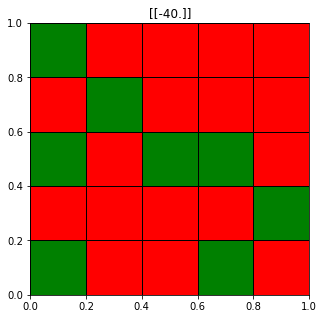

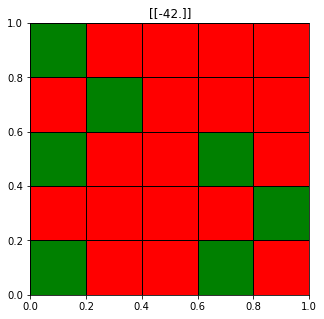

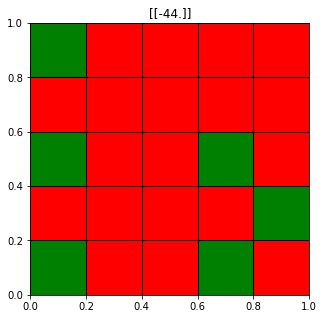

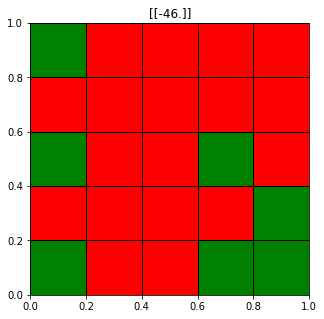

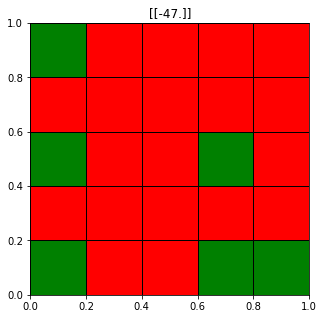

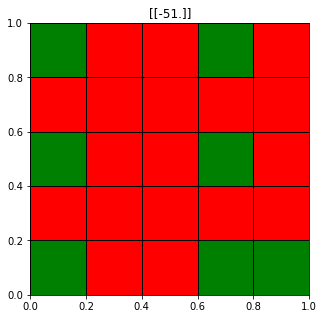

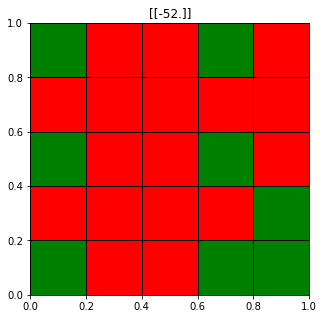

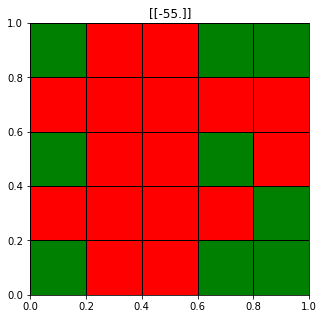

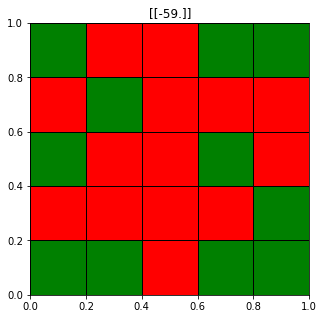

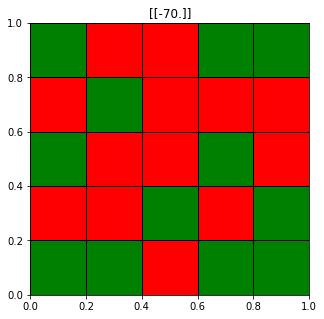

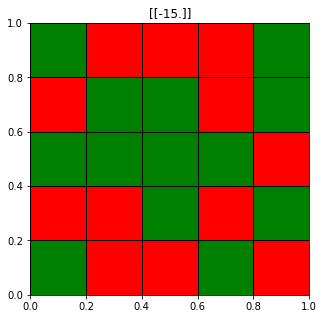

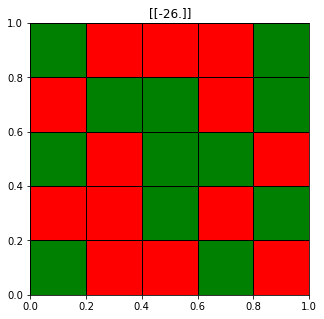

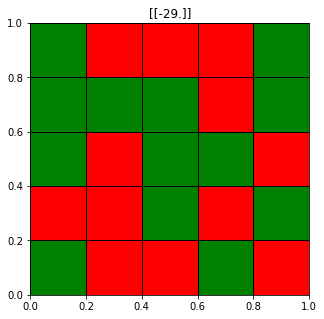

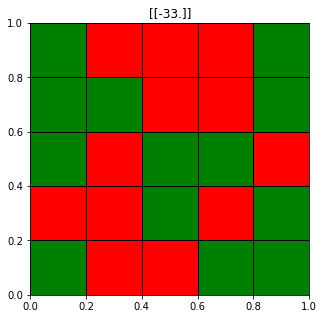

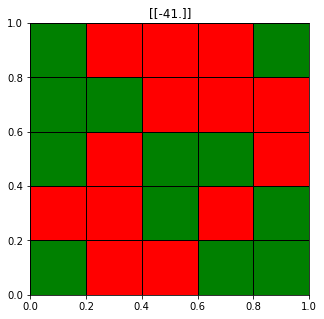

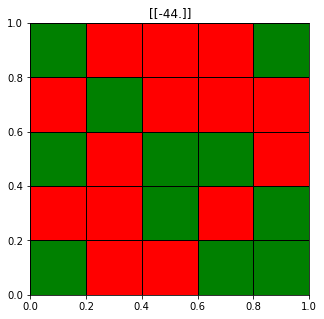

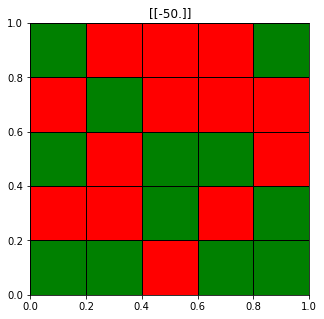

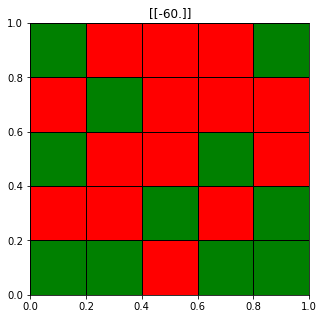

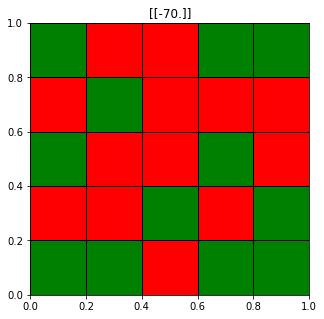

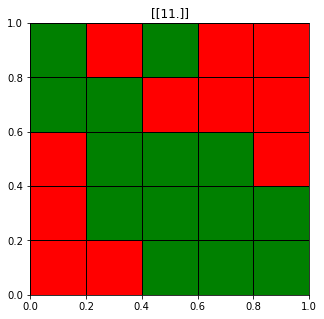

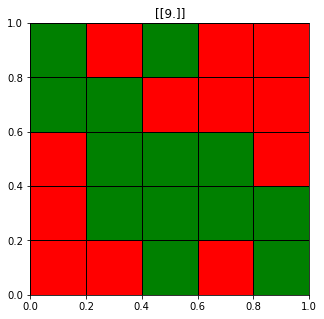

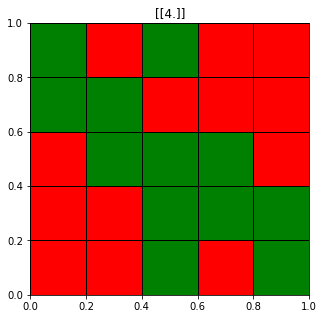

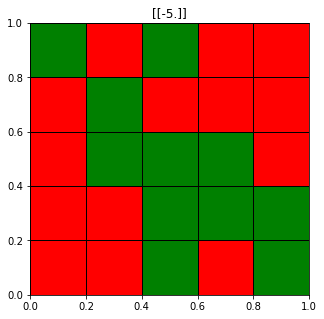

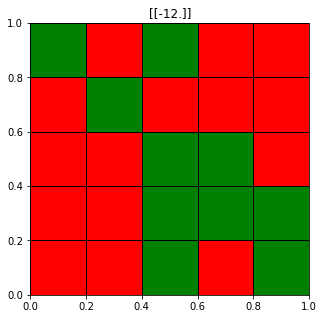

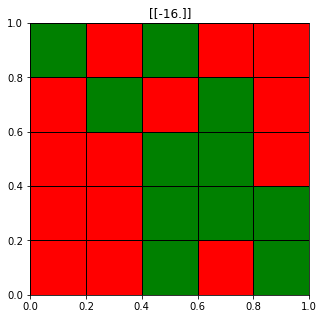

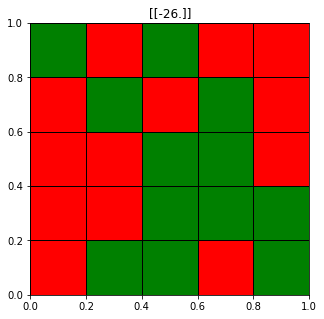

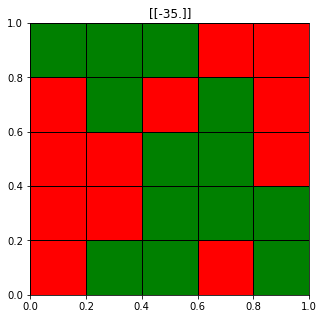

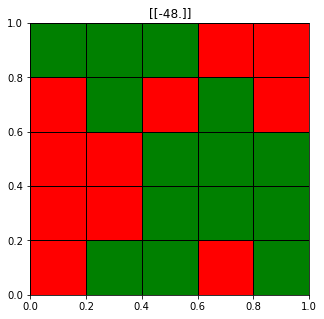

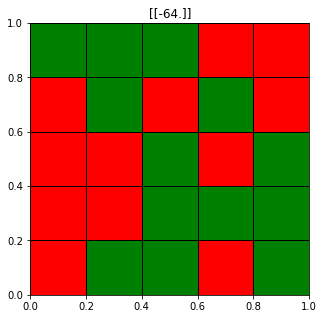

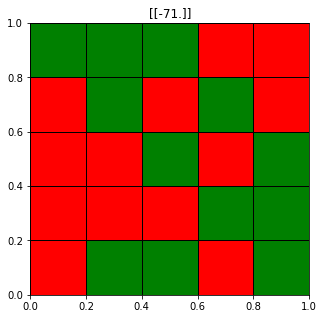

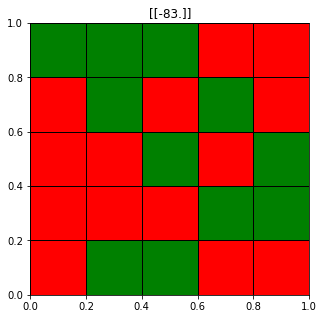

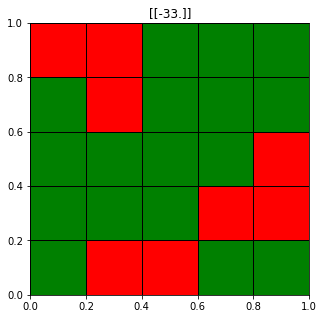

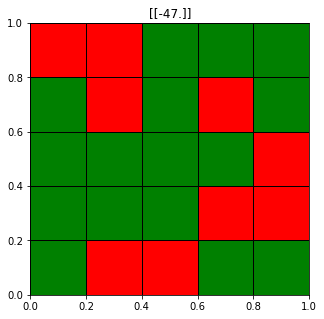

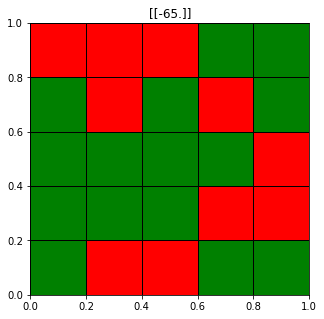

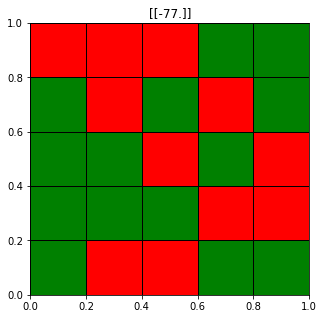

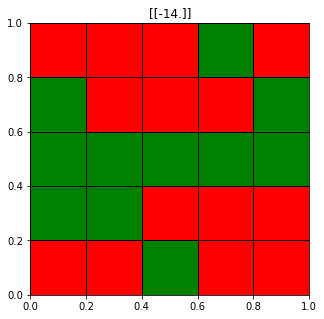

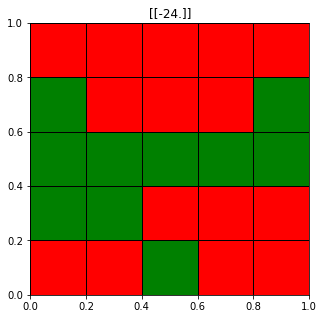

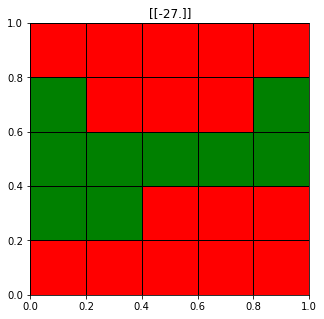

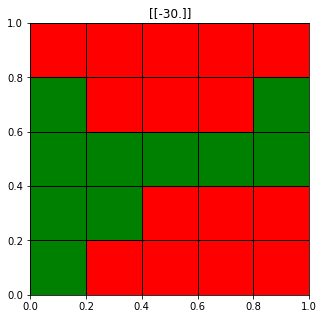

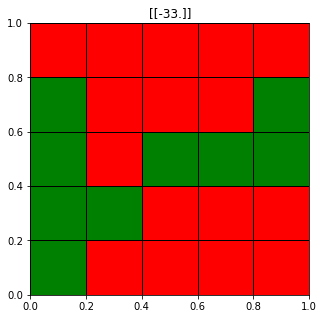

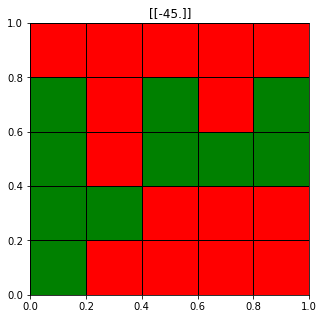

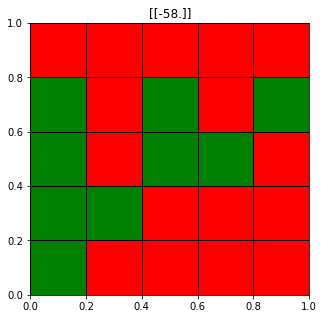

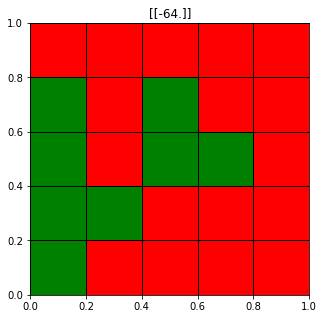

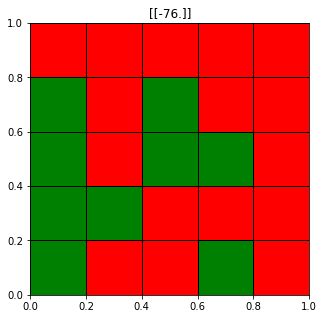

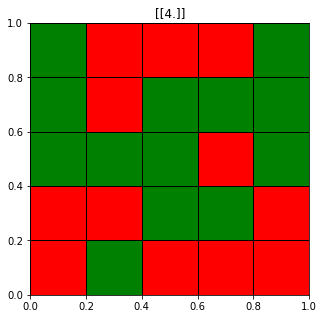

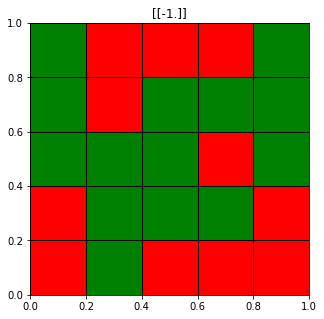

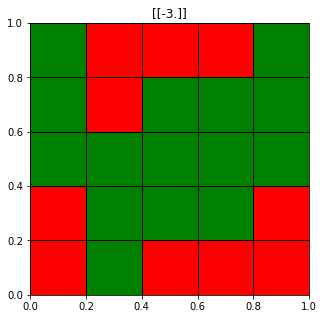

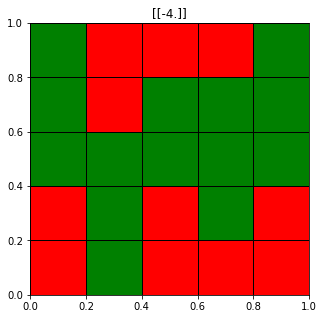

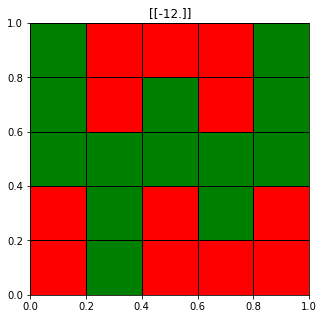

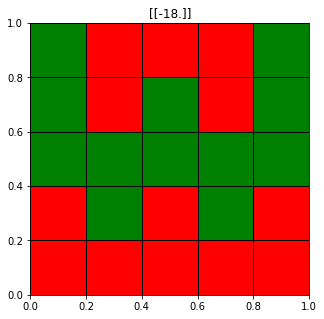

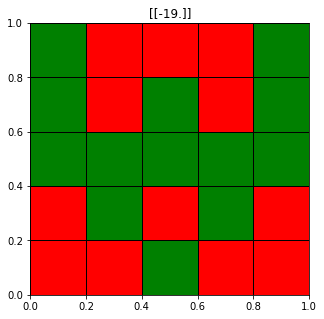

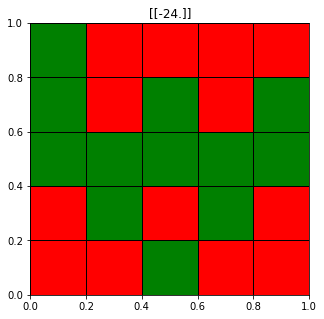

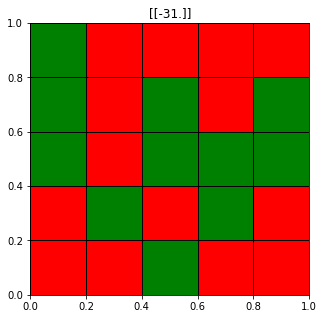

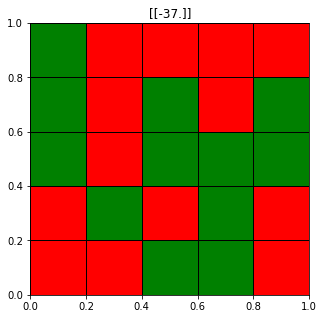

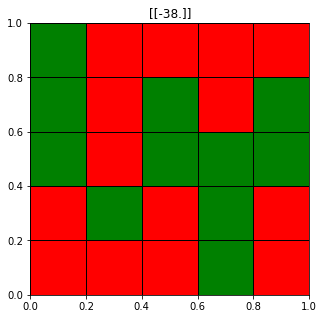

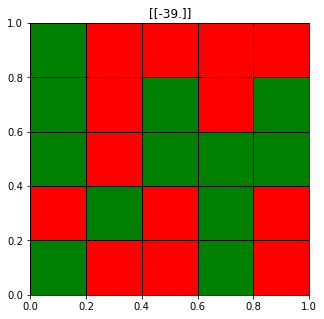

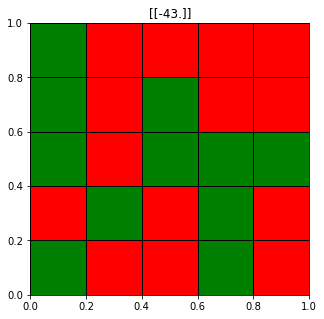

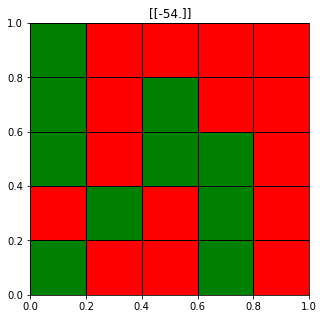

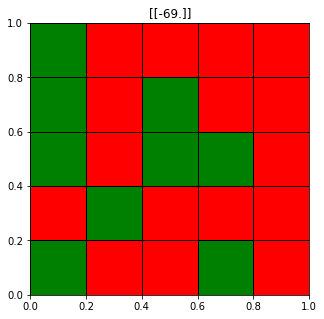

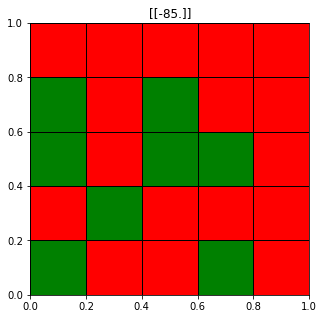

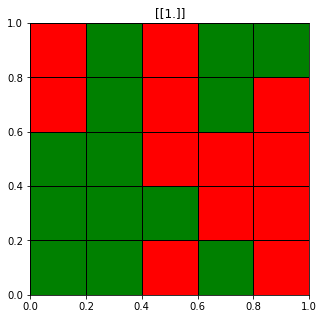

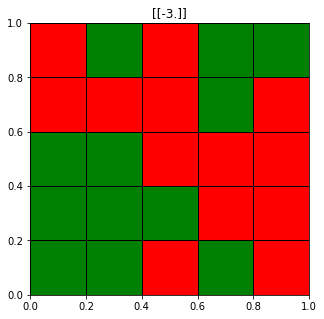

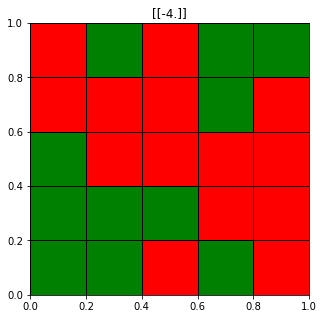

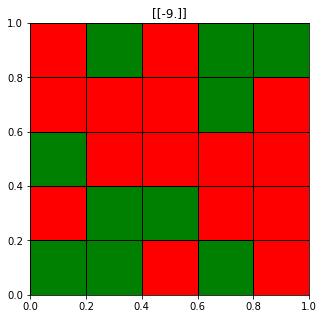

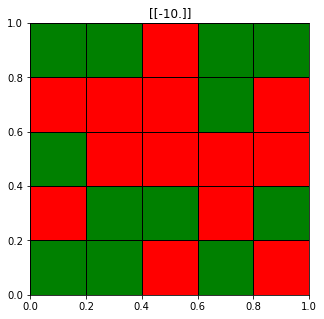

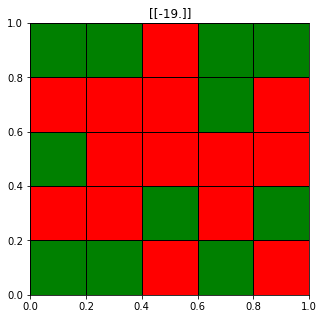

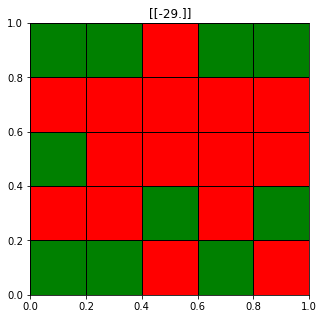

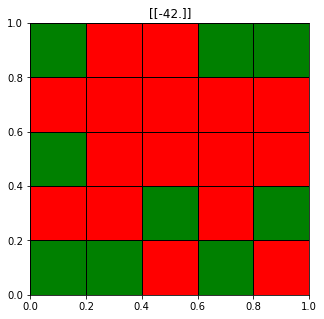

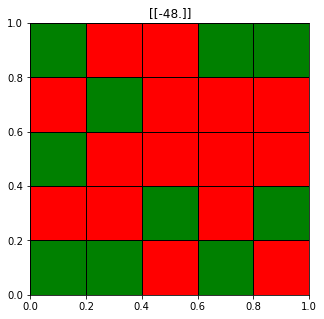

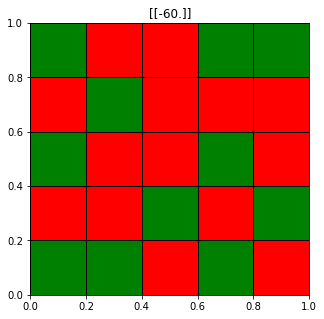

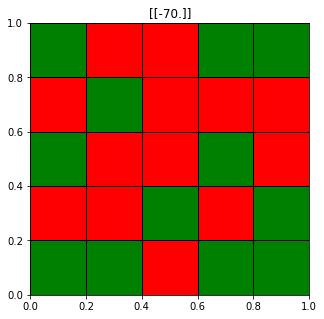

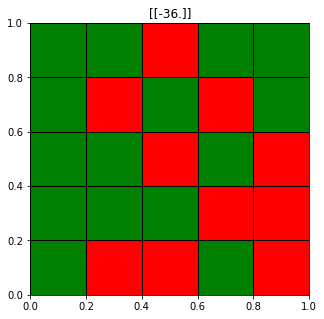

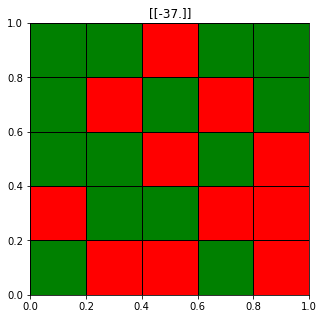

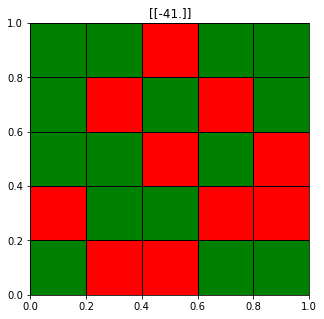

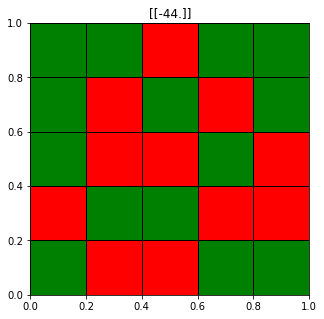

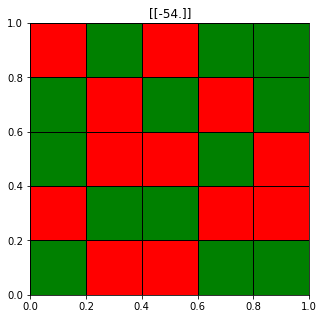

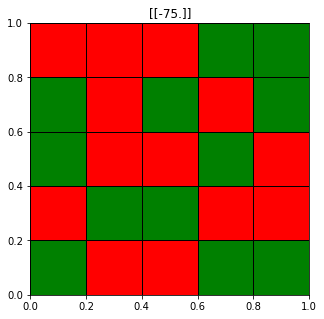

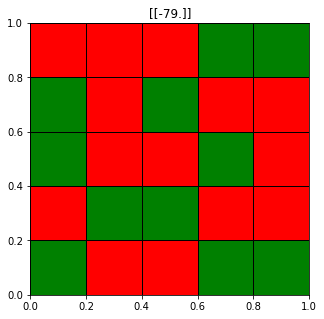

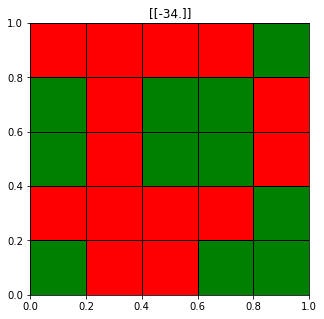

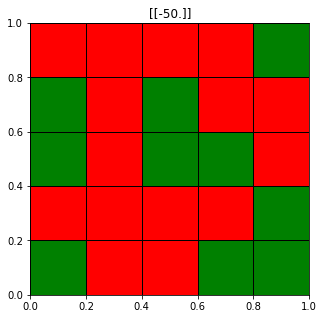

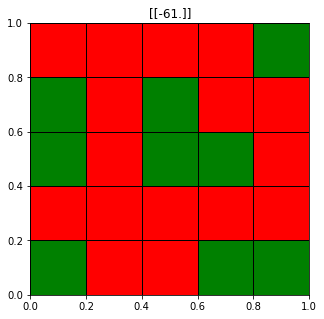

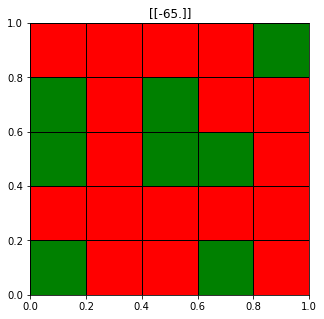

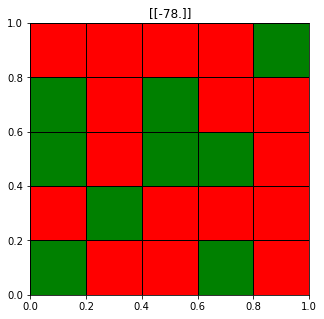

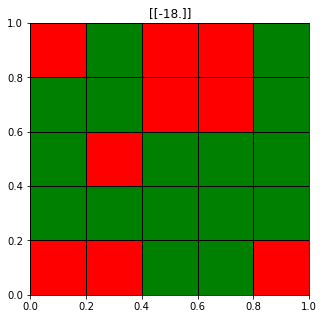

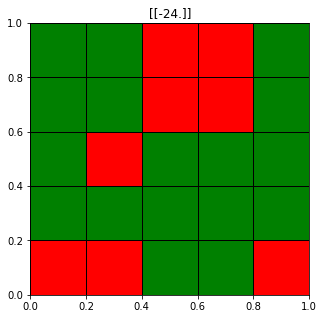

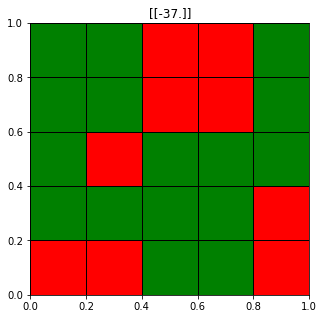

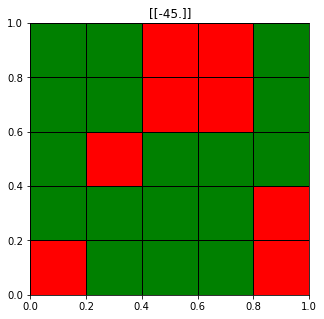

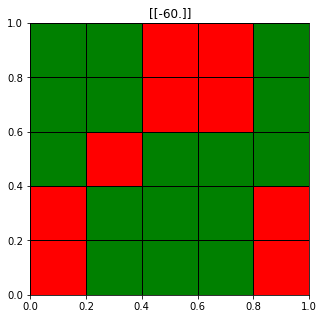

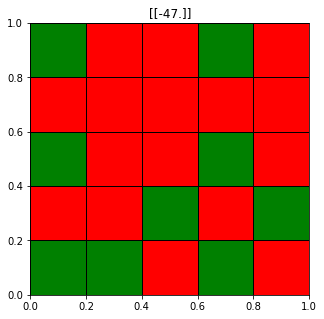

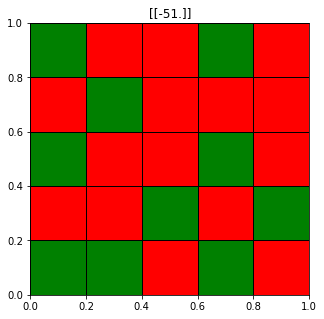

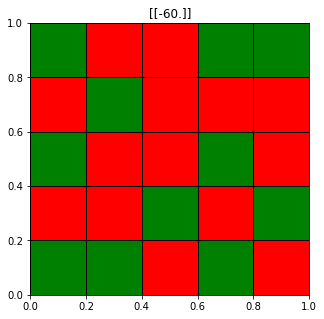

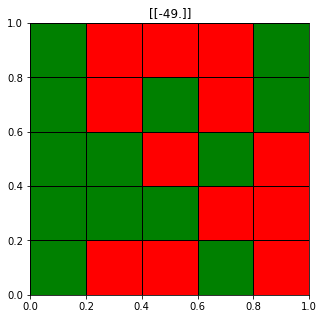

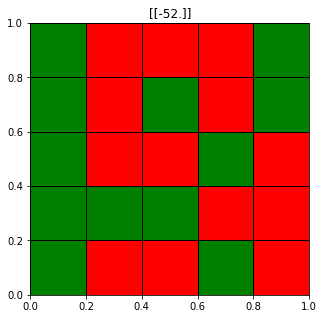

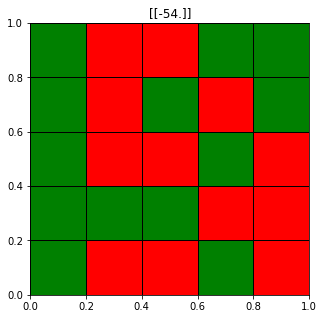

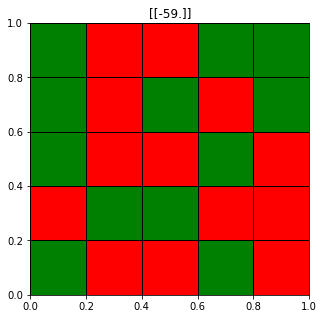

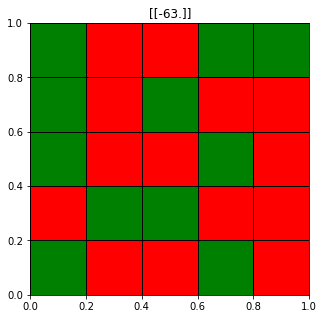

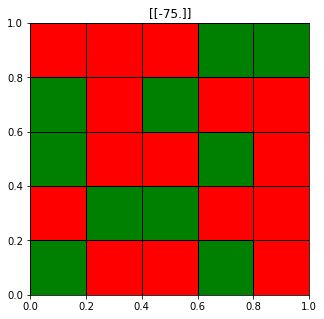

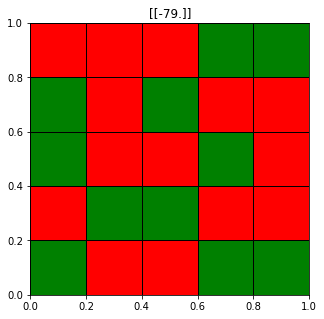

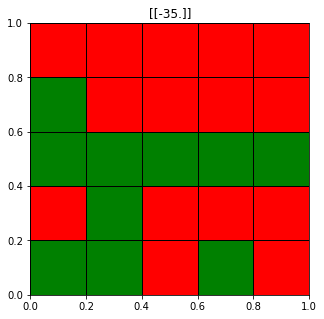

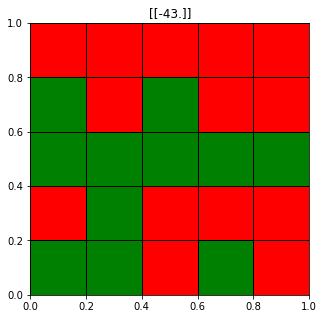

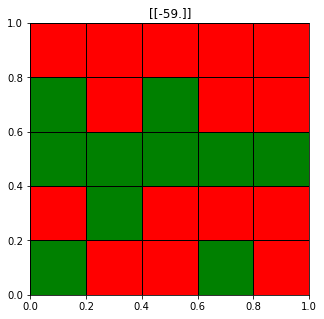

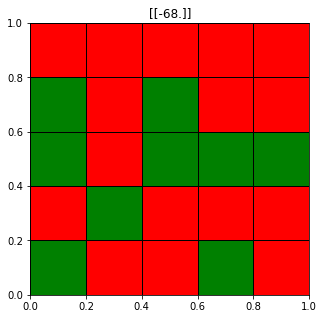

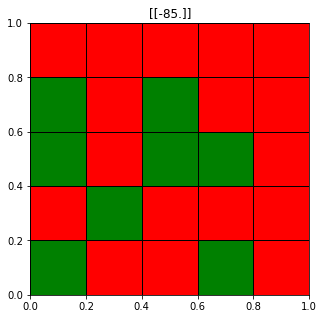

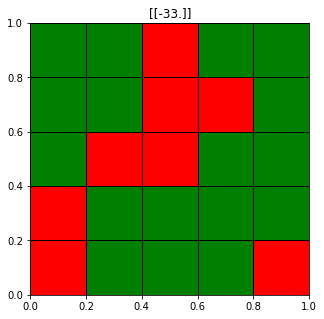

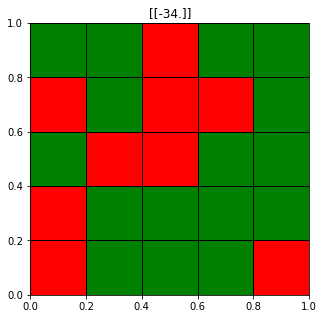

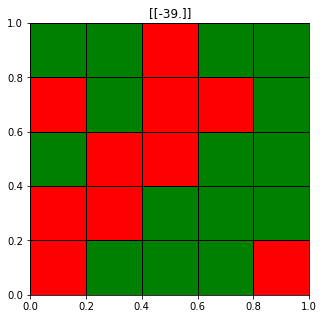

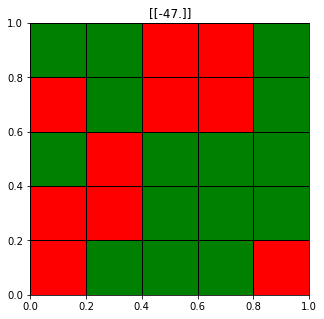

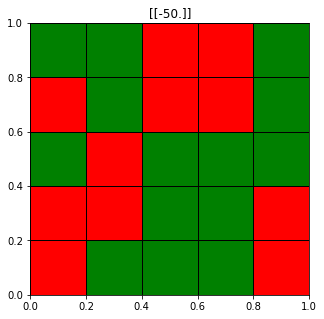

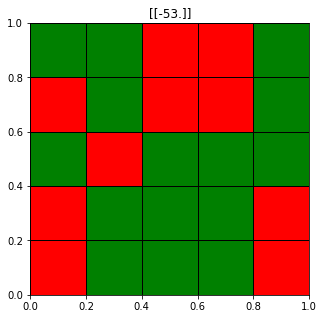

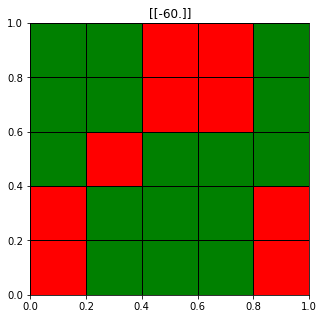

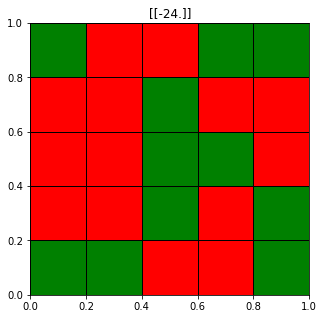

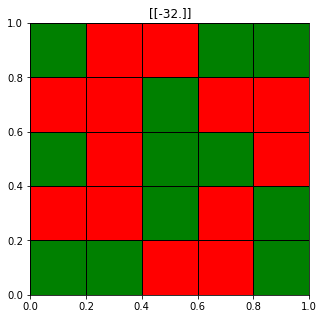

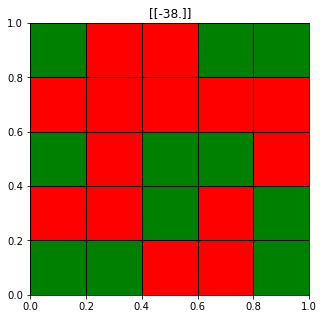

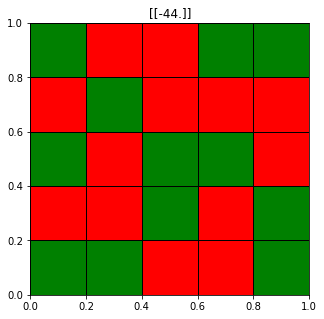

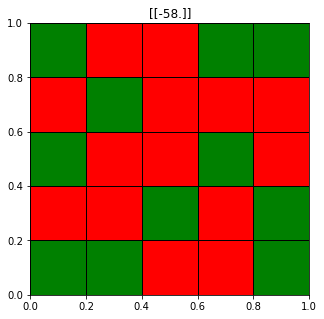

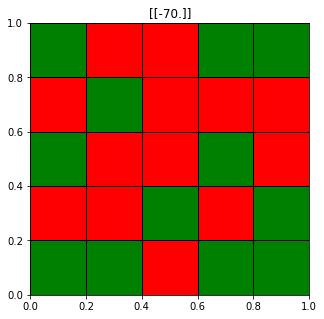

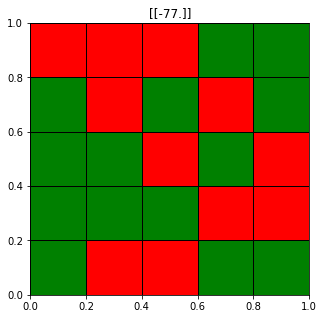

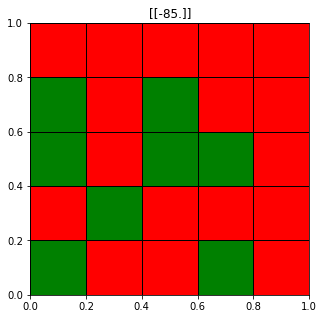

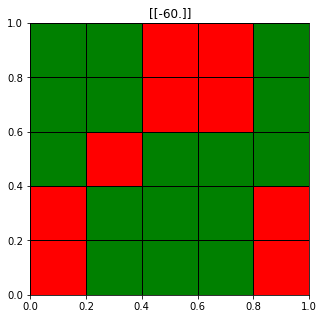

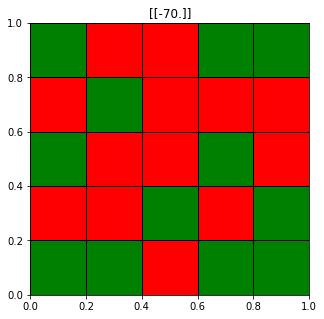

In [26]:
noise_rate=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case2_2.x_input(date_noise)
        network_case2_2.show()
    
        times=0
        ex_V=np.copy(network_case2_2.V)
        while True:
            network_case2_2.update()
            if ex_V!=network_case2_2.V:
                network_case2_2.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case2_2.V)
        
            if times>50:
                break
            
        score=np.where(network_case2_2.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*11)*100,"%")

③
閾値を変更してみる

平均０、分散１の正規分布を利用する

In [27]:
N=25
Q=2
network_theta_1=HopfieldNetwork(N,Q)
network_theta_1.learn(data_matrix[:,:2])
network_theta_1.theta=np.random.randn(N,1)

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 100.0
正答率（元画像を完全に再現した割合）: 100.0 %


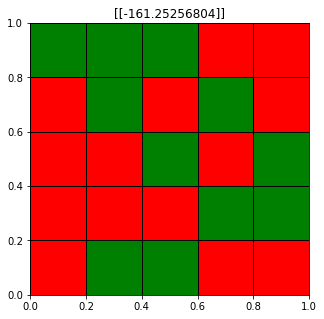

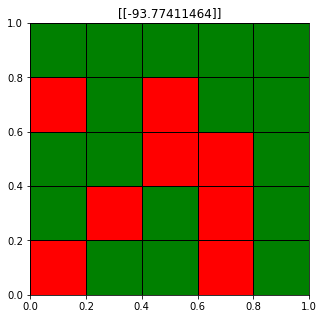

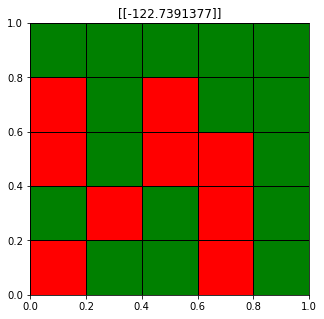

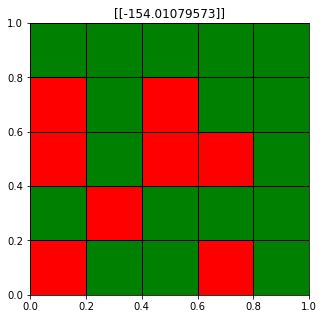

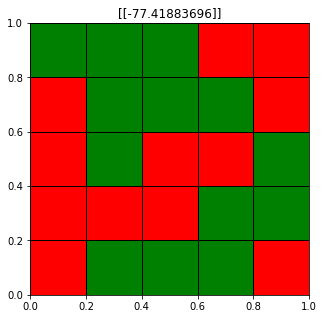

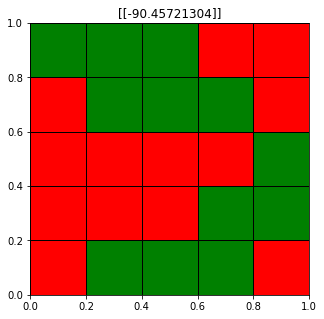

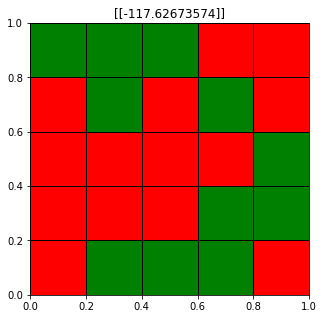

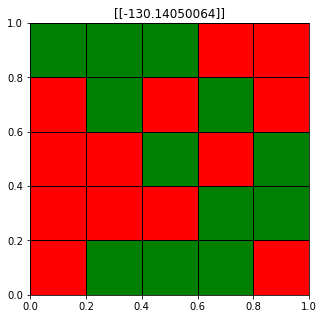

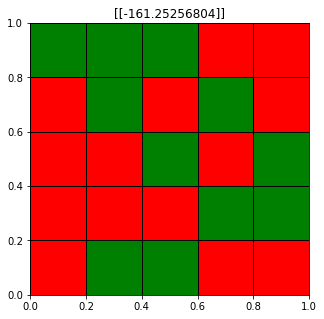

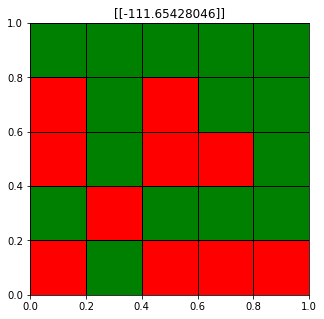

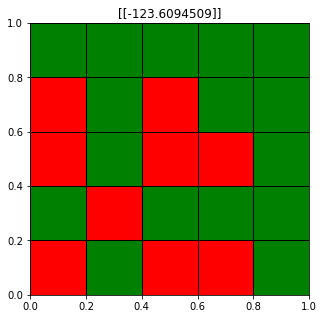

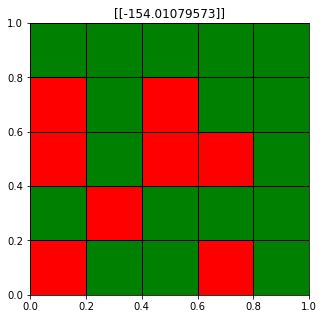

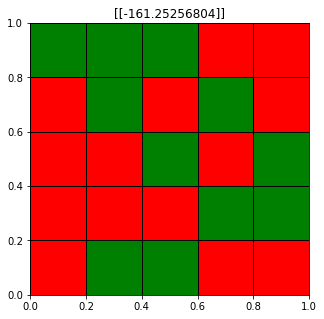

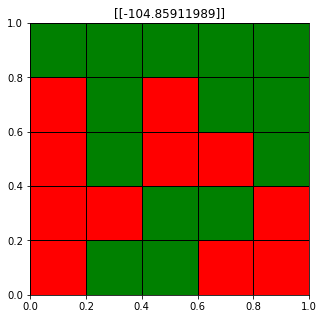

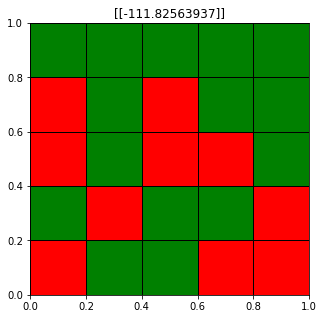

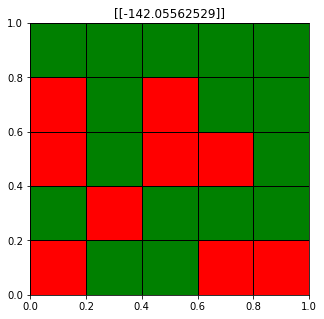

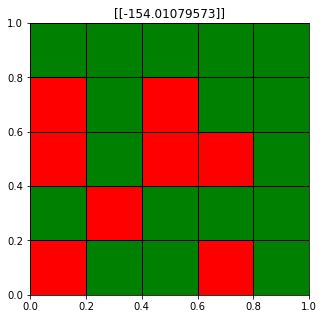

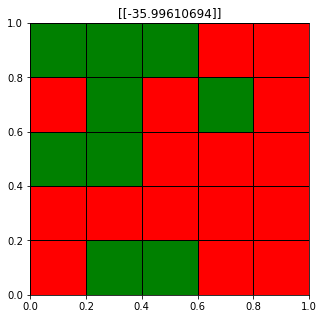

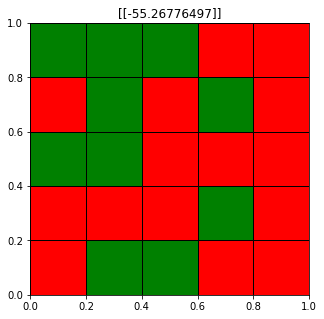

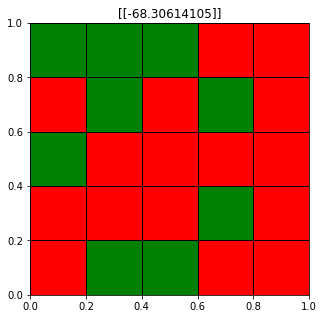

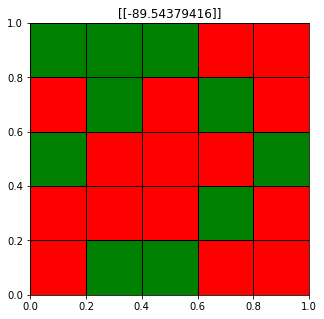

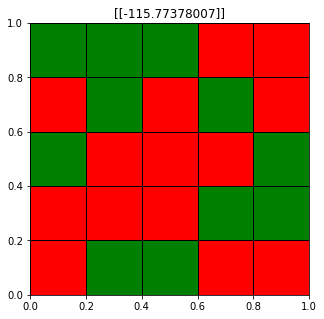

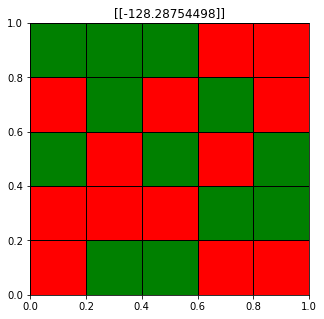

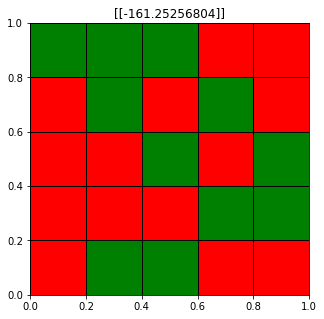

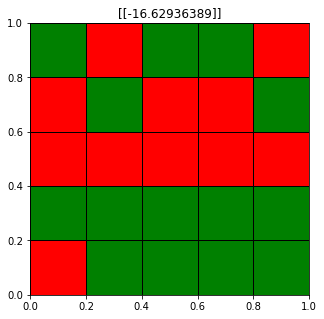

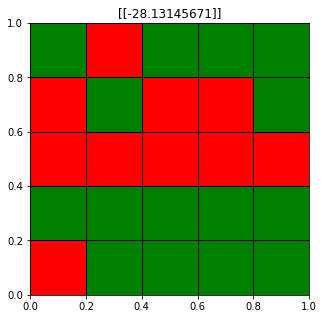

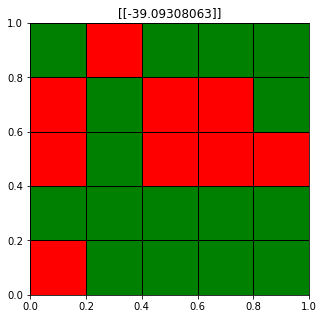

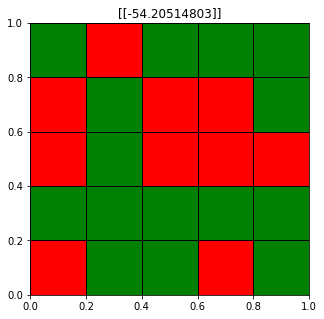

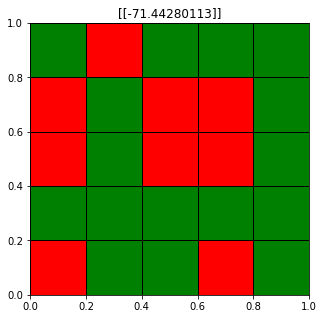

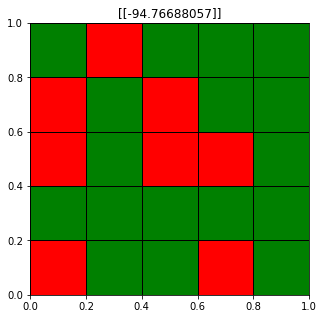

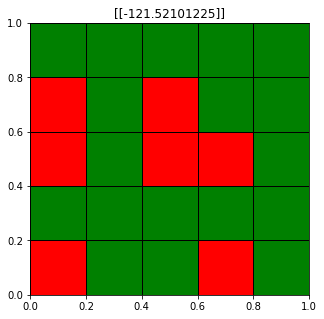

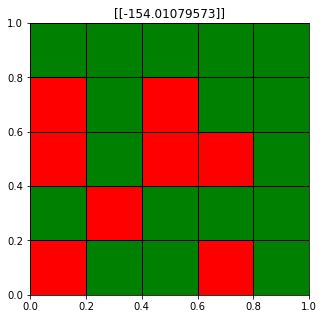

In [28]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_theta_1.x_input(date_noise)
        network_theta_1.show()
    
        times=0
        ex_V=np.copy(network_theta_1.V)
        while True:
            network_theta_1.update()
            if ex_V!=network_theta_1.V:
                network_theta_1.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_theta_1.V)
        
            if times>50:
                break
            
        score=np.where(network_theta_1.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

In [30]:
N=25
Q=3
network_theta_2=HopfieldNetwork(N,Q)
network_theta_2.learn(data_matrix[:,:3])
network_theta_2.theta=np.random.randn(N,1)

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
2 番目のデータ
(25, 1)
正解率: 92.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 76.0 %
                        
1 番目のデータ
(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 92.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 92.0 %
                        
1 番目のデータ
(25, 1)
正解率: 88.0 %
                        
2 番目のデータ
(25, 1)
正解率: 

<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


76.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 80.0 %
                        
1 番目のデータ
(25, 1)
正解率: 76.0 %
                        
2 番目のデータ
(25, 1)
正解率: 92.0 %
                        
------------------------------
類似度の全試行平均: 87.33333333333333
正答率（元画像を完全に再現した割合）: 16.666666666666664 %


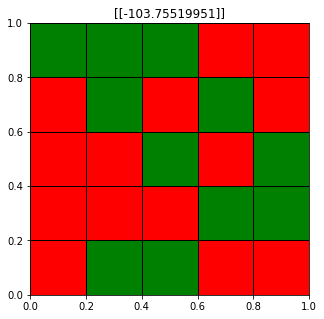

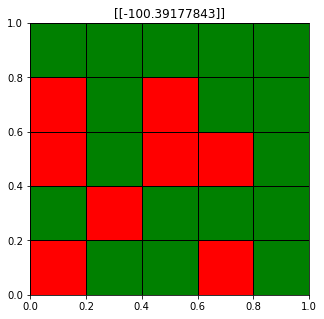

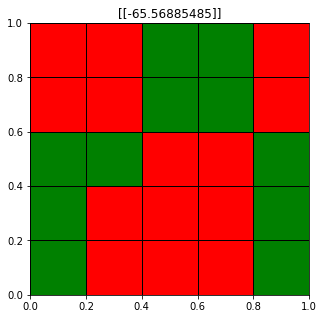

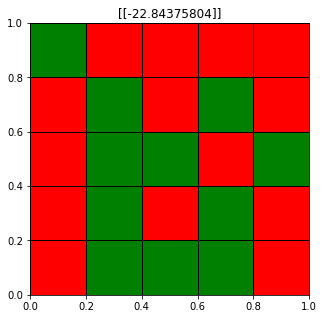

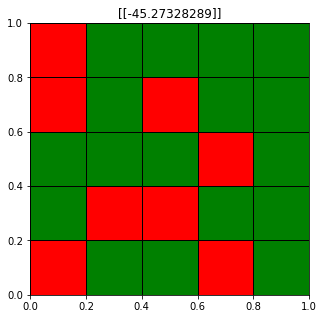

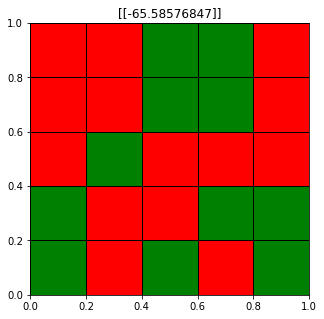

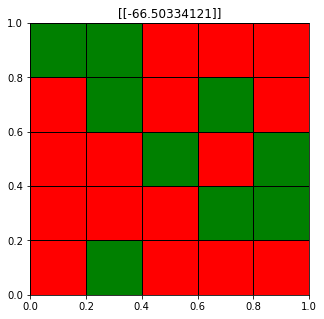

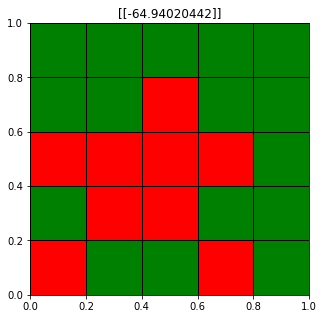

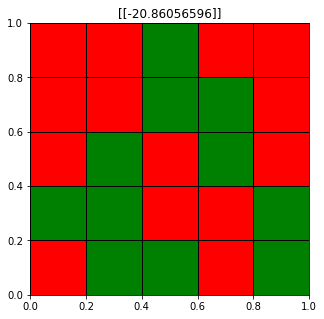

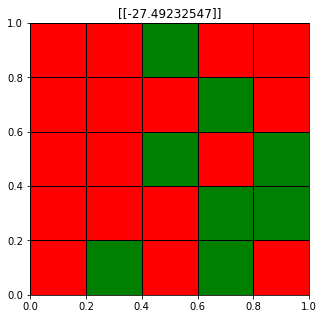

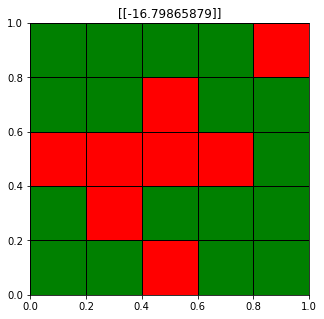

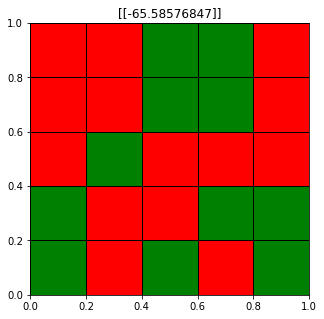

In [31]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_theta_2.x_input(date_noise)
        network_theta_2.show()
    
        times=0
        ex_V=np.copy(network_theta_2.V)
        while True:
            network_theta_1.update()
            if ex_V!=network_theta_2.V:
                network_theta_2.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_theta_2.V)
        
            if times>50:
                break
            
        score=np.where(network_theta_2.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

続いて0以上１０以下の一様分布を利用する

In [32]:
N=25
Q=2
network_theta_1=HopfieldNetwork(N,Q)
network_theta_1.learn(data_matrix[:,:2])
network_theta_1.theta=np.random.randint(0,11,(N,1))

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 68.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 68.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 68.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 0.0 %
                        
------------------------------
類似度の全試行平均: 75.5
正答率（元画像を完全に再現した割合）: 50.0 %


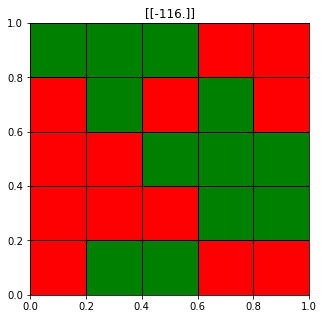

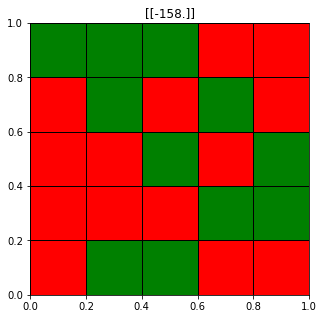

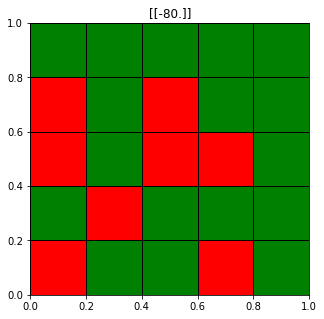

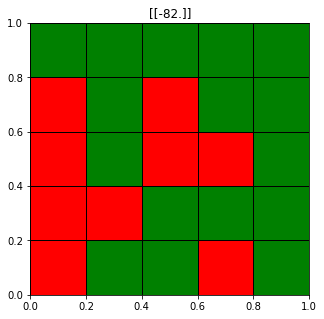

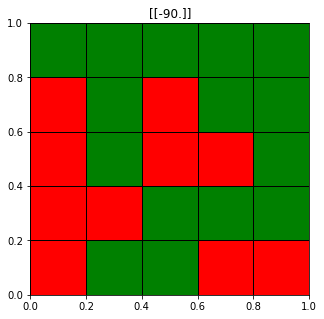

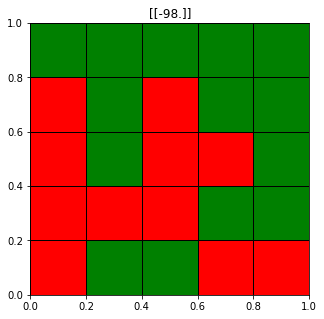

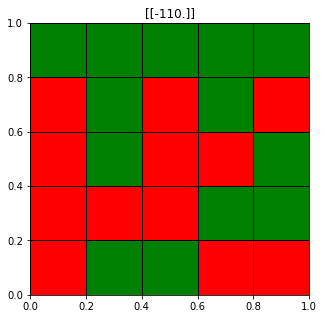

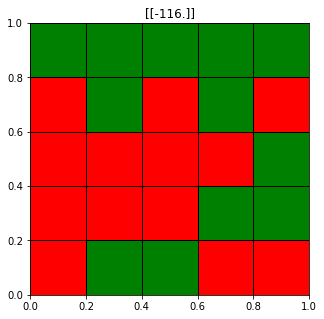

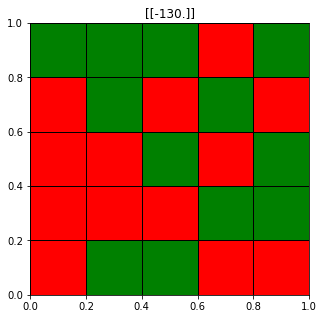

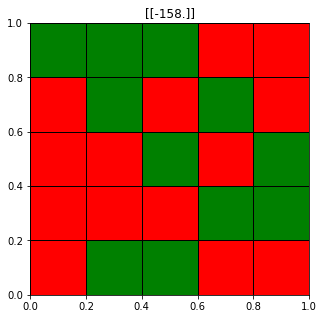

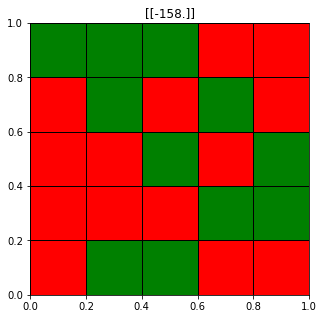

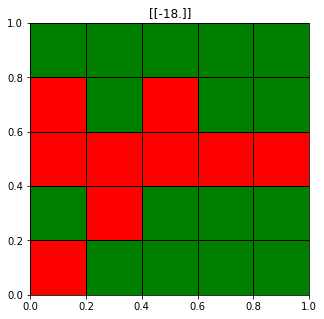

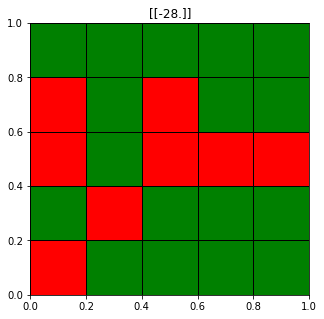

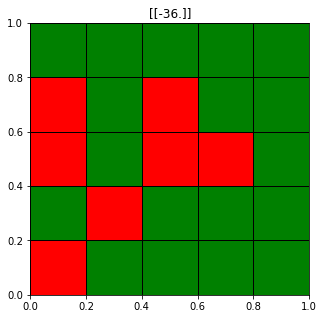

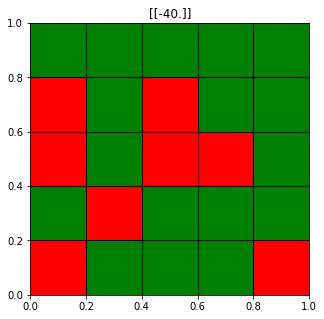

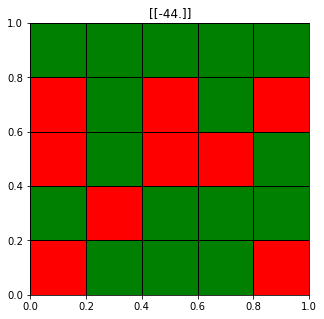

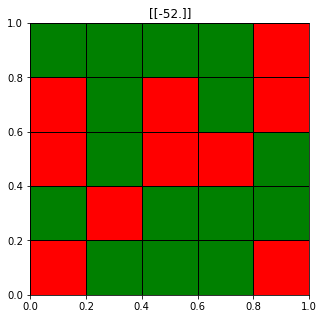

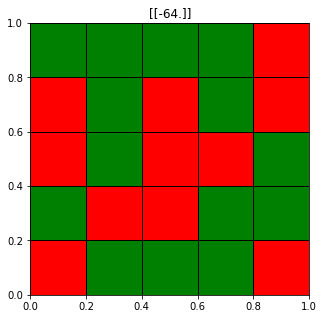

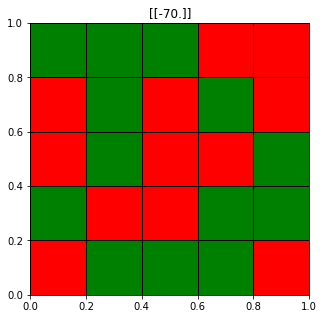

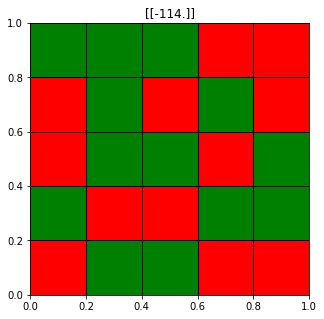

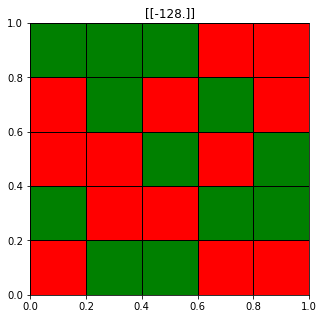

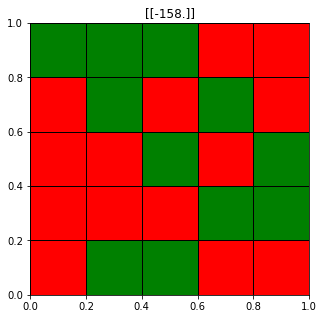

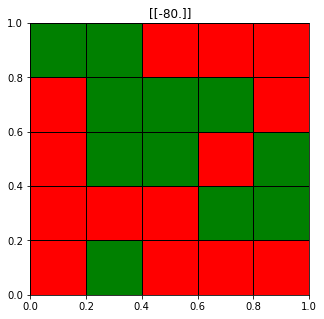

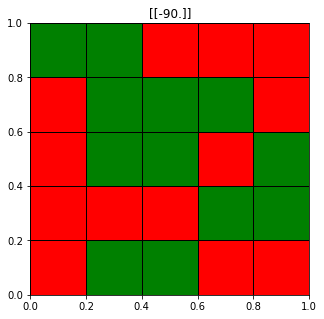

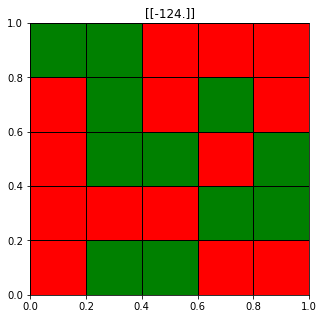

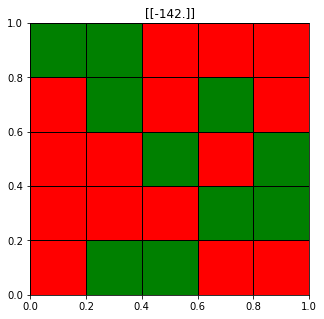

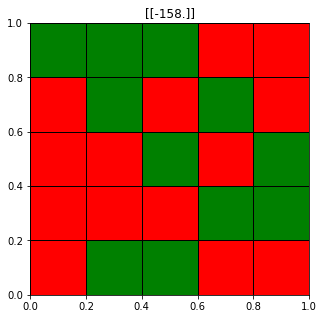

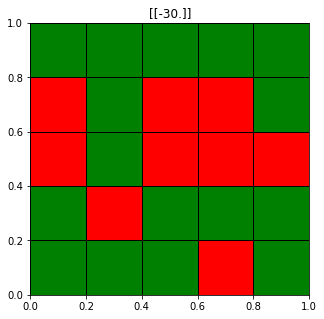

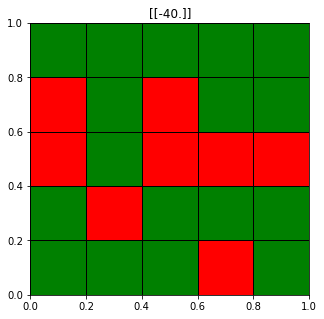

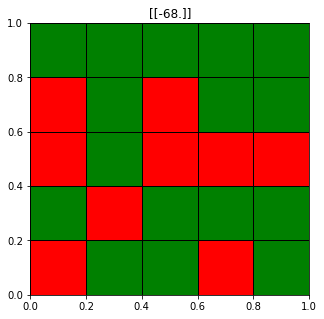

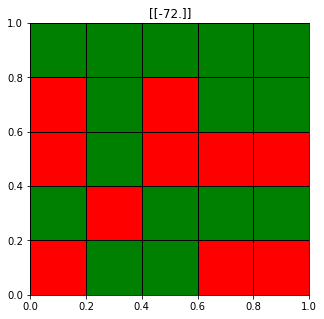

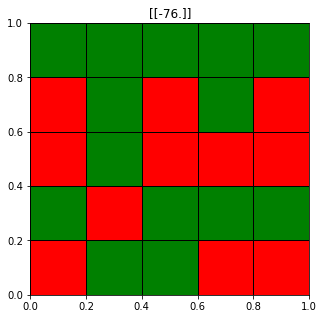

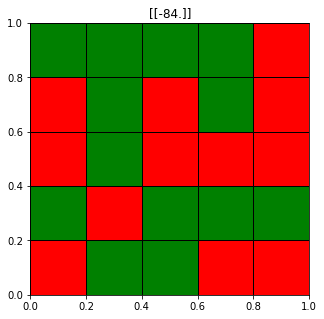

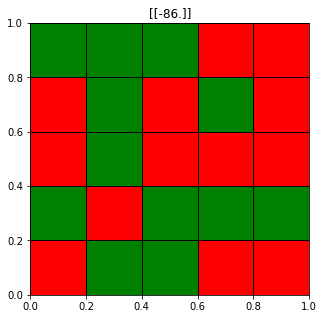

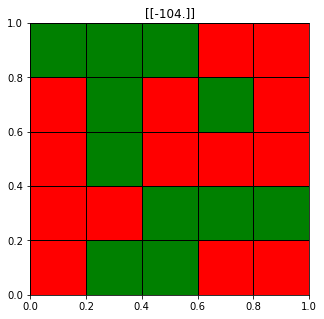

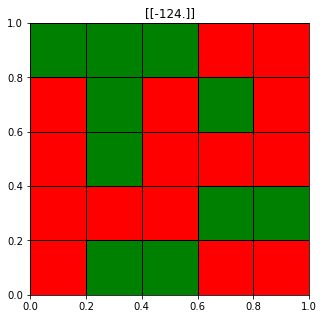

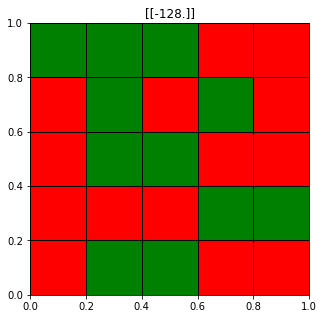

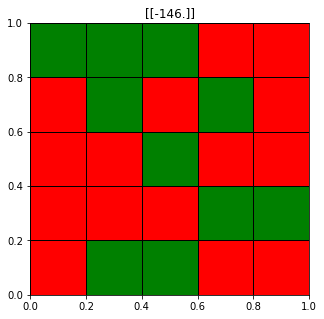

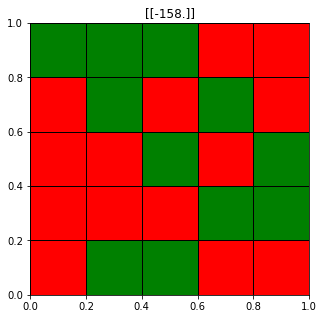

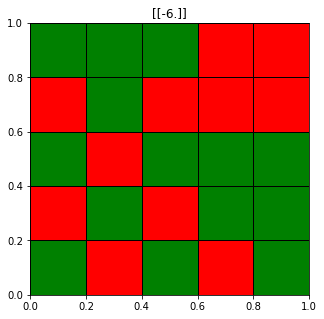

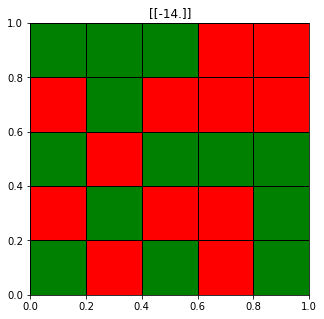

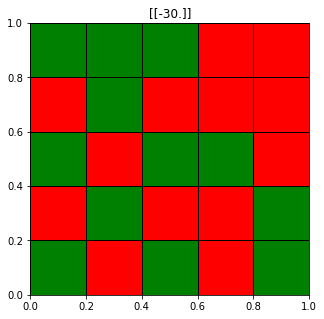

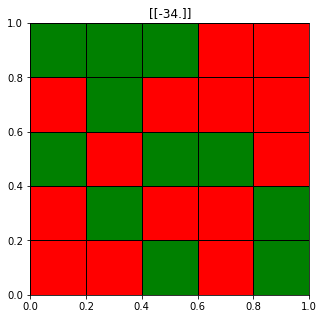

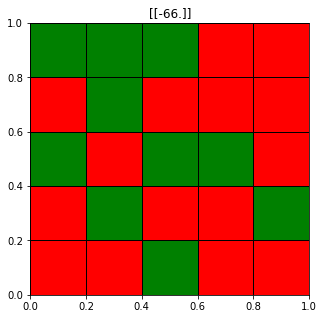

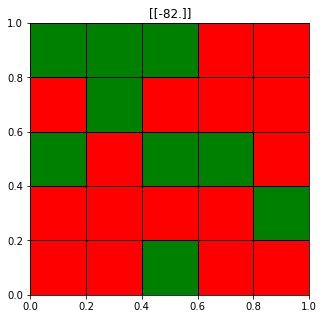

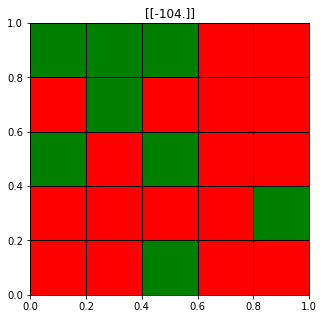

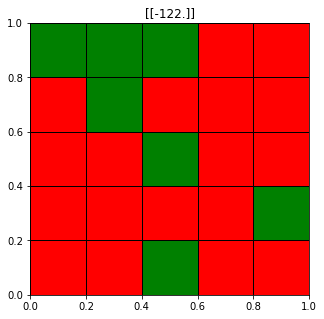

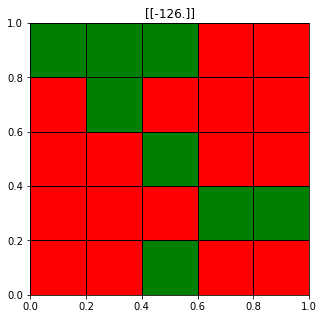

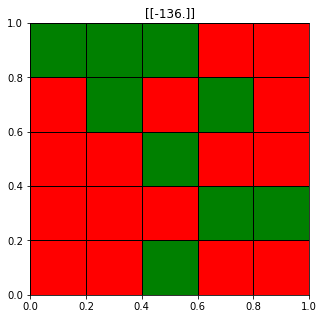

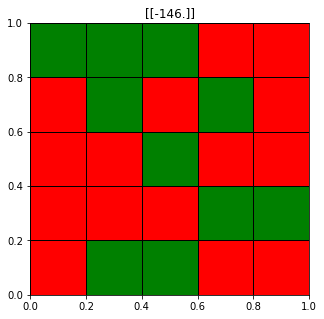

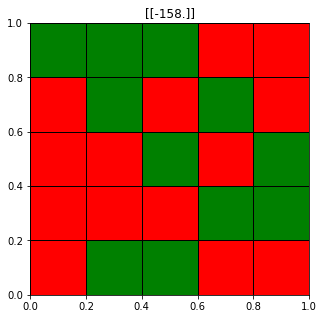

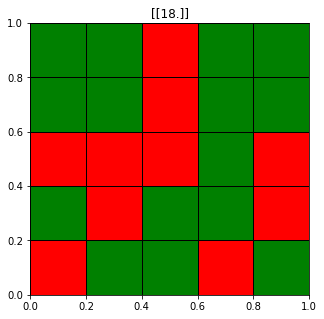

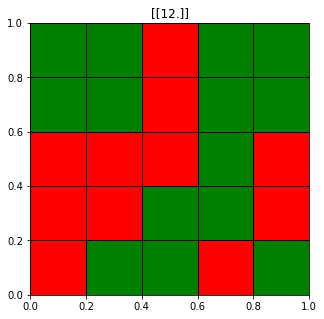

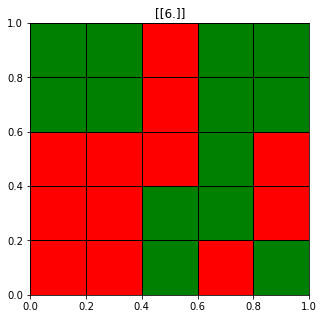

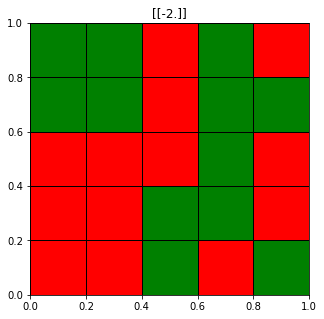

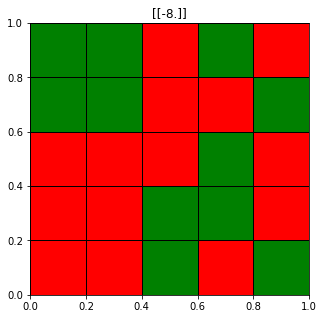

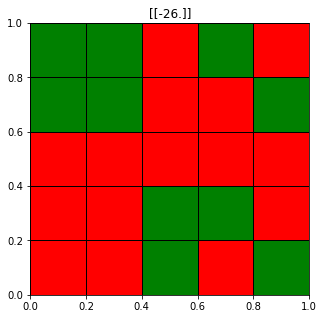

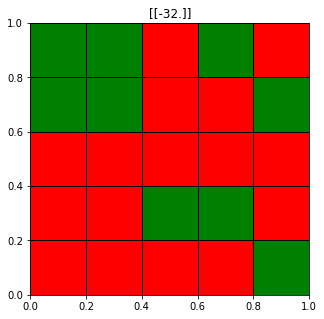

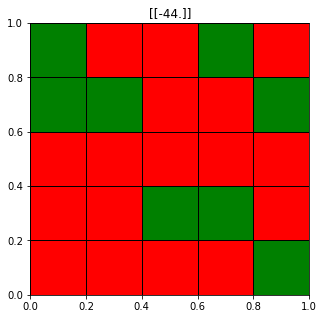

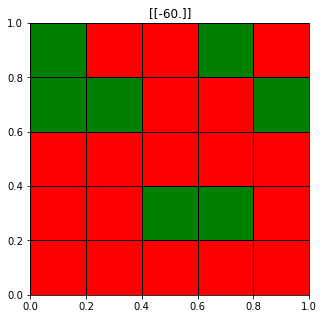

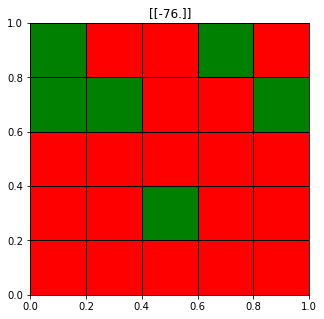

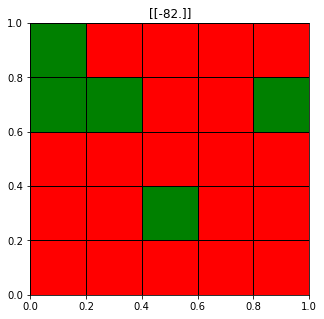

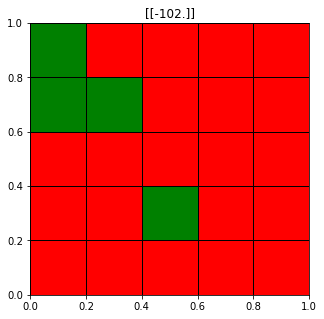

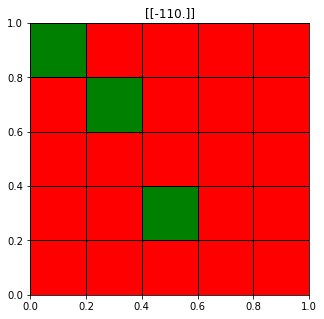

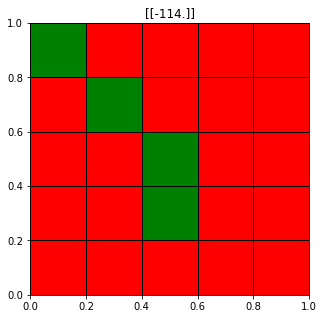

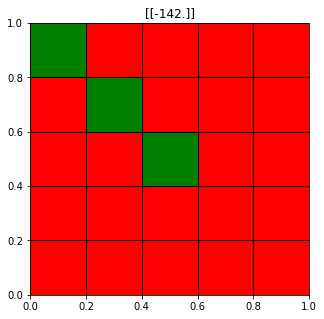

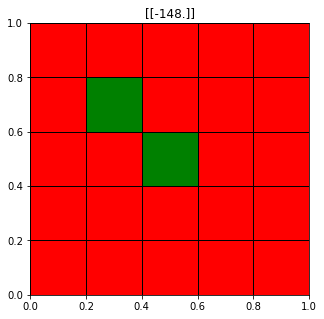

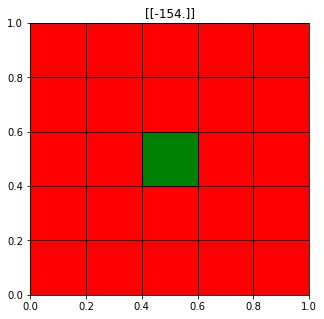

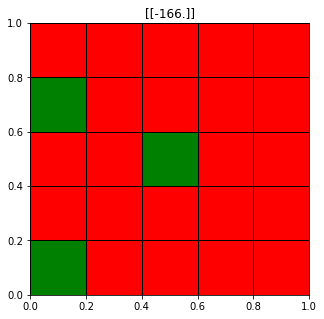

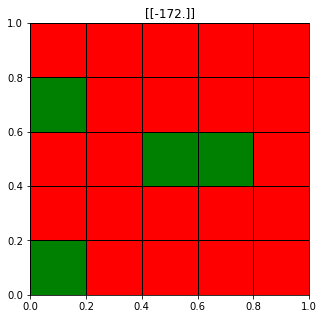

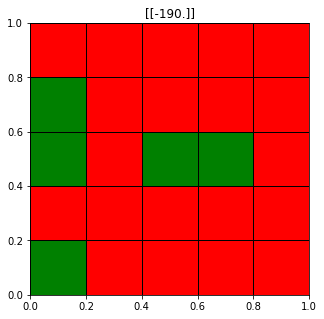

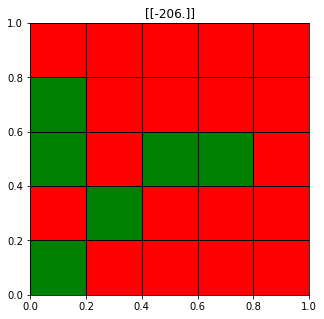

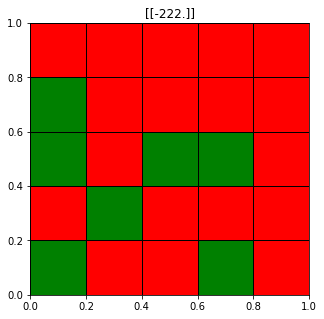

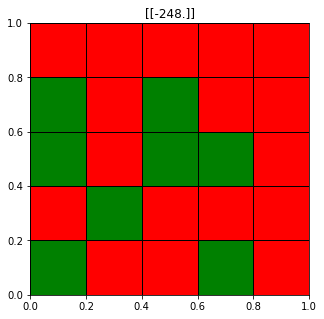

In [33]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_theta_1.x_input(date_noise)
        network_theta_1.show()
    
        times=0
        ex_V=np.copy(network_theta_1.V)
        while True:
            network_theta_1.update()
            if ex_V!=network_theta_1.V:
                network_theta_1.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_theta_1.V)
        
            if times>50:
                break
            
        score=np.where(network_theta_1.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

In [34]:
N=25
Q=3
network_theta_2=HopfieldNetwork(N,Q)
network_theta_2.learn(data_matrix[:,:3])
network_theta_2.theta=np.random.randint(0,11,(N,1))

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 92.0 %
                        
1 番目のデータ
(25, 1)
正解率: 88.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 84.0 %
                        
1 番目のデータ
(25, 1)
正解率: 80.0 %
                        
2 番目のデータ
(25, 1)
正解率: 92.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 80.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 80.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 96.0 %
                        
1 番目のデータ
(25, 1)
正解率: 88.0 %
                        
2 番目のデータ
(25, 1)
正解率: 76.0 %
                        
------------------------------
類似度の全試行平均: 86.66666666666667
正答率（元画像を完全に再現した割合）: 8.333333333333332 %


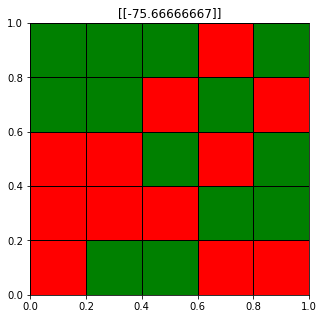

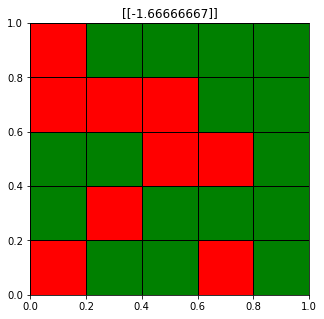

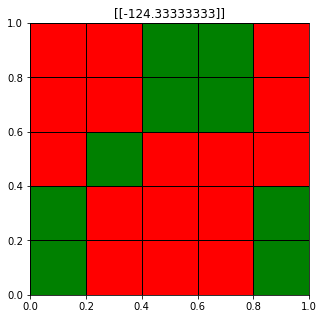

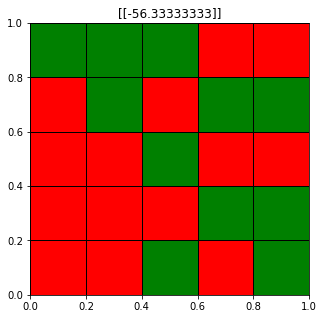

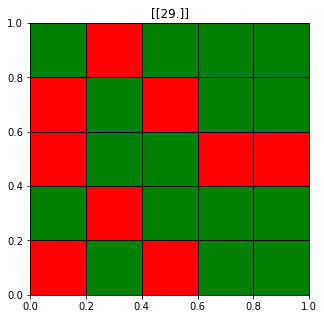

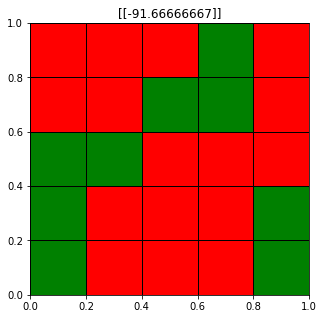

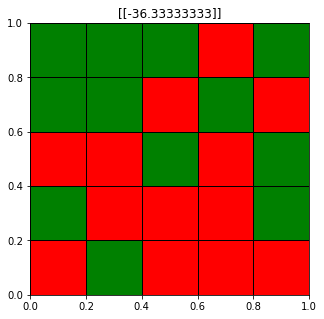

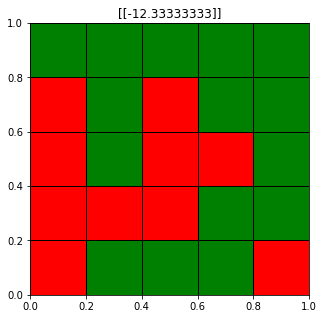

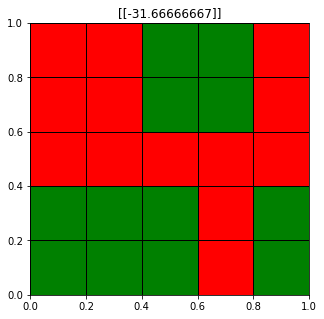

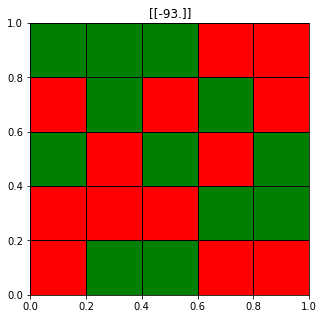

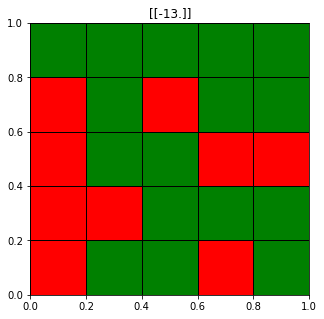

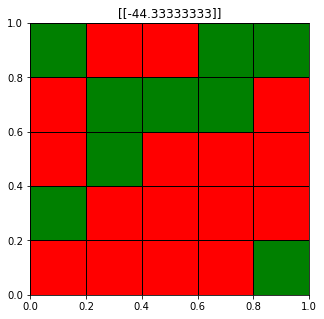

In [35]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix*-1,data_matrix)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_theta_2.x_input(date_noise)
        network_theta_2.show()
    
        times=0
        ex_V=np.copy(network_theta_2.V)
        while True:
            network_theta_1.update()
            if ex_V!=network_theta_2.V:
                network_theta_2.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_theta_2.V)
        
            if times>50:
                break
            
        score=np.where(network_theta_2.x==data_matrix[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/(Q*4)*100,"%")

直交性の性能への寄与の確認

<ipython-input-3-9a348c155278>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


array([[25., 15., 23., 17., 19., 17.],
       [15., 25., 17., 19., 17., 11.],
       [23., 17., 25., 19., 21., 19.],
       [17., 19., 19., 25., 23., 17.],
       [19., 17., 21., 23., 25., 19.],
       [17., 11., 19., 17., 19., 25.]])

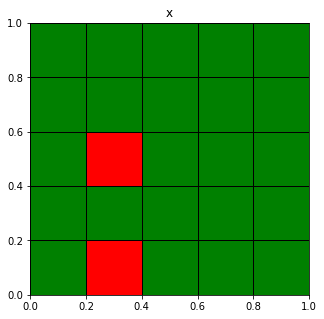

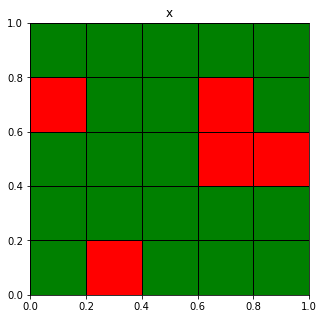

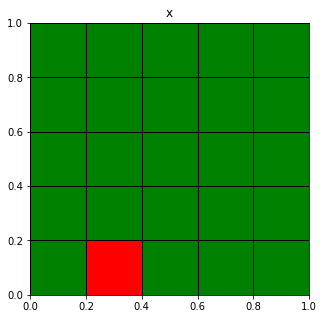

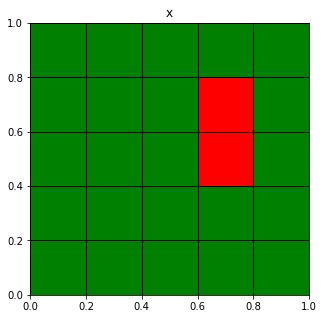

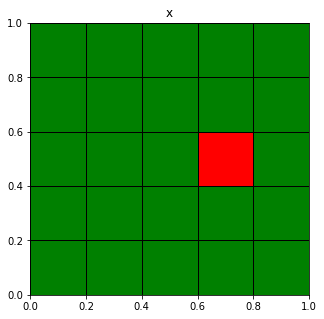

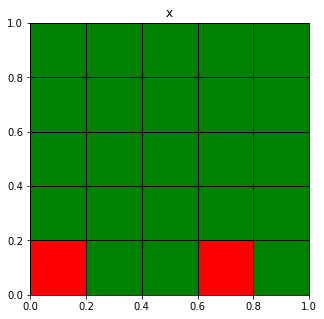

In [37]:
N=25
Q_MAX=6
data_matrix2=np.zeros((N,Q_MAX))

N=25
Q=2
network_case4_1=HopfieldNetwork(N,Q)

for i in range(Q_MAX):
    tmp=np.random.rand(25)
    data_matrix2[:,i]=np.where(tmp<0.1,-1,1)
    data=data_matrix2[:,i].reshape(N,1)
    network_case4_1.show_x(data)
    
np.dot(np.transpose(data_matrix2),data_matrix2)

In [38]:
network_case4_1.learn(data_matrix2[:,:2])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 100.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 76.0 %
                        
1 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 97.0
正答率（元画像を完全に再現した割合）: 87.5 %


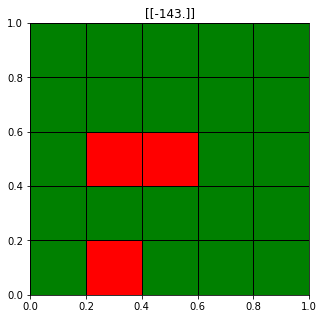

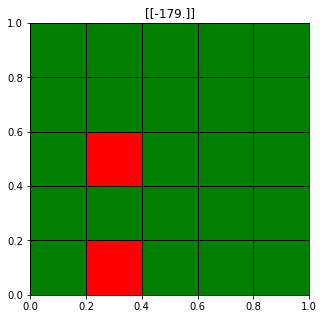

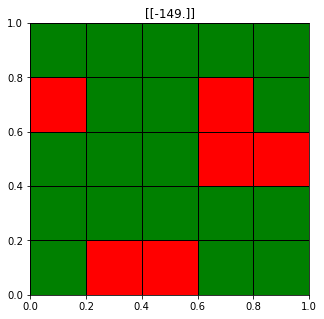

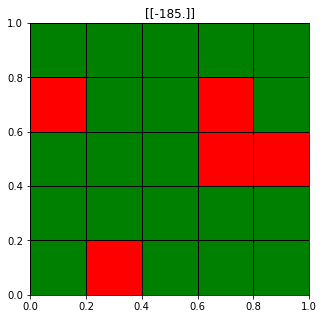

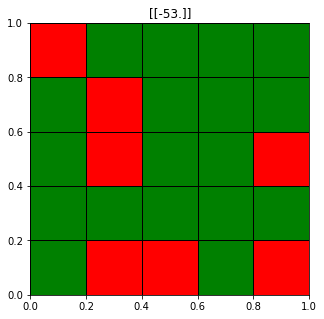

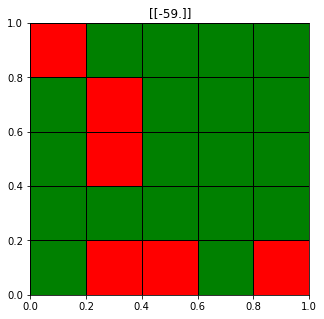

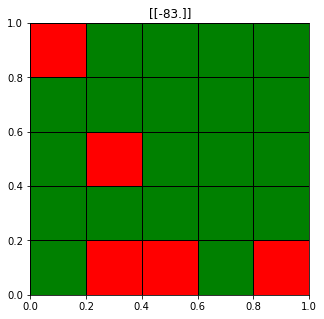

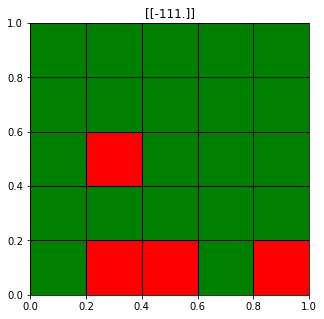

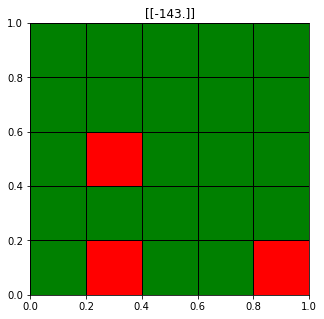

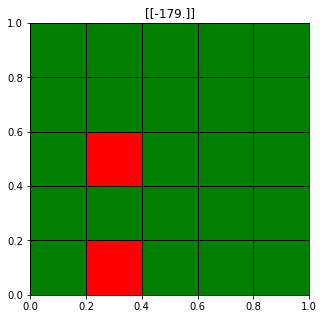

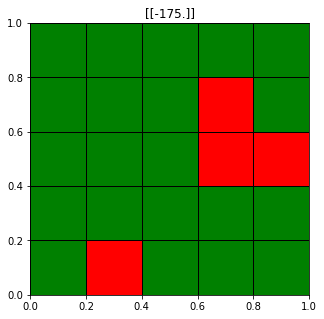

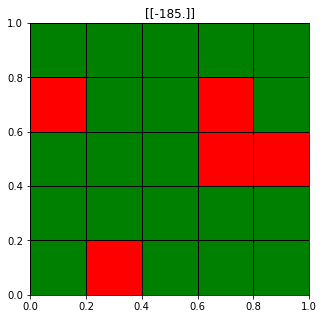

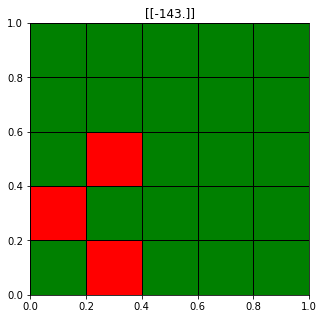

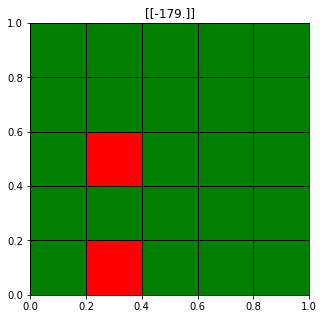

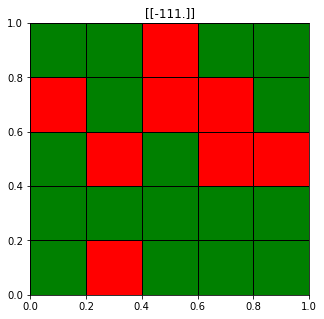

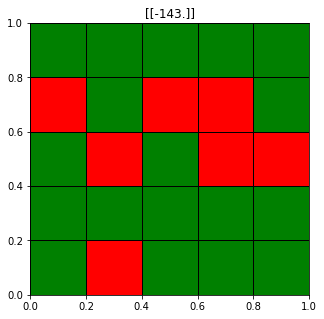

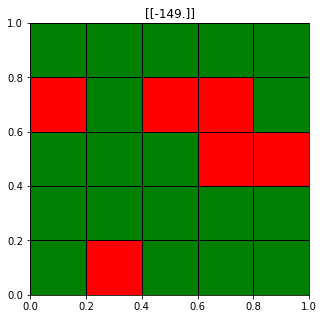

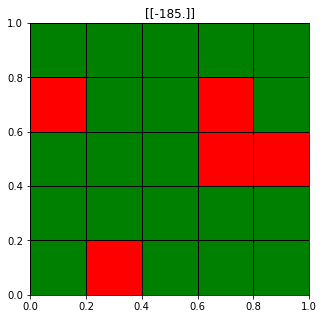

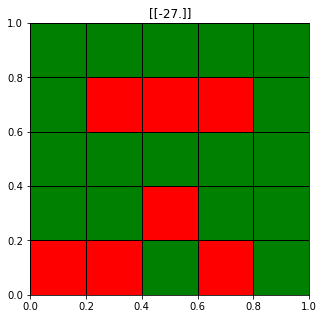

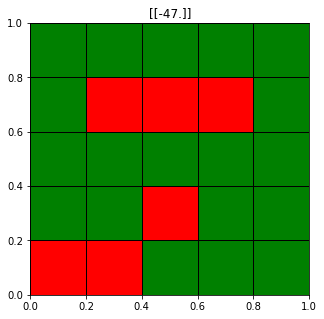

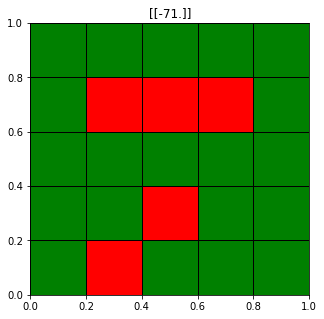

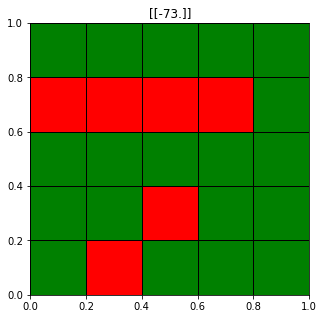

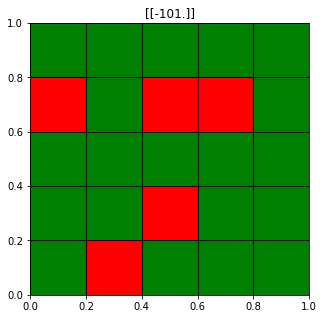

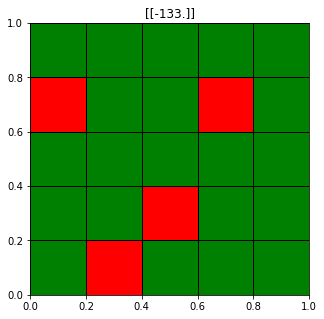

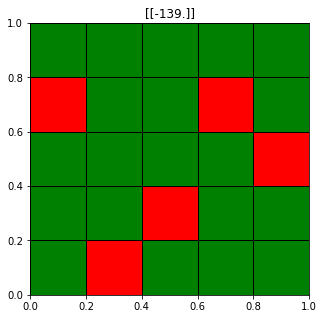

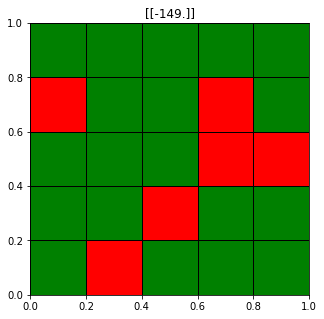

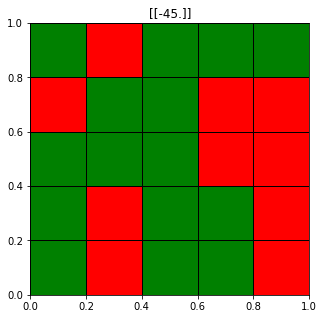

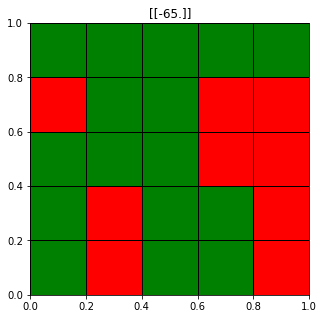

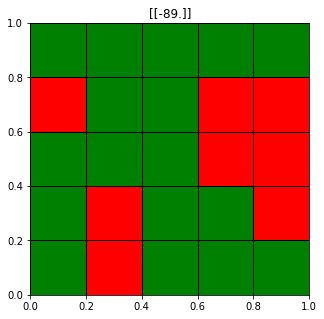

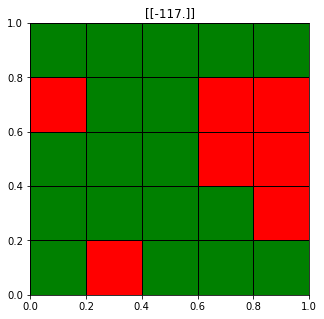

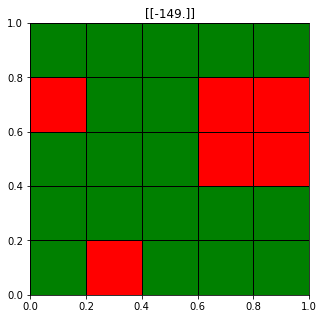

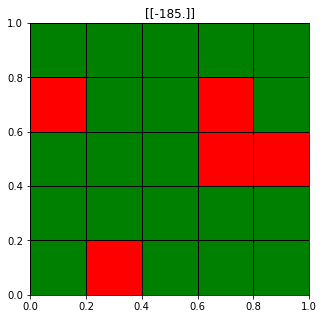

In [39]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix2*-1,data_matrix2)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case4_1.x_input(date_noise)
        network_case4_1.show()
    
        times=0
        ex_V=np.copy(network_case4_1.V)
        while True:
            network_case4_1.update()
            if ex_V!=network_case4_1.V:
                network_case4_1.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case4_1.V)
        
            if times>50:
                break
            
        score=np.where(network_case4_1.x==data_matrix2[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/8*100,"%")

In [40]:
N=25
Q=3
network_case4_2=HopfieldNetwork(N,Q)
network_case4_2.learn(data_matrix2[:,:3])

Noise: 5.0 %
0 番目のデータ
(25, 1)
正解率: 96.0 %
                        
1 番目のデータ
(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 10.0 %
0 番目のデータ


<ipython-input-3-9a348c155278>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


(25, 1)
正解率: 96.0 %
                        
1 番目のデータ
(25, 1)
正解率: 84.0 %
                        
2 番目のデータ


<ipython-input-3-9a348c155278>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(5,5))


(25, 1)
正解率: 96.0 %
                        
------------------------------
Noise: 15.0 %
0 番目のデータ
(25, 1)
正解率: 96.0 %
                        
1 番目のデータ
(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
Noise: 20.0 %
0 番目のデータ
(25, 1)
正解率: 96.0 %
                        
1 番目のデータ
(25, 1)
正解率: 84.0 %
                        
2 番目のデータ
(25, 1)
正解率: 100.0 %
                        
------------------------------
類似度の全試行平均: 93.0
正答率（元画像を完全に再現した割合）: 25.0 %


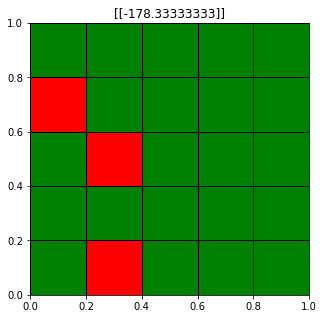

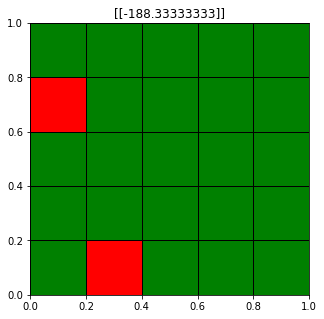

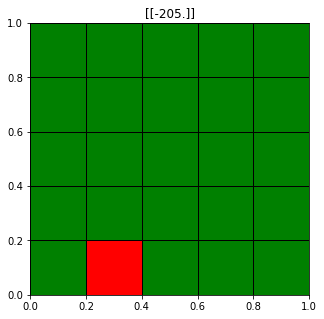

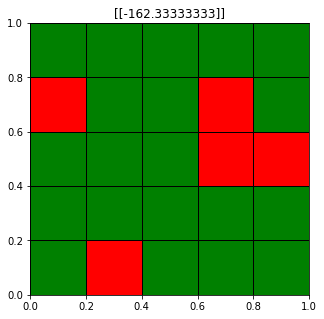

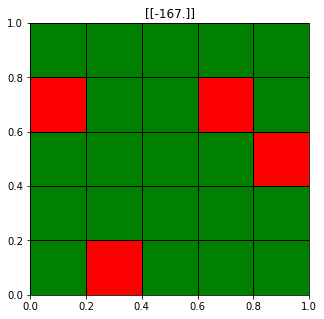

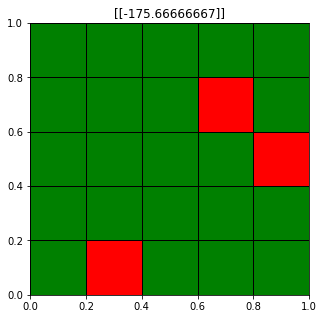

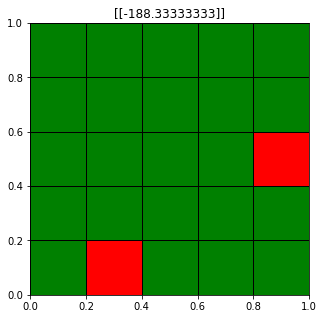

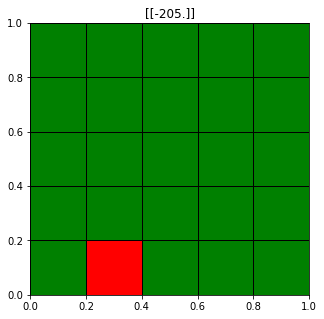

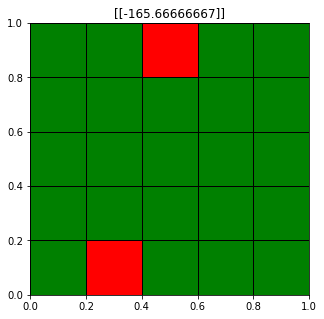

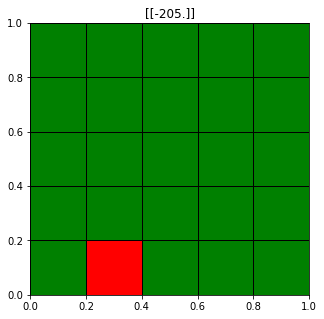

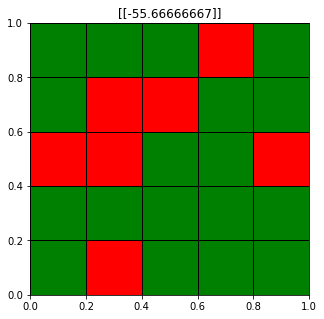

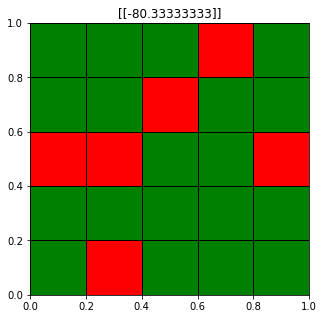

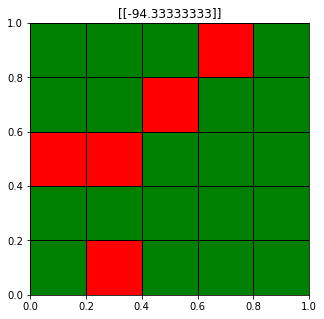

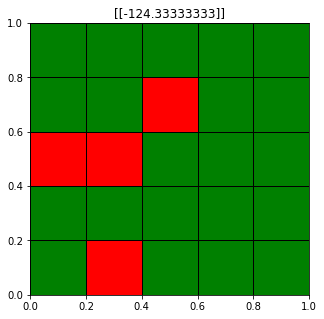

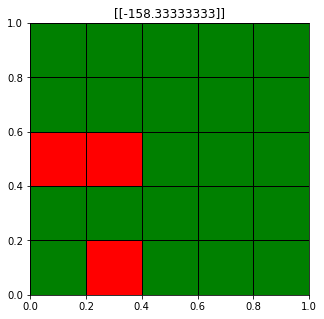

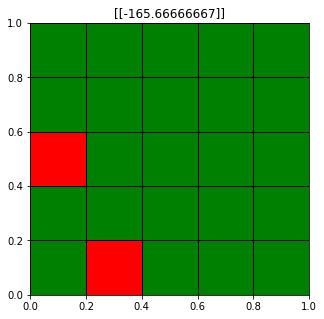

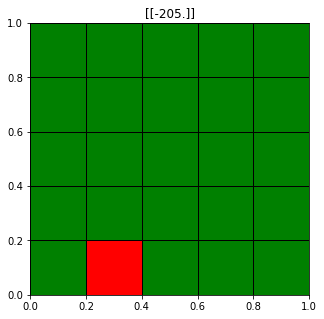

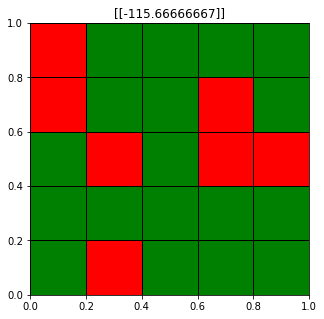

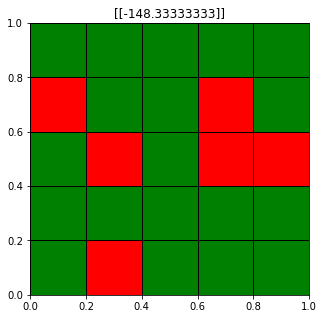

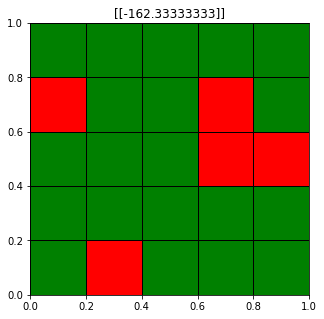

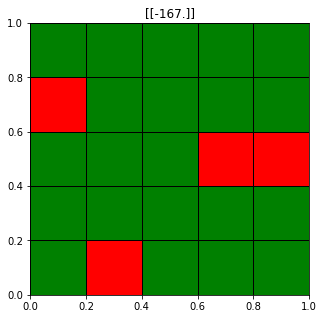

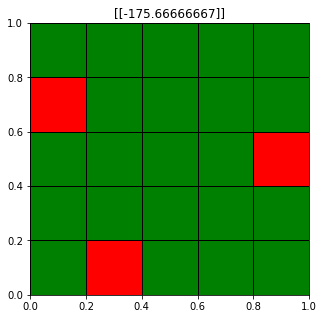

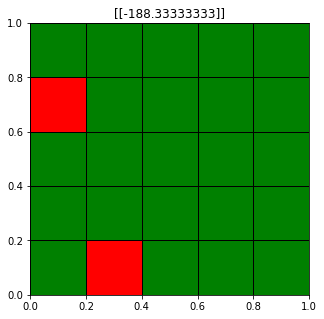

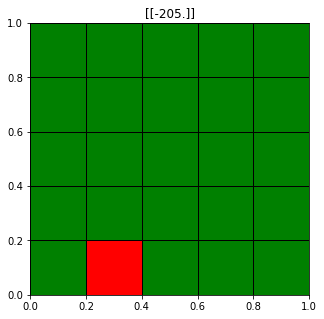

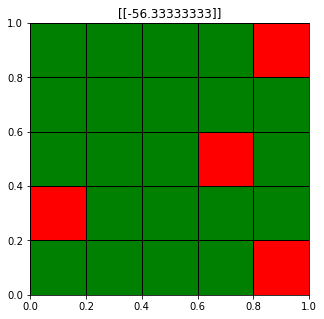

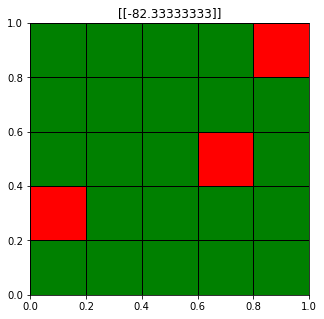

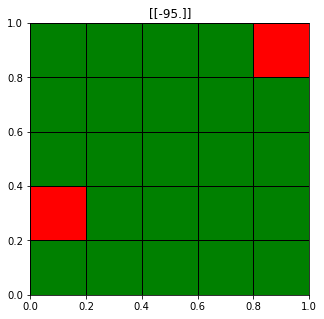

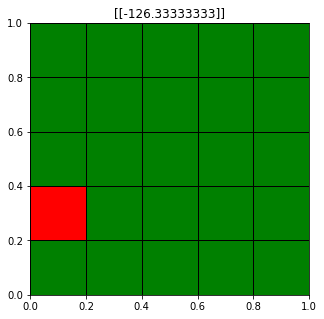

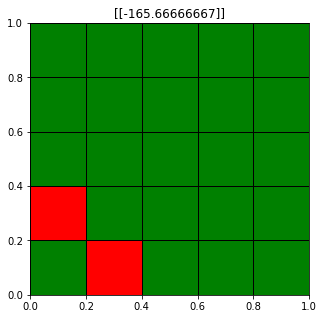

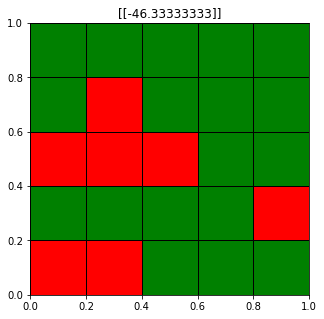

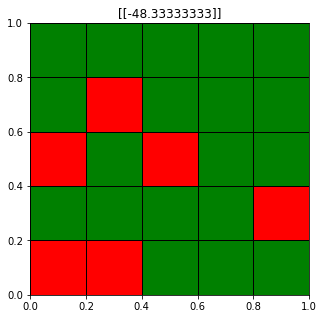

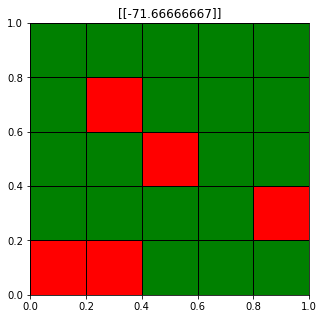

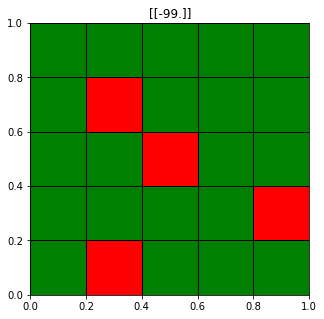

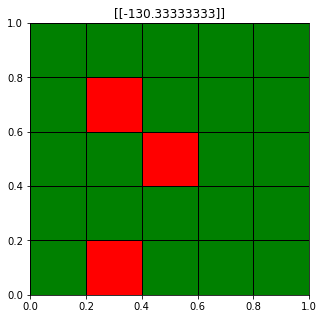

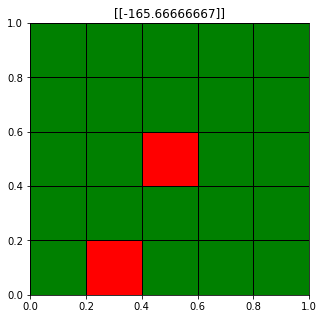

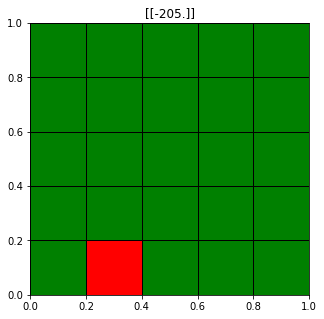

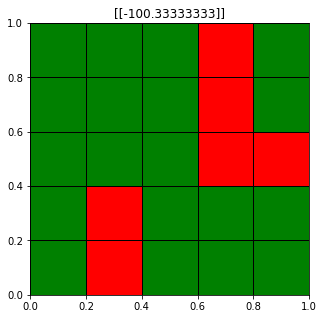

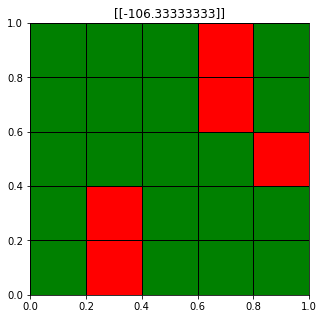

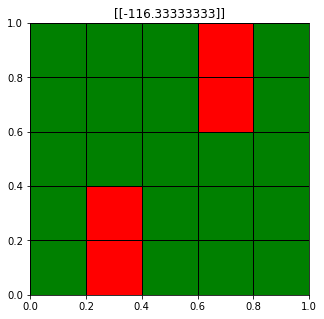

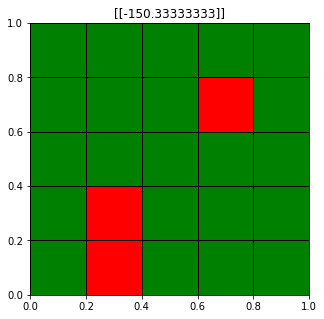

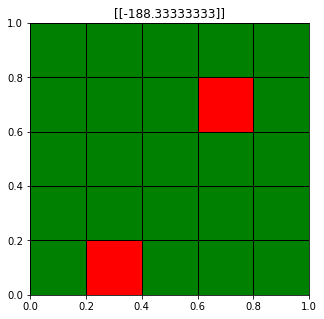

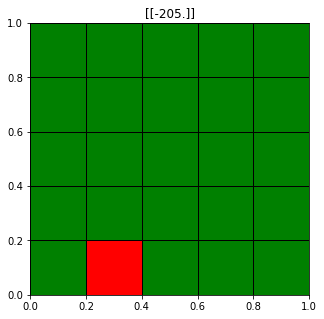

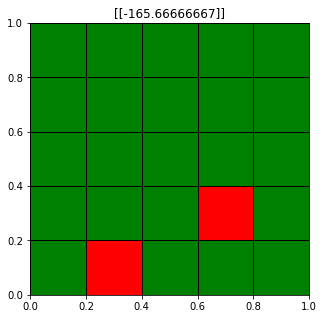

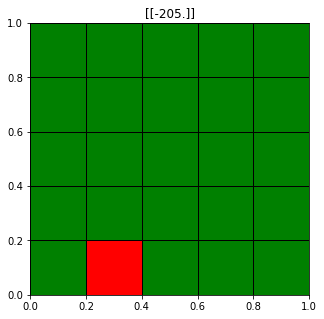

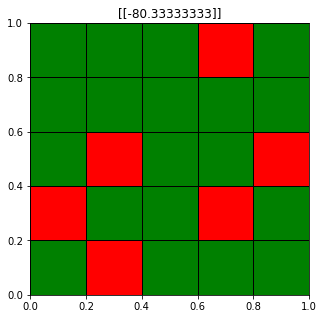

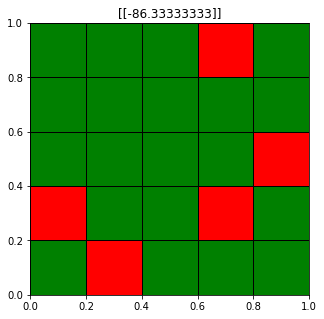

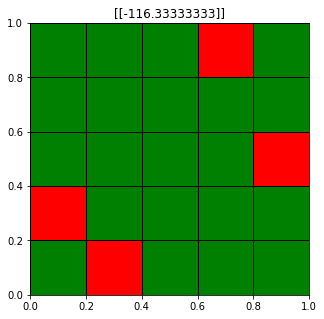

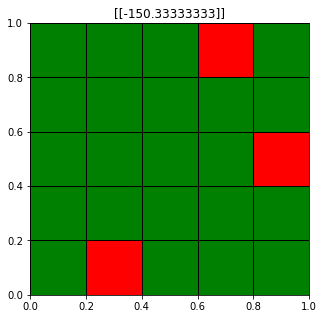

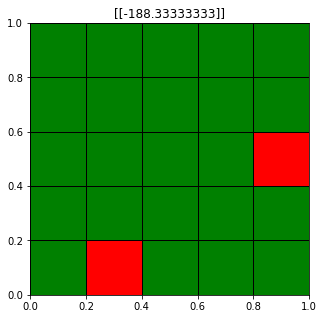

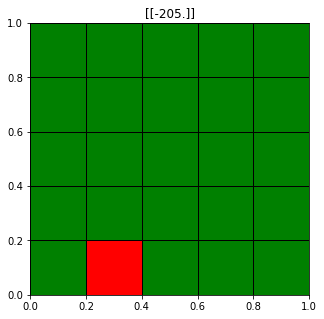

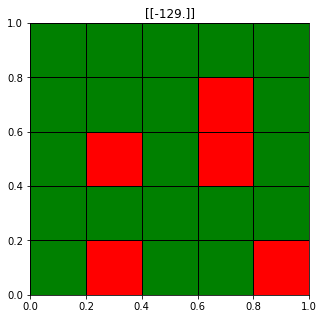

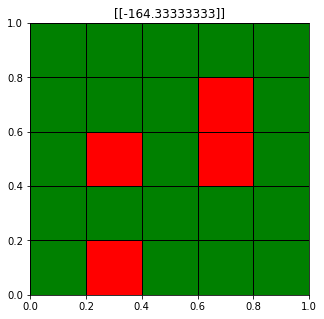

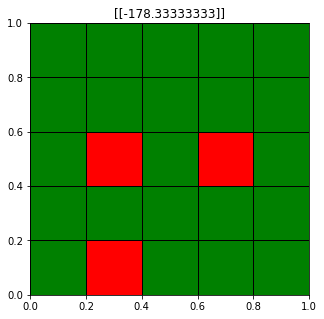

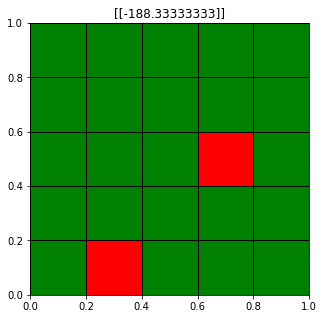

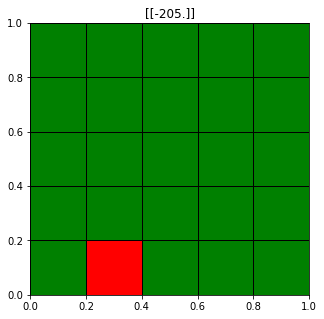

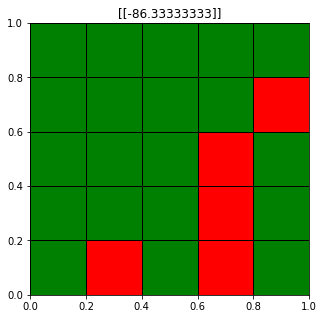

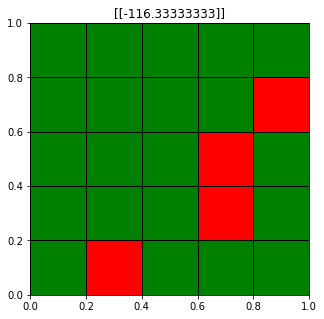

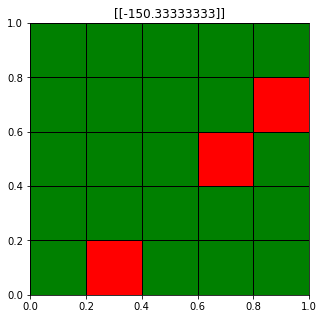

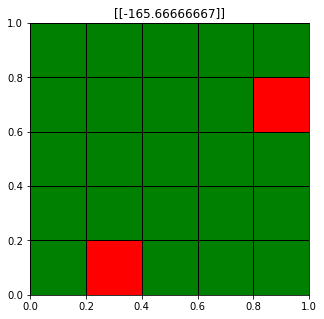

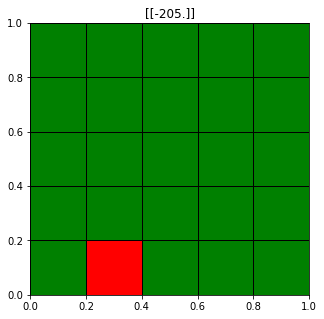

In [41]:
noise_rate=[0.05,0.1,0.15,0.2]
scores=[]
correct_times=0
for r in noise_rate:
    print("Noise:",r*100,"%")
    tmp=np.random.rand(N,Q_MAX)
    x=np.where(tmp<r,data_matrix2*-1,data_matrix2)
    
    for i in range(Q):
        print(i,"番目のデータ")
        date_noise=x[:,i].reshape(N,1)
        network_case4_2.x_input(date_noise)
        network_case4_2.show()
    
        times=0
        ex_V=np.copy(network_case4_2.V)
        while True:
            network_case4_2.update()
            if ex_V!=network_case4_2.V:
                network_case4_2.show()
                times=0
            else:
                times+=1
        
            ex_V=np.copy(network_case4_2.V)
        
            if times>50:
                break
            
        score=np.where(network_case4_2.x==data_matrix2[:,i].reshape(N,1),1,0)
        print(score.shape)
        score=np.sum(score)/N*100
        scores.append(score)
        print("正解率:",score,"%")
        if score==100:
            correct_times+=1
            
        print("                        ")
    print("------------------------------")
    
print("類似度の全試行平均:",np.mean(scores))
print("正答率（元画像を完全に再現した割合）:",correct_times/12*100,"%")